# **100 epochs**

=== INFOSYS LSTM Stock Price Predictor (Test Phase June–July 2025) ===
Enter a date (YYYY-MM-DD): 2025-06-18
Fetching data from Yahoo Finance...


[*********************100%***********************]  1 of 1 completed


Training LSTM model...
Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 122ms/step - loss: 0.2882 - val_loss: 0.0072
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0105 - val_loss: 0.0073
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0023 - val_loss: 0.0063
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0019 - val_loss: 0.0049
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0018 - val_loss: 0.0041
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0017 - val_loss: 0.0037
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0016 - val_loss: 0.0033
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0015 - val_loss: 0.0031
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0014 - val_loss: 0.0029
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0014 - val_loss: 0.0027
Epoch 11/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0013 - val_loss: 0.0026
Epoch 12/100
30/30 ━━━━━━━━━

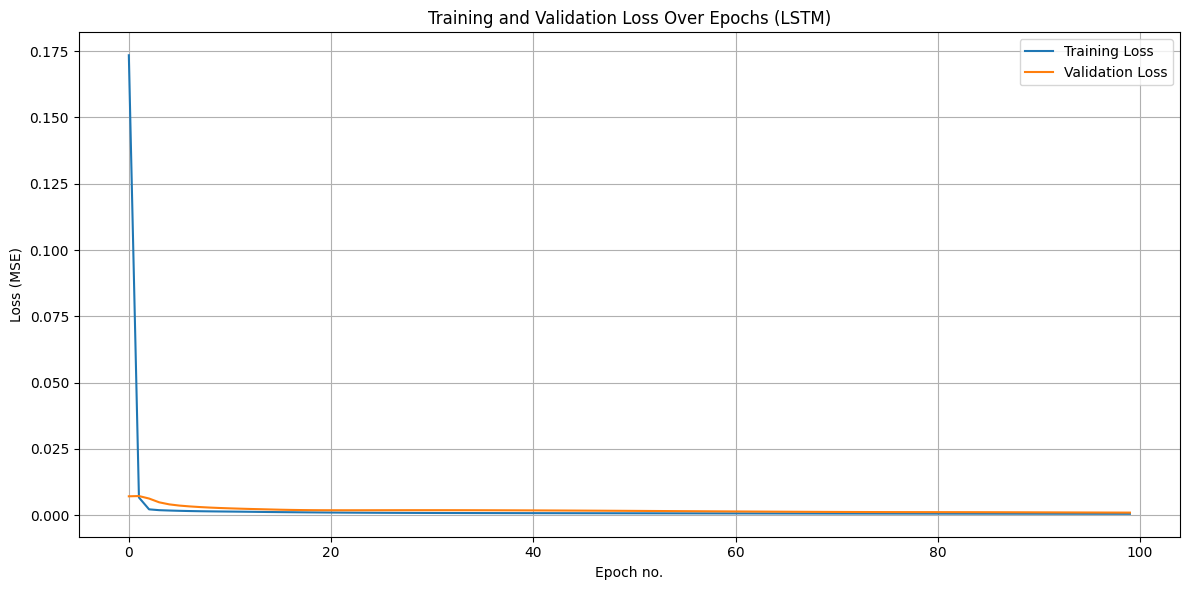


--- Starting Reinforcement Learning Fine-Tuning (Batched) ---
RL Epoch 1/150, Average Loss per Batch: 0.000548
RL Epoch 2/150, Average Loss per Batch: 0.000578
RL Epoch 3/150, Average Loss per Batch: 0.000550
RL Epoch 4/150, Average Loss per Batch: 0.000539
RL Epoch 5/150, Average Loss per Batch: 0.000541
RL Epoch 6/150, Average Loss per Batch: 0.000539
RL Epoch 7/150, Average Loss per Batch: 0.000537
RL Epoch 8/150, Average Loss per Batch: 0.000536
RL Epoch 9/150, Average Loss per Batch: 0.000535
RL Epoch 10/150, Average Loss per Batch: 0.000534
RL Epoch 11/150, Average Loss per Batch: 0.000532
RL Epoch 12/150, Average Loss per Batch: 0.000531
RL Epoch 13/150, Average Loss per Batch: 0.000530
RL Epoch 14/150, Average Loss per Batch: 0.000528
RL Epoch 15/150, Average Loss per Batch: 0.000527
RL Epoch 16/150, Average Loss per Batch: 0.000526
RL Epoch 17/150, Average Loss per Batch: 0.000525
RL Epoch 18/150, Average Loss per Batch: 0.000523
RL Epoch 19/150, Average Loss per Batch: 0.000

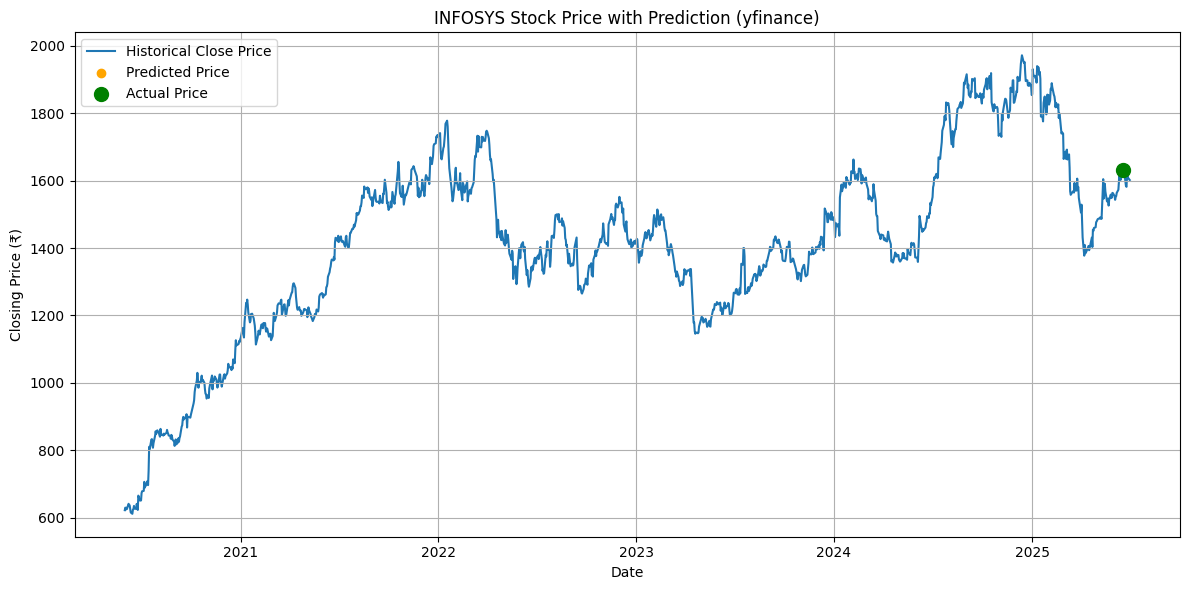


 Test Set Performance Metrics (LSTM):
 Mean Absolute Error (MAE) : ₹15.76
 Mean Squared Error (MSE)  : ₹405.90
 Root Squared Error (RMSE) : ₹20.15
 R² Score                  : 0.5239
 Mean Absolute Percentage Error (MAPE) : 0.99%
 Accuracy (100 - MAPE) : 99.01%
 MSE Percentage of Average Price: 25.43%
 MAE Percentage of Average Price: 0.99%


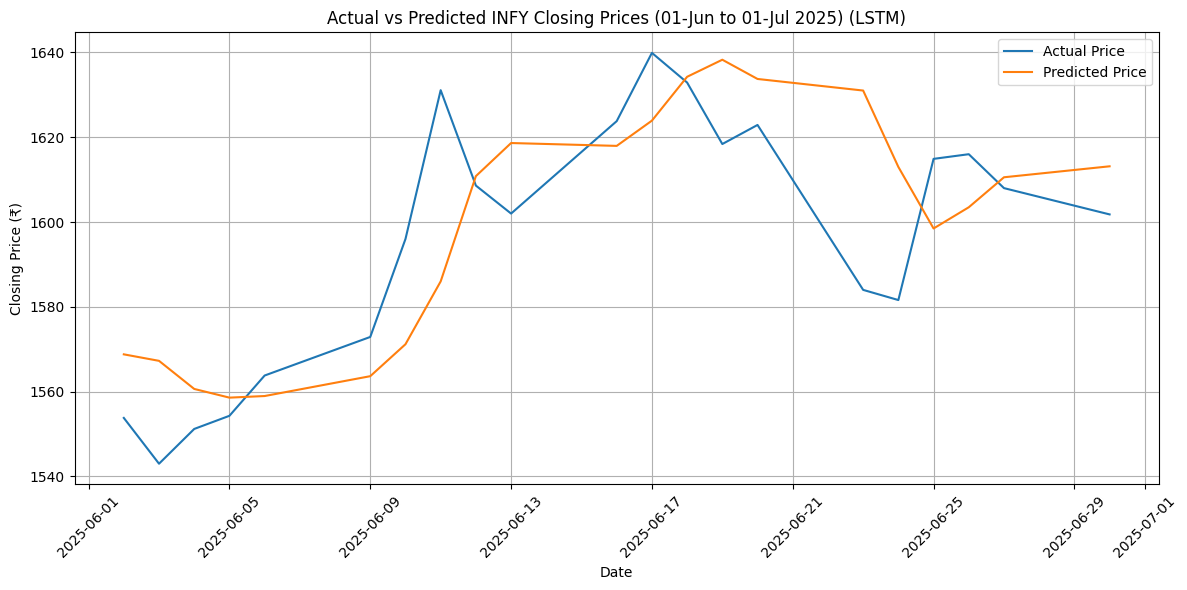

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import SimpleRNN, LSTM
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from matplotlib.dates import DateFormatter
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import numpy as np
import pandas as pd
import datetime
import holidays
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.filterwarnings('ignore')

# Set seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

SYMBOL = "INFY.NS"
SEQUENCE_LENGTH = 60

TRAIN_START_DATE = "2020-06-01"
TRAIN_END_DATE = "2025-05-31"

TEST_START_DATE = "2025-06-01"
TEST_END_DATE = "2025-07-01"

# Get Indian trading holidays
def get_nse_holidays():
    in_holidays = holidays.India(years=range(2020, 2026))
    return set(in_holidays.keys())

TRADING_HOLIDAYS = get_nse_holidays()

def is_valid_date(date_str):
    try:
        date = datetime.datetime.strptime(date_str, "%Y-%m-%d").date()
        if not (datetime.date(2025, 6, 1) <= date <= datetime.date(2025, 7, 1)):
            print("Date must be between 2025-06-01 and 2025-07-01.")
            return False
        if date.weekday() >= 5:
            print("Weekends are not trading days.")
            return False
        if date in TRADING_HOLIDAYS:
            print("Entered date is a trading holiday.")
            return False
        return True
    except ValueError:
        print("Invalid date format. Use YYYY-MM-DD.")
        return False

def get_stock_data():
    print("Fetching data from Yahoo Finance...")
    full_df = yf.download(SYMBOL, start=TRAIN_START_DATE, end=TEST_END_DATE)
    full_df = full_df[['Close']]
    full_df.dropna(inplace=True)
    full_df.index = pd.to_datetime(full_df.index)

    train_df = full_df.loc[TRAIN_START_DATE:TRAIN_END_DATE]
    test_df = full_df.loc[TEST_START_DATE:TEST_END_DATE]
    return train_df, test_df, full_df

# Prompt until valid date is entered
def get_user_date():
    while True:
        date_input = input("Enter a date (YYYY-MM-DD): ")
        if is_valid_date(date_input):
            return datetime.datetime.strptime(date_input, "%Y-%m-%d").date()

# Build the LSTM model
def build_model(input_shape, learning_rate=0.001): # Added learning_rate parameter
    model = Sequential()
    model.add(LSTM(units=50, activation='tanh', input_shape=input_shape))
    model.add(Dense(1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Reinforcement Learning Fine-Tuning
class RLAgent:
    """
    A simple RL Agent to fine-tune the RNN model.
    The "environment" is the time series data, and the "action" is the prediction.
    The reward is based on prediction accuracy.
    """
    def __init__(self, model, learning_rate=0.001):
        self.model = model
        self.optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    @tf.function
    def train_step(self, state, target):
        """
        Performs a single training step to fine-tune the model weights.
        """
        with tf.GradientTape() as tape:
            prediction = self.model(state, training=True)
            # Use Mean Squared Error directly as the loss to minimize
            loss = tf.reduce_mean(tf.square(tf.cast(target, tf.float32) - prediction))

        grads = tape.gradient(loss, self.model.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.model.trainable_variables))
        return loss # Return the mean loss for the batch


def fine_tune_with_rl(model, X_train, y_train, epochs=5, learning_rate=0.001, batch_size=32):
    """
    Fine- tunes the pre-trained RNN model using a simple reinforcement learning loop with batched data.
    """
    print("\n--- Starting Reinforcement Learning Fine-Tuning (Batched) ---")
    agent = RLAgent(model, learning_rate=learning_rate)

    # Create a TensorFlow Dataset and batch it
    dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    dataset = dataset.batch(batch_size)

    num_batches = tf.data.experimental.cardinality(dataset).numpy()

    for epoch in range(epochs):
        total_loss = 0
        batch_count = 0
        for batch_x, batch_y in dataset:
            # Ensure batch_x has the correct shape (batch_size, sequence_length, 1)
            batch_x_reshaped = tf.reshape(batch_x, (tf.shape(batch_x)[0], tf.shape(batch_x)[1], 1))
            loss = agent.train_step(batch_x_reshaped, batch_y)
            total_loss += loss.numpy() # Sum up the mean loss for each batch
            batch_count += 1

        # Calculate average loss per epoch
        average_epoch_loss = total_loss / num_batches if num_batches > 0 else 0
        print(f"RL Epoch {epoch + 1}/{epochs}, Average Loss per Batch: {average_epoch_loss:.6f}") # Print average loss

    print("--- RL Fine-Tuning Complete ---")
    return model


def create_test_sequences(train_df, test_df, scaler):
    combined = pd.concat([train_df, test_df])
    scaled = scaler.transform(combined[['Close']])
    X_test = []
    test_dates = test_df.index.date

    for i in range(len(train_df), len(combined)):
        if i - SEQUENCE_LENGTH < 0:
            continue
        seq = scaled[i - SEQUENCE_LENGTH:i]
        X_test.append(seq)

    X_test = np.array(X_test)
    return X_test, test_dates

def predict_price_on_test(model, full_df, scaler, user_date):
    all_dates = full_df.index.date
    try:
        idx = list(all_dates).index(user_date)
    except ValueError:
        print("User date not found in data.")
        return None, None, user_date

    if idx < SEQUENCE_LENGTH:
        print("Not enough data to predict for this date.")
        return None, None, user_date

    input_seq = scaler.transform(full_df[['Close']].values)[idx - SEQUENCE_LENGTH:idx]
    input_seq = np.reshape(input_seq, (1, SEQUENCE_LENGTH, 1))

    predicted_scaled = model.predict(input_seq, verbose=0)
    predicted_price = scaler.inverse_transform(predicted_scaled)[0][0]

    actual_price = float(full_df.iloc[idx]['Close']) if idx < len(full_df) else None
    return predicted_price, actual_price, full_df.index[idx].date()

# Plot the result
def plot_results(df, predicted_date, predicted_price, actual_price):
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='Historical Close Price',zorder=1)
    #plt.axvline(pd.to_datetime(predicted_date), color='red', linestyle='--', label='Predicted Date')
    plt.scatter(pd.to_datetime(predicted_date), predicted_price, color='orange', label='Predicted Price',zorder=2)
    if actual_price is not None:
        plt.scatter(pd.to_datetime(predicted_date), actual_price, color='green', label='Actual Price',zorder=3, s=100)
    plt.title("INFOSYS Stock Price with Prediction (yfinance)")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (₹)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#Plotting error with no. of epochs
def plot_training_loss(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title("Training and Validation Loss Over Epochs (LSTM)") # Changed title
    plt.xlabel("Epoch no.")
    plt.ylabel("Loss (MSE)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def main():
    print("=== INFOSYS LSTM Stock Price Predictor (Test Phase June–July 2025) ===") # Changed title
    user_date = get_user_date()

    # Step 1: Get stock data
    train_df, test_df, full_df = get_stock_data()

    # Step 2: Preprocess
    scaler = MinMaxScaler()
    scaled_train = scaler.fit_transform(train_df[['Close']])
    X, y = [], []
    for i in range(SEQUENCE_LENGTH, len(scaled_train)):
        X.append(scaled_train[i - SEQUENCE_LENGTH:i])
        y.append(scaled_train[i])
    X = np.array(X)
    y = np.array(y)

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)
    #early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    # Step 3: Build and train model
    model = build_model((X_train.shape[1], 1), learning_rate=0.0005) # Reduced Adam learning rate
    print("Training LSTM model...") # Changed print statement
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose = 1) #callbacks = [early_stop], verbose=1)

    #print(f"\nBest weights restored from epoch: {early_stop.best_epoch + 1}")

    # Step 4: Plot training loss
    plot_training_loss(history)

    # Step 5: Fine-tune with Reinforcement Learning
    rl_tuned_model = fine_tune_with_rl(model, X_train, y_train, epochs=150, learning_rate=0.0001, batch_size=32)

    # Predict on training data to evaluate performance
    y_train_pred_scaled = rl_tuned_model.predict(X_train, verbose=0)
    y_train_pred = scaler.inverse_transform(y_train_pred_scaled)
    y_true_train = scaler.inverse_transform(y_train.reshape(-1, 1))

    # Calculate and print training metrics
    mae_train = mean_absolute_error(y_true_train, y_train_pred)
    mse_train = mean_squared_error(y_true_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_true_train, y_train_pred)
    mape_train = mean_absolute_percentage_error(y_true_train, y_train_pred) * 100
    accuracy_train = 100 - mape_train
    mse_percent_train = (mse_train / np.mean(y_true_train)) * 100 if np.mean(y_true_train) != 0 else np.nan
    mae_percent_train = (mae_train / np.mean(y_true_train)) * 100 if np.mean(y_true_train) != 0 else np.nan
    print("\n Training Set Performance Metrics (LSTM):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_train:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_train:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_train:.2f}")
    print(f" R² Score                  : {r2_train:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_train:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_train:.2f}%")
    print(f" MSE Percentage of Average Price : {mse_percent_train:.2f}%")
    print(f" MAE Percentage of Average Price : {mae_percent_train:.2f}%")

    # Predict on validation set
    y_val_pred_scaled = rl_tuned_model.predict(X_val, verbose=0)
    y_val_pred = scaler.inverse_transform(y_val_pred_scaled)
    y_val_true = scaler.inverse_transform(y_val.reshape(-1, 1))

    # Calculate and print validation metrics
    mae_val = mean_absolute_error(y_val_true, y_val_pred)
    mse_val = mean_squared_error(y_val_true, y_val_pred)
    rmse_val = np.sqrt(mse_val)
    r2_val = r2_score(y_val_true, y_val_pred)
    mape_val = mean_absolute_percentage_error(y_val_true, y_val_pred) * 100
    accuracy_val = 100 - mape_val
    mse_percent_val = (mse_val / np.mean(y_val_true)) * 100 if np.mean(y_val_true) != 0 else np.nan
    mae_percent_val = (mae_val / np.mean(y_val_true)) * 100 if np.mean(y_val_true) != 0 else np.nan
    print("\n Validation Set Performance Metrics (LSTM):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_val:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_val:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_val:.2f}")
    print(f" R² Score                  : {r2_val:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_val:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_val:.2f}%")
    print(f" MSE Percentage of Average Price: {mse_percent_val:.2f}%")
    print(f" MAE Percentage of Average Price: {mae_percent_val:.2f}%")


    # Step 6: Predict for user-input test date
    predicted_price, actual_price, predicted_date = predict_price_on_test(rl_tuned_model, full_df, scaler, user_date)
    if predicted_price is not None:
        print(f"\n Prediction for {predicted_date}:")
        print(f" Predicted Closing Price: ₹{predicted_price:.2f}")
        if actual_price is not None:
            print(f" Actual Closing Price   : ₹{actual_price}")
        else:
            print("Actual price not available.")

        plot_results(full_df, predicted_date, predicted_price, actual_price)
    else:
        print("❌ Unable to make prediction.")

    # === Step 7: Predict all test dates and compare ===

    # Reuse combined full_df
    combined_df = pd.concat([train_df, test_df])
    scaled_combined = scaler.transform(combined_df[['Close']])

    X_test_all = []
    test_date_indexes = []

    for i in range(len(train_df), len(combined_df)):
        if i - SEQUENCE_LENGTH < 0:
            continue
        seq = scaled_combined[i - SEQUENCE_LENGTH:i]
        X_test_all.append(seq)
        test_date_indexes.append(combined_df.index[i])

    X_test_all = np.array(X_test_all)

    # Predict on test sequences
    y_test_pred_scaled = rl_tuned_model.predict(X_test_all, verbose=0)
    y_test_pred = scaler.inverse_transform(y_test_pred_scaled)

    # Actual prices
    y_test_true = test_df.loc[test_date_indexes, 'Close'].values

    # Calculate and print test metrics
    mae_test = mean_absolute_error(y_test_true, y_test_pred)
    mse_test = mean_squared_error(y_test_true, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test_true, y_test_pred)
    mape_test = mean_absolute_percentage_error(y_test_true, y_test_pred) * 100
    accuracy_test = 100 - mape_test
    mse_percent_test = (mse_test / np.mean(y_test_true)) * 100 if np.mean(y_test_true) != 0 else np.nan
    mae_percent_test = (mae_test / np.mean(y_test_true)) * 100 if np.mean(y_test_true) != 0 else np.nan
    print("\n Test Set Performance Metrics (LSTM):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_test:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_test:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_test:.2f}")
    print(f" R² Score                  : {r2_test:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_test:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_test:.2f}%")
    print(f" MSE Percentage of Average Price: {mse_percent_test:.2f}%")
    print(f" MAE Percentage of Average Price: {mae_percent_test:.2f}%")

    # Plot actual vs predicted
    plt.figure(figsize=(12, 6))
    plt.plot(test_date_indexes, y_test_true, label='Actual Price')
    plt.plot(test_date_indexes, y_test_pred, label='Predicted Price')
    plt.title("Actual vs Predicted INFY Closing Prices (01-Jun to 01-Jul 2025) (LSTM)")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (₹)")
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

=== INFOSYS LSTM Stock Price Predictor (Test Phase June–July 2025) ===
Enter a date (YYYY-MM-DD): 2025-06-18


[*********************100%***********************]  1 of 1 completed

Fetching data from Yahoo Finance...


Training LSTM model...
Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.2156 - val_loss: 0.0112
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0052 - val_loss: 0.0031
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0021 - val_loss: 0.0041
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0017 - val_loss: 0.0037
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0016 - val_loss: 0.0033
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0015 - val_loss: 0.0031
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0014 - val_loss: 0.0029
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0014 - val_loss: 0.0028
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0013 - val_loss: 0.0026
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0013 - val_loss: 0.0025
Epoch 11/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0013 - val_loss: 0.0025
Epoch 12/100
30/30 ━━━━━━━━━━

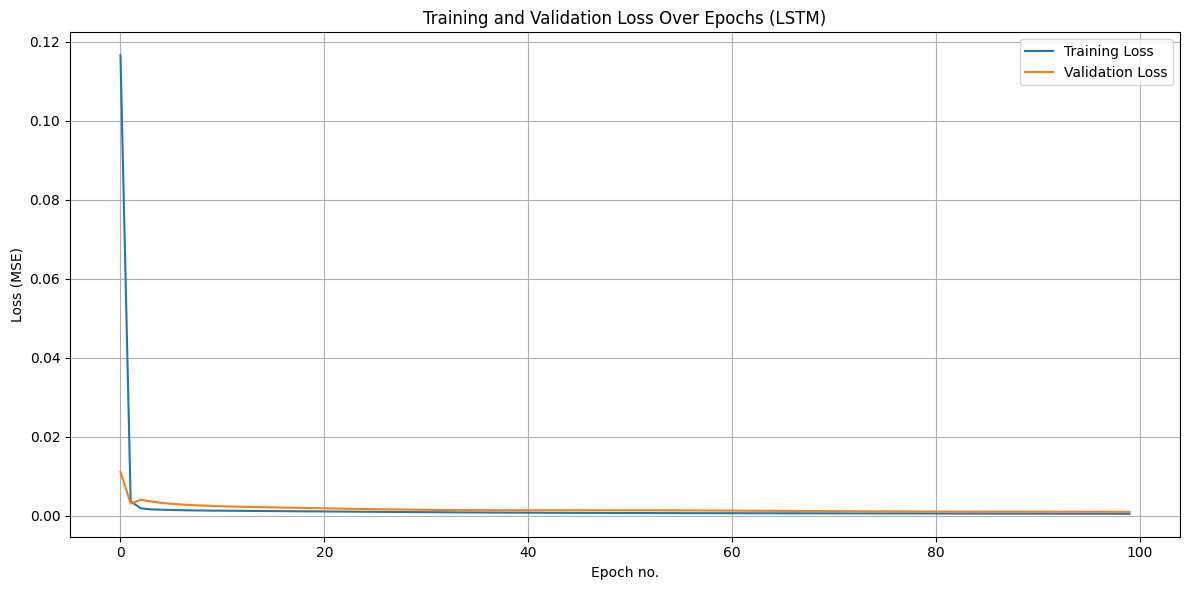


--- Starting Reinforcement Learning Fine-Tuning (Batched) ---
RL Epoch 1/200, Average Loss per Batch: 0.000555
RL Epoch 2/200, Average Loss per Batch: 0.000563
RL Epoch 3/200, Average Loss per Batch: 0.000548
RL Epoch 4/200, Average Loss per Batch: 0.000544
RL Epoch 5/200, Average Loss per Batch: 0.000542
RL Epoch 6/200, Average Loss per Batch: 0.000540
RL Epoch 7/200, Average Loss per Batch: 0.000538
RL Epoch 8/200, Average Loss per Batch: 0.000536
RL Epoch 9/200, Average Loss per Batch: 0.000534
RL Epoch 10/200, Average Loss per Batch: 0.000532
RL Epoch 11/200, Average Loss per Batch: 0.000530
RL Epoch 12/200, Average Loss per Batch: 0.000528
RL Epoch 13/200, Average Loss per Batch: 0.000526
RL Epoch 14/200, Average Loss per Batch: 0.000525
RL Epoch 15/200, Average Loss per Batch: 0.000523
RL Epoch 16/200, Average Loss per Batch: 0.000521
RL Epoch 17/200, Average Loss per Batch: 0.000519
RL Epoch 18/200, Average Loss per Batch: 0.000517
RL Epoch 19/200, Average Loss per Batch: 0.000

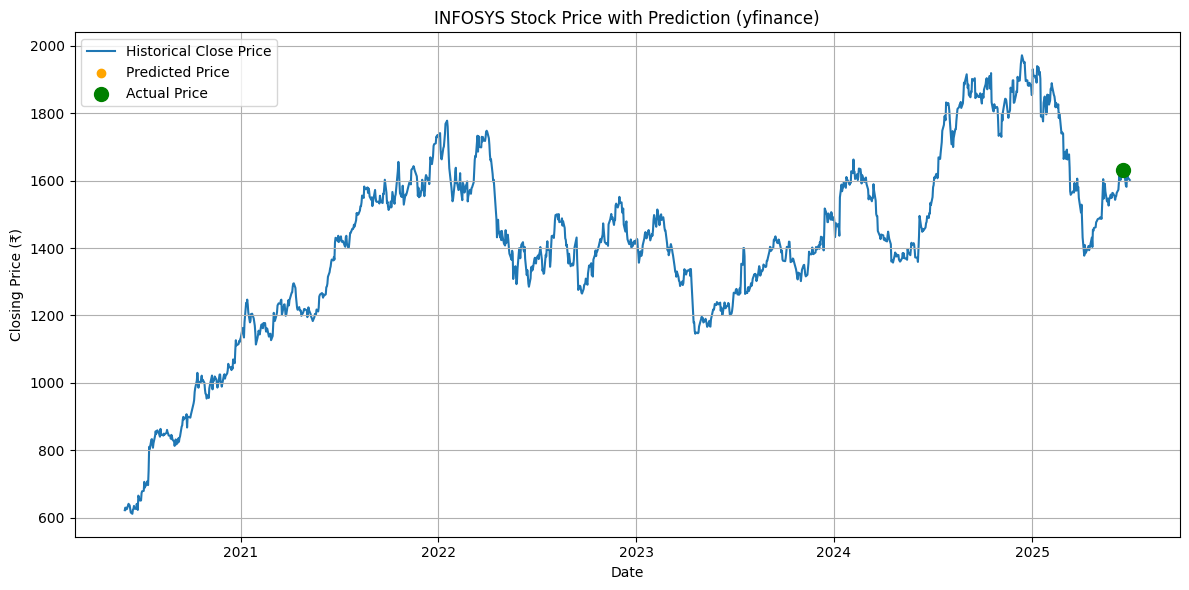


 Test Set Performance Metrics (LSTM):
 Mean Absolute Error (MAE) : ₹15.81
 Mean Squared Error (MSE)  : ₹369.74
 Root Squared Error (RMSE) : ₹19.23
 R² Score                  : 0.5663
 Mean Absolute Percentage Error (MAPE) : 0.99%
 Accuracy (100 - MAPE) : 99.01%
 MSE Percentage of Average Price: 23.16%
 MAE Percentage of Average Price: 0.99%


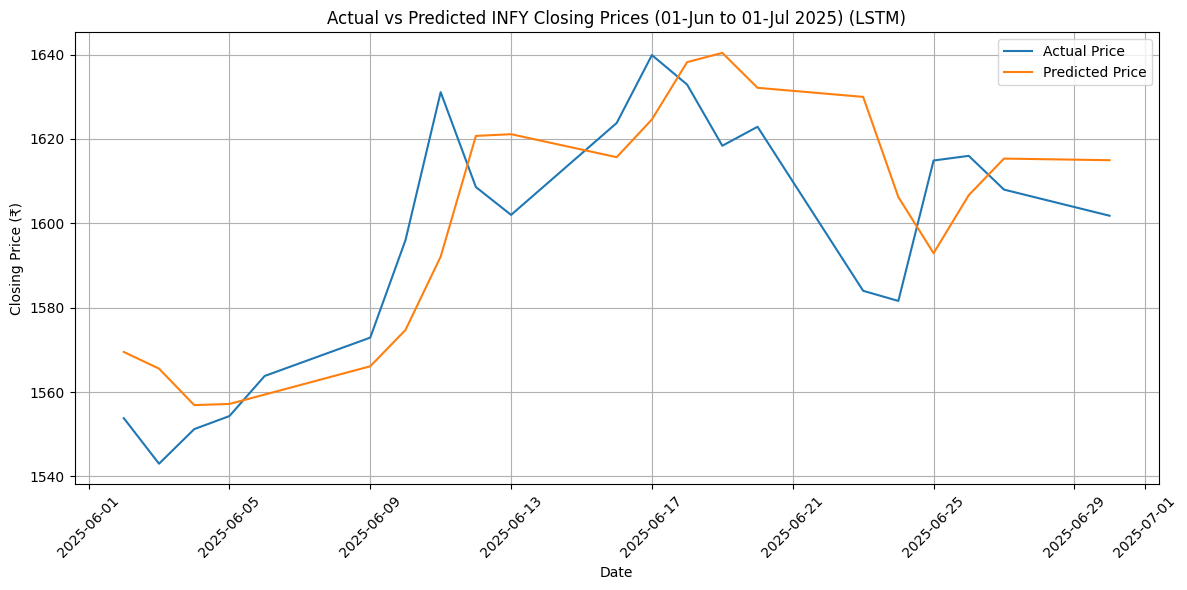

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import SimpleRNN, LSTM
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from matplotlib.dates import DateFormatter
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import numpy as np
import pandas as pd
import datetime
import holidays
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.filterwarnings('ignore')

# Set seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

SYMBOL = "INFY.NS"
SEQUENCE_LENGTH = 60

TRAIN_START_DATE = "2020-06-01"
TRAIN_END_DATE = "2025-05-31"

TEST_START_DATE = "2025-06-01"
TEST_END_DATE = "2025-07-01"

# Get Indian trading holidays
def get_nse_holidays():
    in_holidays = holidays.India(years=range(2020, 2026))
    return set(in_holidays.keys())

TRADING_HOLIDAYS = get_nse_holidays()

def is_valid_date(date_str):
    try:
        date = datetime.datetime.strptime(date_str, "%Y-%m-%d").date()
        if not (datetime.date(2025, 6, 1) <= date <= datetime.date(2025, 7, 1)):
            print("Date must be between 2025-06-01 and 2025-07-01.")
            return False
        if date.weekday() >= 5:
            print("Weekends are not trading days.")
            return False
        if date in TRADING_HOLIDAYS:
            print("Entered date is a trading holiday.")
            return False
        return True
    except ValueError:
        print("Invalid date format. Use YYYY-MM-DD.")
        return False

def get_stock_data():
    print("Fetching data from Yahoo Finance...")
    full_df = yf.download(SYMBOL, start=TRAIN_START_DATE, end=TEST_END_DATE)
    full_df = full_df[['Close']]
    full_df.dropna(inplace=True)
    full_df.index = pd.to_datetime(full_df.index)

    train_df = full_df.loc[TRAIN_START_DATE:TRAIN_END_DATE]
    test_df = full_df.loc[TEST_START_DATE:TEST_END_DATE]
    return train_df, test_df, full_df

# Prompt until valid date is entered
def get_user_date():
    while True:
        date_input = input("Enter a date (YYYY-MM-DD): ")
        if is_valid_date(date_input):
            return datetime.datetime.strptime(date_input, "%Y-%m-%d").date()

# Build the LSTM model
def build_model(input_shape, learning_rate=0.001): # Added learning_rate parameter
    model = Sequential()
    model.add(LSTM(units=50, activation='tanh', input_shape=input_shape))
    model.add(Dense(1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Reinforcement Learning Fine-Tuning
class RLAgent:
    """
    A simple RL Agent to fine-tune the RNN model.
    The "environment" is the time series data, and the "action" is the prediction.
    The reward is based on prediction accuracy.
    """
    def __init__(self, model, learning_rate=0.001):
        self.model = model
        self.optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    @tf.function
    def train_step(self, state, target):
        """
        Performs a single training step to fine-tune the model weights.
        """
        with tf.GradientTape() as tape:
            prediction = self.model(state, training=True)
            # Use Mean Squared Error directly as the loss to minimize
            loss = tf.reduce_mean(tf.square(tf.cast(target, tf.float32) - prediction))

        grads = tape.gradient(loss, self.model.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.model.trainable_variables))
        return loss # Return the mean loss for the batch


def fine_tune_with_rl(model, X_train, y_train, epochs=5, learning_rate=0.001, batch_size=32):
    """
    Fine- tunes the pre-trained RNN model using a simple reinforcement learning loop with batched data.
    """
    print("\n--- Starting Reinforcement Learning Fine-Tuning (Batched) ---")
    agent = RLAgent(model, learning_rate=learning_rate)

    # Create a TensorFlow Dataset and batch it
    dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    dataset = dataset.batch(batch_size)

    num_batches = tf.data.experimental.cardinality(dataset).numpy()

    for epoch in range(epochs):
        total_loss = 0
        batch_count = 0
        for batch_x, batch_y in dataset:
            # Ensure batch_x has the correct shape (batch_size, sequence_length, 1)
            batch_x_reshaped = tf.reshape(batch_x, (tf.shape(batch_x)[0], tf.shape(batch_x)[1], 1))
            loss = agent.train_step(batch_x_reshaped, batch_y)
            total_loss += loss.numpy() # Sum up the mean loss for each batch
            batch_count += 1

        # Calculate average loss per epoch
        average_epoch_loss = total_loss / num_batches if num_batches > 0 else 0
        print(f"RL Epoch {epoch + 1}/{epochs}, Average Loss per Batch: {average_epoch_loss:.6f}") # Print average loss

    print("--- RL Fine-Tuning Complete ---")
    return model


def create_test_sequences(train_df, test_df, scaler):
    combined = pd.concat([train_df, test_df])
    scaled = scaler.transform(combined[['Close']])
    X_test = []
    test_dates = test_df.index.date

    for i in range(len(train_df), len(combined)):
        if i - SEQUENCE_LENGTH < 0:
            continue
        seq = scaled[i - SEQUENCE_LENGTH:i]
        X_test.append(seq)

    X_test = np.array(X_test)
    return X_test, test_dates

def predict_price_on_test(model, full_df, scaler, user_date):
    all_dates = full_df.index.date
    try:
        idx = list(all_dates).index(user_date)
    except ValueError:
        print("User date not found in data.")
        return None, None, user_date

    if idx < SEQUENCE_LENGTH:
        print("Not enough data to predict for this date.")
        return None, None, user_date

    input_seq = scaler.transform(full_df[['Close']].values)[idx - SEQUENCE_LENGTH:idx]
    input_seq = np.reshape(input_seq, (1, SEQUENCE_LENGTH, 1))

    predicted_scaled = model.predict(input_seq, verbose=0)
    predicted_price = scaler.inverse_transform(predicted_scaled)[0][0]

    actual_price = float(full_df.iloc[idx]['Close']) if idx < len(full_df) else None
    return predicted_price, actual_price, full_df.index[idx].date()

# Plot the result
def plot_results(df, predicted_date, predicted_price, actual_price):
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='Historical Close Price',zorder=1)
    #plt.axvline(pd.to_datetime(predicted_date), color='red', linestyle='--', label='Predicted Date')
    plt.scatter(pd.to_datetime(predicted_date), predicted_price, color='orange', label='Predicted Price',zorder=2)
    if actual_price is not None:
        plt.scatter(pd.to_datetime(predicted_date), actual_price, color='green', label='Actual Price',zorder=3, s=100)
    plt.title("INFOSYS Stock Price with Prediction (yfinance)")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (₹)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#Plotting error with no. of epochs
def plot_training_loss(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title("Training and Validation Loss Over Epochs (LSTM)") # Changed title
    plt.xlabel("Epoch no.")
    plt.ylabel("Loss (MSE)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def main():
    print("=== INFOSYS LSTM Stock Price Predictor (Test Phase June–July 2025) ===") # Changed title
    user_date = get_user_date()

    # Step 1: Get stock data
    train_df, test_df, full_df = get_stock_data()

    # Step 2: Preprocess
    scaler = MinMaxScaler()
    scaled_train = scaler.fit_transform(train_df[['Close']])
    X, y = [], []
    for i in range(SEQUENCE_LENGTH, len(scaled_train)):
        X.append(scaled_train[i - SEQUENCE_LENGTH:i])
        y.append(scaled_train[i])
    X = np.array(X)
    y = np.array(y)

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)
    #early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    # Step 3: Build and train model
    model = build_model((X_train.shape[1], 1), learning_rate=0.0005) # Reduced Adam learning rate
    print("Training LSTM model...") # Changed print statement
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose = 1) #callbacks = [early_stop], verbose=1)

    #print(f"\nBest weights restored from epoch: {early_stop.best_epoch + 1}")

    # Step 4: Plot training loss
    plot_training_loss(history)

    # Step 5: Fine-tune with Reinforcement Learning
    rl_tuned_model = fine_tune_with_rl(model, X_train, y_train, epochs=200, learning_rate=0.0001, batch_size=32)

    # Predict on training data to evaluate performance
    y_train_pred_scaled = rl_tuned_model.predict(X_train, verbose=0)
    y_train_pred = scaler.inverse_transform(y_train_pred_scaled)
    y_true_train = scaler.inverse_transform(y_train.reshape(-1, 1))

    # Calculate and print training metrics
    mae_train = mean_absolute_error(y_true_train, y_train_pred)
    mse_train = mean_squared_error(y_true_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_true_train, y_train_pred)
    mape_train = mean_absolute_percentage_error(y_true_train, y_train_pred) * 100
    accuracy_train = 100 - mape_train
    mse_percent_train = (mse_train / np.mean(y_true_train)) * 100 if np.mean(y_true_train) != 0 else np.nan
    mae_percent_train = (mae_train / np.mean(y_true_train)) * 100 if np.mean(y_true_train) != 0 else np.nan
    print("\n Training Set Performance Metrics (LSTM):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_train:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_train:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_train:.2f}")
    print(f" R² Score                  : {r2_train:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_train:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_train:.2f}%")
    print(f" MSE Percentage of Average Price : {mse_percent_train:.2f}%")
    print(f" MAE Percentage of Average Price : {mae_percent_train:.2f}%")

    # Predict on validation set
    y_val_pred_scaled = rl_tuned_model.predict(X_val, verbose=0)
    y_val_pred = scaler.inverse_transform(y_val_pred_scaled)
    y_val_true = scaler.inverse_transform(y_val.reshape(-1, 1))

    # Calculate and print validation metrics
    mae_val = mean_absolute_error(y_val_true, y_val_pred)
    mse_val = mean_squared_error(y_val_true, y_val_pred)
    rmse_val = np.sqrt(mse_val)
    r2_val = r2_score(y_val_true, y_val_pred)
    mape_val = mean_absolute_percentage_error(y_val_true, y_val_pred) * 100
    accuracy_val = 100 - mape_val
    mse_percent_val = (mse_val / np.mean(y_val_true)) * 100 if np.mean(y_val_true) != 0 else np.nan
    mae_percent_val = (mae_val / np.mean(y_val_true)) * 100 if np.mean(y_val_true) != 0 else np.nan
    print("\n Validation Set Performance Metrics (LSTM):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_val:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_val:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_val:.2f}")
    print(f" R² Score                  : {r2_val:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_val:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_val:.2f}%")
    print(f" MSE Percentage of Average Price: {mse_percent_val:.2f}%")
    print(f" MAE Percentage of Average Price: {mae_percent_val:.2f}%")


    # Step 6: Predict for user-input test date
    predicted_price, actual_price, predicted_date = predict_price_on_test(rl_tuned_model, full_df, scaler, user_date)
    if predicted_price is not None:
        print(f"\n Prediction for {predicted_date}:")
        print(f" Predicted Closing Price: ₹{predicted_price:.2f}")
        if actual_price is not None:
            print(f" Actual Closing Price   : ₹{actual_price}")
        else:
            print("Actual price not available.")

        plot_results(full_df, predicted_date, predicted_price, actual_price)
    else:
        print("❌ Unable to make prediction.")

    # === Step 7: Predict all test dates and compare ===

    # Reuse combined full_df
    combined_df = pd.concat([train_df, test_df])
    scaled_combined = scaler.transform(combined_df[['Close']])

    X_test_all = []
    test_date_indexes = []

    for i in range(len(train_df), len(combined_df)):
        if i - SEQUENCE_LENGTH < 0:
            continue
        seq = scaled_combined[i - SEQUENCE_LENGTH:i]
        X_test_all.append(seq)
        test_date_indexes.append(combined_df.index[i])

    X_test_all = np.array(X_test_all)

    # Predict on test sequences
    y_test_pred_scaled = rl_tuned_model.predict(X_test_all, verbose=0)
    y_test_pred = scaler.inverse_transform(y_test_pred_scaled)

    # Actual prices
    y_test_true = test_df.loc[test_date_indexes, 'Close'].values

    # Calculate and print test metrics
    mae_test = mean_absolute_error(y_test_true, y_test_pred)
    mse_test = mean_squared_error(y_test_true, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test_true, y_test_pred)
    mape_test = mean_absolute_percentage_error(y_test_true, y_test_pred) * 100
    accuracy_test = 100 - mape_test
    mse_percent_test = (mse_test / np.mean(y_test_true)) * 100 if np.mean(y_test_true) != 0 else np.nan
    mae_percent_test = (mae_test / np.mean(y_test_true)) * 100 if np.mean(y_test_true) != 0 else np.nan
    print("\n Test Set Performance Metrics (LSTM):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_test:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_test:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_test:.2f}")
    print(f" R² Score                  : {r2_test:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_test:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_test:.2f}%")
    print(f" MSE Percentage of Average Price: {mse_percent_test:.2f}%")
    print(f" MAE Percentage of Average Price: {mae_percent_test:.2f}%")

    # Plot actual vs predicted
    plt.figure(figsize=(12, 6))
    plt.plot(test_date_indexes, y_test_true, label='Actual Price')
    plt.plot(test_date_indexes, y_test_pred, label='Predicted Price')
    plt.title("Actual vs Predicted INFY Closing Prices (01-Jun to 01-Jul 2025) (LSTM)")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (₹)")
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

# **500 epochs**

=== INFOSYS LSTM Stock Price Predictor (Test Phase June–July 2025) ===
Enter a date (YYYY-MM-DD): 2025-06-18


[*********************100%***********************]  1 of 1 completed

Fetching data from Yahoo Finance...
Training LSTM model...
Epoch 1/500


30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - loss: 0.2298 - val_loss: 0.0122
Epoch 2/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0090 - val_loss: 0.0060
Epoch 3/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0023 - val_loss: 0.0059
Epoch 4/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0019 - val_loss: 0.0047
Epoch 5/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0018 - val_loss: 0.0040
Epoch 6/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0017 - val_loss: 0.0036
Epoch 7/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0016 - val_loss: 0.0033
Epoch 8/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0015 - val_loss: 0.0031
Epoch 9/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0014 - val_loss: 0.0029
Epoch 10/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0014 - val_loss: 0.0027
Epoch 11/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0013 - val_loss: 0.0026
Epoch 12/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0

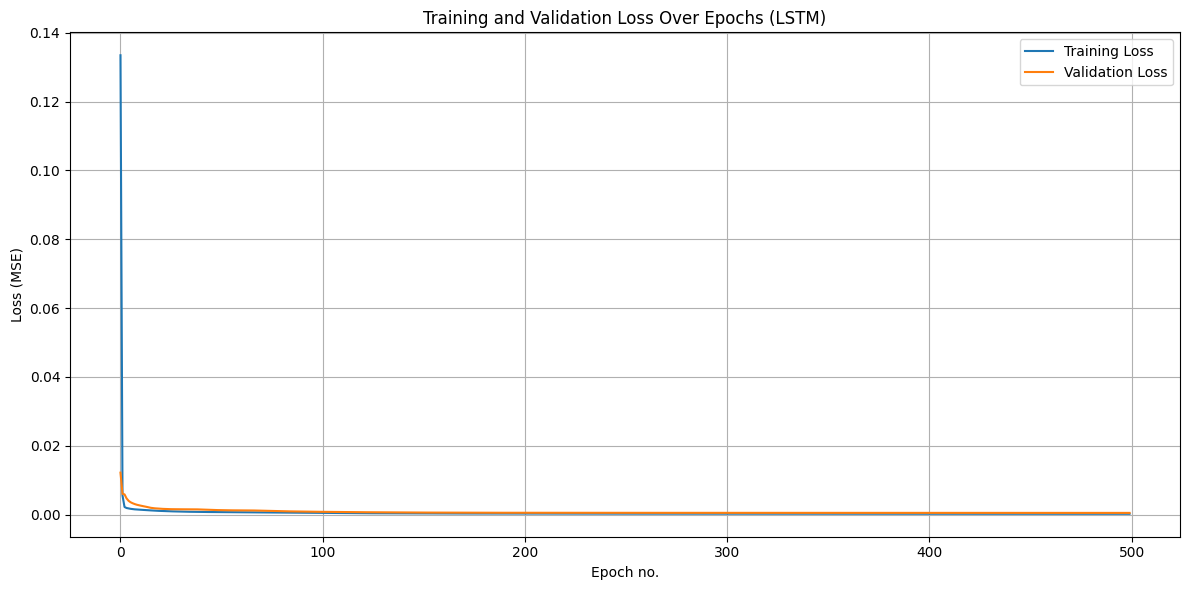


--- Starting Reinforcement Learning Fine-Tuning (Batched) ---
RL Epoch 1/150, Average Loss per Batch: 0.000235
RL Epoch 2/150, Average Loss per Batch: 0.000247
RL Epoch 3/150, Average Loss per Batch: 0.000236
RL Epoch 4/150, Average Loss per Batch: 0.000235
RL Epoch 5/150, Average Loss per Batch: 0.000235
RL Epoch 6/150, Average Loss per Batch: 0.000232
RL Epoch 7/150, Average Loss per Batch: 0.000234
RL Epoch 8/150, Average Loss per Batch: 0.000234
RL Epoch 9/150, Average Loss per Batch: 0.000232
RL Epoch 10/150, Average Loss per Batch: 0.000234
RL Epoch 11/150, Average Loss per Batch: 0.000234
RL Epoch 12/150, Average Loss per Batch: 0.000233
RL Epoch 13/150, Average Loss per Batch: 0.000234
RL Epoch 14/150, Average Loss per Batch: 0.000234
RL Epoch 15/150, Average Loss per Batch: 0.000233
RL Epoch 16/150, Average Loss per Batch: 0.000234
RL Epoch 17/150, Average Loss per Batch: 0.000234
RL Epoch 18/150, Average Loss per Batch: 0.000234
RL Epoch 19/150, Average Loss per Batch: 0.000

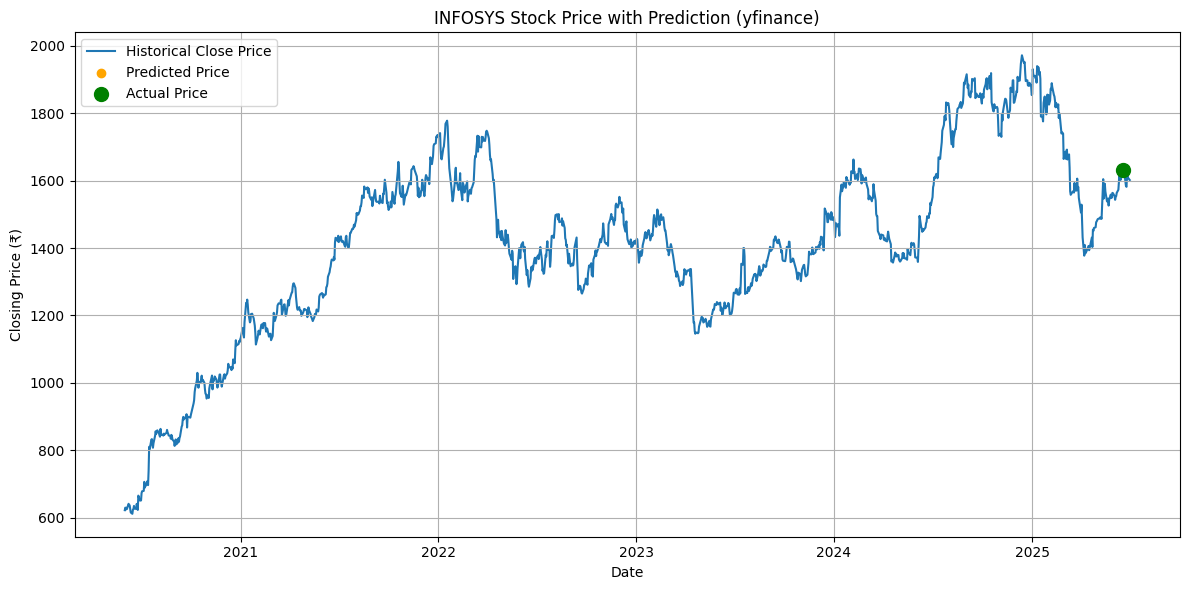


 Test Set Performance Metrics (LSTM):
 Mean Absolute Error (MAE) : ₹14.73
 Mean Squared Error (MSE)  : ₹342.64
 Root Squared Error (RMSE) : ₹18.51
 R² Score                  : 0.5981
 Mean Absolute Percentage Error (MAPE) : 0.92%
 Accuracy (100 - MAPE) : 99.08%
 MSE Percentage of Average Price: 21.47%
 MAE Percentage of Average Price: 0.92%


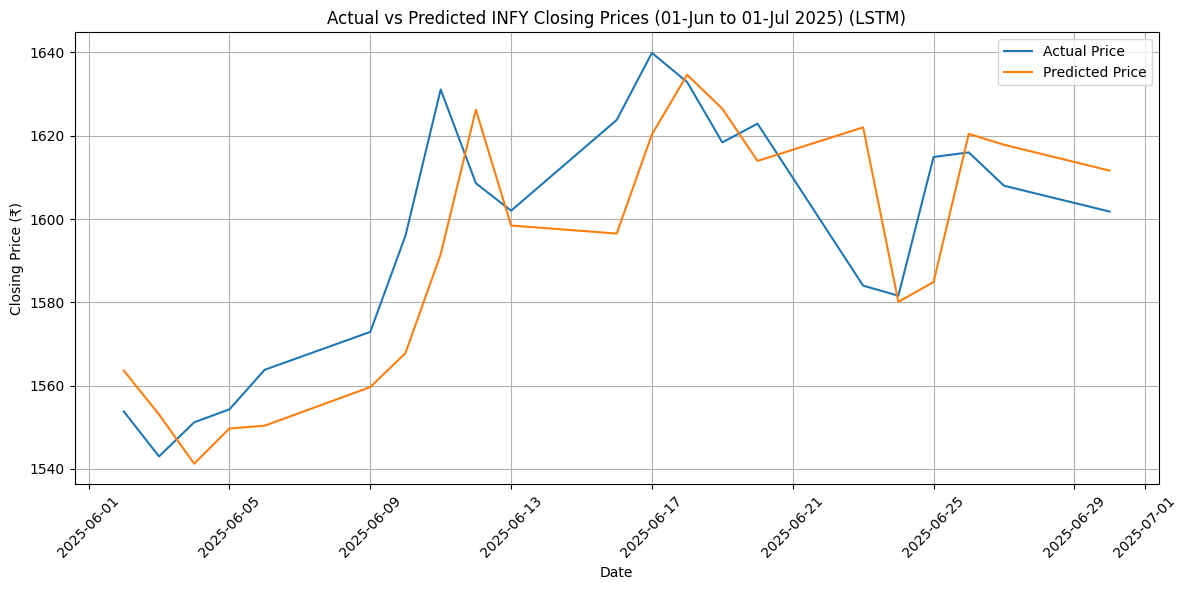

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import SimpleRNN, LSTM
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from matplotlib.dates import DateFormatter
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import numpy as np
import pandas as pd
import datetime
import holidays
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.filterwarnings('ignore')

# Set seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

SYMBOL = "INFY.NS"
SEQUENCE_LENGTH = 60

TRAIN_START_DATE = "2020-06-01"
TRAIN_END_DATE = "2025-05-31"

TEST_START_DATE = "2025-06-01"
TEST_END_DATE = "2025-07-01"

# Get Indian trading holidays
def get_nse_holidays():
    in_holidays = holidays.India(years=range(2020, 2026))
    return set(in_holidays.keys())

TRADING_HOLIDAYS = get_nse_holidays()

def is_valid_date(date_str):
    try:
        date = datetime.datetime.strptime(date_str, "%Y-%m-%d").date()
        if not (datetime.date(2025, 6, 1) <= date <= datetime.date(2025, 7, 1)):
            print("Date must be between 2025-06-01 and 2025-07-01.")
            return False
        if date.weekday() >= 5:
            print("Weekends are not trading days.")
            return False
        if date in TRADING_HOLIDAYS:
            print("Entered date is a trading holiday.")
            return False
        return True
    except ValueError:
        print("Invalid date format. Use YYYY-MM-DD.")
        return False

def get_stock_data():
    print("Fetching data from Yahoo Finance...")
    full_df = yf.download(SYMBOL, start=TRAIN_START_DATE, end=TEST_END_DATE)
    full_df = full_df[['Close']]
    full_df.dropna(inplace=True)
    full_df.index = pd.to_datetime(full_df.index)

    train_df = full_df.loc[TRAIN_START_DATE:TRAIN_END_DATE]
    test_df = full_df.loc[TEST_START_DATE:TEST_END_DATE]
    return train_df, test_df, full_df

# Prompt until valid date is entered
def get_user_date():
    while True:
        date_input = input("Enter a date (YYYY-MM-DD): ")
        if is_valid_date(date_input):
            return datetime.datetime.strptime(date_input, "%Y-%m-%d").date()

# Build the LSTM model
def build_model(input_shape, learning_rate=0.001): # Added learning_rate parameter
    model = Sequential()
    model.add(LSTM(units=50, activation='tanh', input_shape=input_shape))
    model.add(Dense(1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Reinforcement Learning Fine-Tuning
class RLAgent:
    """
    A simple RL Agent to fine-tune the RNN model.
    The "environment" is the time series data, and the "action" is the prediction.
    The reward is based on prediction accuracy.
    """
    def __init__(self, model, learning_rate=0.001):
        self.model = model
        self.optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    @tf.function
    def train_step(self, state, target):
        """
        Performs a single training step to fine-tune the model weights.
        """
        with tf.GradientTape() as tape:
            prediction = self.model(state, training=True)
            # Use Mean Squared Error directly as the loss to minimize
            loss = tf.reduce_mean(tf.square(tf.cast(target, tf.float32) - prediction))

        grads = tape.gradient(loss, self.model.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.model.trainable_variables))
        return loss # Return the mean loss for the batch


def fine_tune_with_rl(model, X_train, y_train, epochs=5, learning_rate=0.001, batch_size=32):
    """
    Fine- tunes the pre-trained RNN model using a simple reinforcement learning loop with batched data.
    """
    print("\n--- Starting Reinforcement Learning Fine-Tuning (Batched) ---")
    agent = RLAgent(model, learning_rate=learning_rate)

    # Create a TensorFlow Dataset and batch it
    dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    dataset = dataset.batch(batch_size)

    num_batches = tf.data.experimental.cardinality(dataset).numpy()

    for epoch in range(epochs):
        total_loss = 0
        batch_count = 0
        for batch_x, batch_y in dataset:
            # Ensure batch_x has the correct shape (batch_size, sequence_length, 1)
            batch_x_reshaped = tf.reshape(batch_x, (tf.shape(batch_x)[0], tf.shape(batch_x)[1], 1))
            loss = agent.train_step(batch_x_reshaped, batch_y)
            total_loss += loss.numpy() # Sum up the mean loss for each batch
            batch_count += 1

        # Calculate average loss per epoch
        average_epoch_loss = total_loss / num_batches if num_batches > 0 else 0
        print(f"RL Epoch {epoch + 1}/{epochs}, Average Loss per Batch: {average_epoch_loss:.6f}") # Print average loss

    print("--- RL Fine-Tuning Complete ---")
    return model


def create_test_sequences(train_df, test_df, scaler):
    combined = pd.concat([train_df, test_df])
    scaled = scaler.transform(combined[['Close']])
    X_test = []
    test_dates = test_df.index.date

    for i in range(len(train_df), len(combined)):
        if i - SEQUENCE_LENGTH < 0:
            continue
        seq = scaled[i - SEQUENCE_LENGTH:i]
        X_test.append(seq)

    X_test = np.array(X_test)
    return X_test, test_dates

def predict_price_on_test(model, full_df, scaler, user_date):
    all_dates = full_df.index.date
    try:
        idx = list(all_dates).index(user_date)
    except ValueError:
        print("User date not found in data.")
        return None, None, user_date

    if idx < SEQUENCE_LENGTH:
        print("Not enough data to predict for this date.")
        return None, None, user_date

    input_seq = scaler.transform(full_df[['Close']].values)[idx - SEQUENCE_LENGTH:idx]
    input_seq = np.reshape(input_seq, (1, SEQUENCE_LENGTH, 1))

    predicted_scaled = model.predict(input_seq, verbose=0)
    predicted_price = scaler.inverse_transform(predicted_scaled)[0][0]

    actual_price = float(full_df.iloc[idx]['Close']) if idx < len(full_df) else None
    return predicted_price, actual_price, full_df.index[idx].date()

# Plot the result
def plot_results(df, predicted_date, predicted_price, actual_price):
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='Historical Close Price',zorder=1)
    #plt.axvline(pd.to_datetime(predicted_date), color='red', linestyle='--', label='Predicted Date')
    plt.scatter(pd.to_datetime(predicted_date), predicted_price, color='orange', label='Predicted Price',zorder=2)
    if actual_price is not None:
        plt.scatter(pd.to_datetime(predicted_date), actual_price, color='green', label='Actual Price',zorder=3, s=100)
    plt.title("INFOSYS Stock Price with Prediction (yfinance)")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (₹)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#Plotting error with no. of epochs
def plot_training_loss(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title("Training and Validation Loss Over Epochs (LSTM)") # Changed title
    plt.xlabel("Epoch no.")
    plt.ylabel("Loss (MSE)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def main():
    print("=== INFOSYS LSTM Stock Price Predictor (Test Phase June–July 2025) ===") # Changed title
    user_date = get_user_date()

    # Step 1: Get stock data
    train_df, test_df, full_df = get_stock_data()

    # Step 2: Preprocess
    scaler = MinMaxScaler()
    scaled_train = scaler.fit_transform(train_df[['Close']])
    X, y = [], []
    for i in range(SEQUENCE_LENGTH, len(scaled_train)):
        X.append(scaled_train[i - SEQUENCE_LENGTH:i])
        y.append(scaled_train[i])
    X = np.array(X)
    y = np.array(y)

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)
    #early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    # Step 3: Build and train model
    model = build_model((X_train.shape[1], 1), learning_rate=0.0005) # Reduced Adam learning rate
    print("Training LSTM model...") # Changed print statement
    history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_val, y_val), verbose = 1) #callbacks = [early_stop], verbose=1)

    #print(f"\nBest weights restored from epoch: {early_stop.best_epoch + 1}")

    # Step 4: Plot training loss
    plot_training_loss(history)

    # Step 5: Fine-tune with Reinforcement Learning
    rl_tuned_model = fine_tune_with_rl(model, X_train, y_train, epochs=150, learning_rate=0.0001, batch_size=32)

    # Predict on training data to evaluate performance
    y_train_pred_scaled = rl_tuned_model.predict(X_train, verbose=0)
    y_train_pred = scaler.inverse_transform(y_train_pred_scaled)
    y_true_train = scaler.inverse_transform(y_train.reshape(-1, 1))

    # Calculate and print training metrics
    mae_train = mean_absolute_error(y_true_train, y_train_pred)
    mse_train = mean_squared_error(y_true_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_true_train, y_train_pred)
    mape_train = mean_absolute_percentage_error(y_true_train, y_train_pred) * 100
    accuracy_train = 100 - mape_train
    mse_percent_train = (mse_train / np.mean(y_true_train)) * 100 if np.mean(y_true_train) != 0 else np.nan
    mae_percent_train = (mae_train / np.mean(y_true_train)) * 100 if np.mean(y_true_train) != 0 else np.nan
    print("\n Training Set Performance Metrics (LSTM):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_train:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_train:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_train:.2f}")
    print(f" R² Score                  : {r2_train:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_train:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_train:.2f}%")
    print(f" MSE Percentage of Average Price : {mse_percent_train:.2f}%")
    print(f" MAE Percentage of Average Price : {mae_percent_train:.2f}%")

    # Predict on validation set
    y_val_pred_scaled = rl_tuned_model.predict(X_val, verbose=0)
    y_val_pred = scaler.inverse_transform(y_val_pred_scaled)
    y_val_true = scaler.inverse_transform(y_val.reshape(-1, 1))

    # Calculate and print validation metrics
    mae_val = mean_absolute_error(y_val_true, y_val_pred)
    mse_val = mean_squared_error(y_val_true, y_val_pred)
    rmse_val = np.sqrt(mse_val)
    r2_val = r2_score(y_val_true, y_val_pred)
    mape_val = mean_absolute_percentage_error(y_val_true, y_val_pred) * 100
    accuracy_val = 100 - mape_val
    mse_percent_val = (mse_val / np.mean(y_val_true)) * 100 if np.mean(y_val_true) != 0 else np.nan
    mae_percent_val = (mae_val / np.mean(y_val_true)) * 100 if np.mean(y_val_true) != 0 else np.nan
    print("\n Validation Set Performance Metrics (LSTM):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_val:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_val:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_val:.2f}")
    print(f" R² Score                  : {r2_val:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_val:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_val:.2f}%")
    print(f" MSE Percentage of Average Price: {mse_percent_val:.2f}%")
    print(f" MAE Percentage of Average Price: {mae_percent_val:.2f}%")


    # Step 6: Predict for user-input test date
    predicted_price, actual_price, predicted_date = predict_price_on_test(rl_tuned_model, full_df, scaler, user_date)
    if predicted_price is not None:
        print(f"\n Prediction for {predicted_date}:")
        print(f" Predicted Closing Price: ₹{predicted_price:.2f}")
        if actual_price is not None:
            print(f" Actual Closing Price   : ₹{actual_price}")
        else:
            print("Actual price not available.")

        plot_results(full_df, predicted_date, predicted_price, actual_price)
    else:
        print("❌ Unable to make prediction.")

    # === Step 7: Predict all test dates and compare ===

    # Reuse combined full_df
    combined_df = pd.concat([train_df, test_df])
    scaled_combined = scaler.transform(combined_df[['Close']])

    X_test_all = []
    test_date_indexes = []

    for i in range(len(train_df), len(combined_df)):
        if i - SEQUENCE_LENGTH < 0:
            continue
        seq = scaled_combined[i - SEQUENCE_LENGTH:i]
        X_test_all.append(seq)
        test_date_indexes.append(combined_df.index[i])

    X_test_all = np.array(X_test_all)

    # Predict on test sequences
    y_test_pred_scaled = rl_tuned_model.predict(X_test_all, verbose=0)
    y_test_pred = scaler.inverse_transform(y_test_pred_scaled)

    # Actual prices
    y_test_true = test_df.loc[test_date_indexes, 'Close'].values

    # Calculate and print test metrics
    mae_test = mean_absolute_error(y_test_true, y_test_pred)
    mse_test = mean_squared_error(y_test_true, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test_true, y_test_pred)
    mape_test = mean_absolute_percentage_error(y_test_true, y_test_pred) * 100
    accuracy_test = 100 - mape_test
    mse_percent_test = (mse_test / np.mean(y_test_true)) * 100 if np.mean(y_test_true) != 0 else np.nan
    mae_percent_test = (mae_test / np.mean(y_test_true)) * 100 if np.mean(y_test_true) != 0 else np.nan
    print("\n Test Set Performance Metrics (LSTM):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_test:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_test:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_test:.2f}")
    print(f" R² Score                  : {r2_test:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_test:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_test:.2f}%")
    print(f" MSE Percentage of Average Price: {mse_percent_test:.2f}%")
    print(f" MAE Percentage of Average Price: {mae_percent_test:.2f}%")

    # Plot actual vs predicted
    plt.figure(figsize=(12, 6))
    plt.plot(test_date_indexes, y_test_true, label='Actual Price')
    plt.plot(test_date_indexes, y_test_pred, label='Predicted Price')
    plt.title("Actual vs Predicted INFY Closing Prices (01-Jun to 01-Jul 2025) (LSTM)")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (₹)")
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

=== INFOSYS LSTM Stock Price Predictor (Test Phase June–July 2025) ===
Enter a date (YYYY-MM-DD): 2025-06-18


[*********************100%***********************]  1 of 1 completed

Fetching data from Yahoo Finance...
Training LSTM model...
Epoch 1/500


30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0949 - val_loss: 0.0024
Epoch 2/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0018 - val_loss: 0.0024
Epoch 3/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0013 - val_loss: 0.0028
Epoch 4/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0012 - val_loss: 0.0027
Epoch 5/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0011 - val_loss: 0.0024
Epoch 6/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0010 - val_loss: 0.0022
Epoch 7/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 9.6731e-04 - val_loss: 0.0020
Epoch 8/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 9.3313e-04 - val_loss: 0.0019
Epoch 9/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 9.0699e-04 - val_loss: 0.0018
Epoch 10/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 8.8552e-04 - val_loss: 0.0017
Epoch 11/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 8.6636e-04 - val_loss: 0.0017
Epoch 12/500
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 2

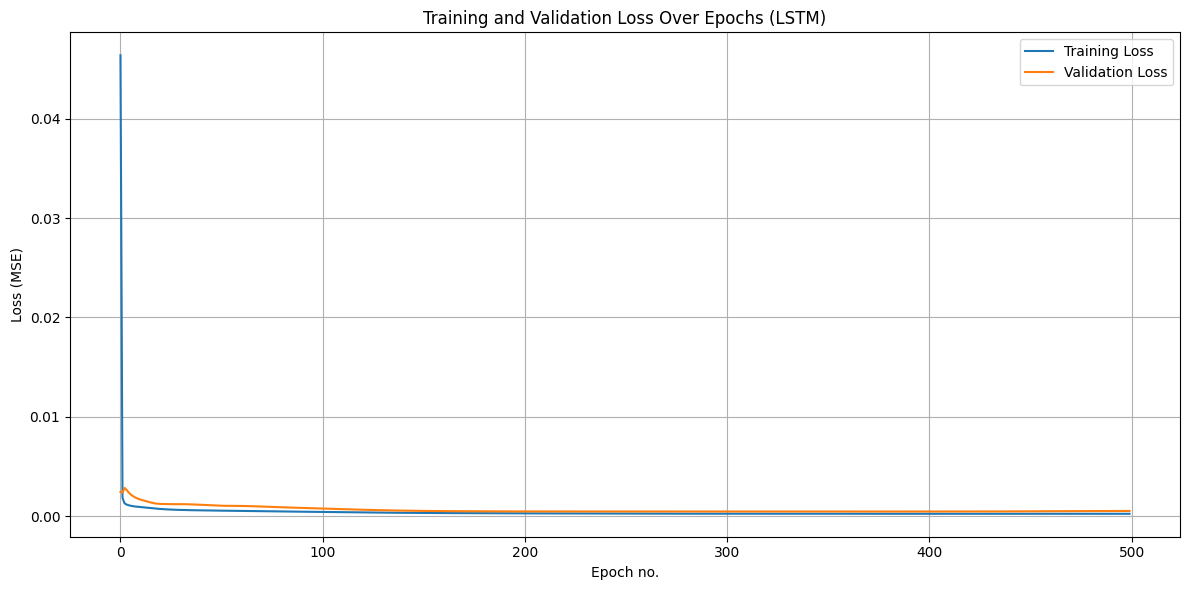


--- Starting Reinforcement Learning Fine-Tuning (Batched) ---
RL Epoch 1/200, Average Loss per Batch: 0.000235
RL Epoch 2/200, Average Loss per Batch: 0.000233
RL Epoch 3/200, Average Loss per Batch: 0.000230
RL Epoch 4/200, Average Loss per Batch: 0.000231
RL Epoch 5/200, Average Loss per Batch: 0.000231
RL Epoch 6/200, Average Loss per Batch: 0.000231
RL Epoch 7/200, Average Loss per Batch: 0.000231
RL Epoch 8/200, Average Loss per Batch: 0.000231
RL Epoch 9/200, Average Loss per Batch: 0.000231
RL Epoch 10/200, Average Loss per Batch: 0.000231
RL Epoch 11/200, Average Loss per Batch: 0.000231
RL Epoch 12/200, Average Loss per Batch: 0.000231
RL Epoch 13/200, Average Loss per Batch: 0.000231
RL Epoch 14/200, Average Loss per Batch: 0.000231
RL Epoch 15/200, Average Loss per Batch: 0.000231
RL Epoch 16/200, Average Loss per Batch: 0.000231
RL Epoch 17/200, Average Loss per Batch: 0.000231
RL Epoch 18/200, Average Loss per Batch: 0.000231
RL Epoch 19/200, Average Loss per Batch: 0.000

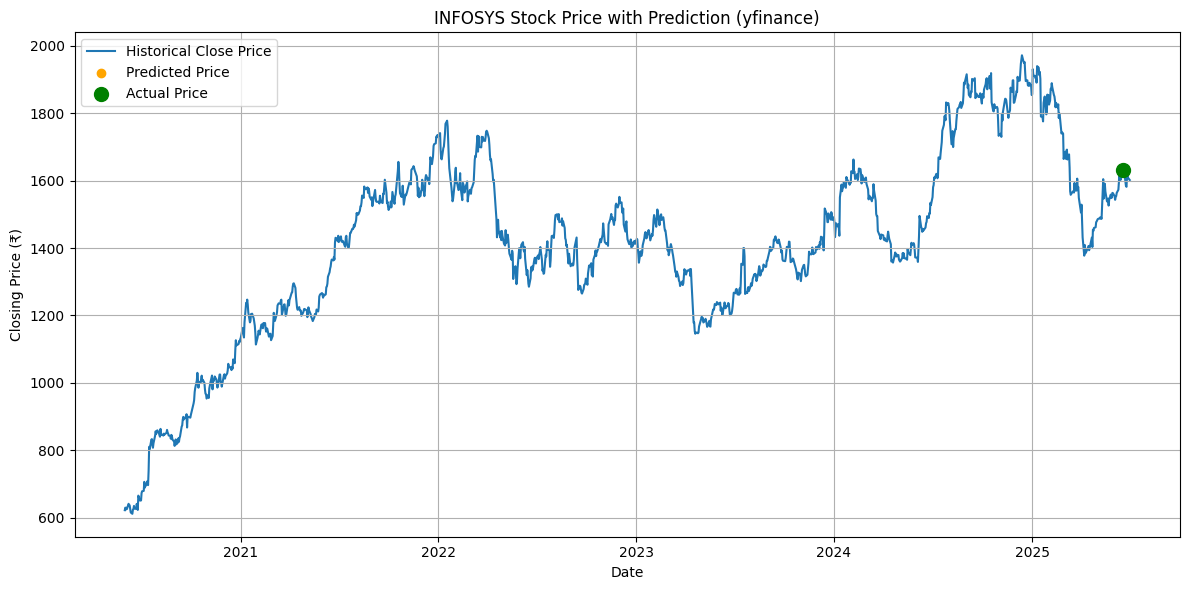


 Test Set Performance Metrics (LSTM):
 Mean Absolute Error (MAE) : ₹17.01
 Mean Squared Error (MSE)  : ₹486.50
 Root Squared Error (RMSE) : ₹22.06
 R² Score                  : 0.4294
 Mean Absolute Percentage Error (MAPE) : 1.06%
 Accuracy (100 - MAPE) : 98.94%
 MSE Percentage of Average Price: 30.48%
 MAE Percentage of Average Price: 1.07%


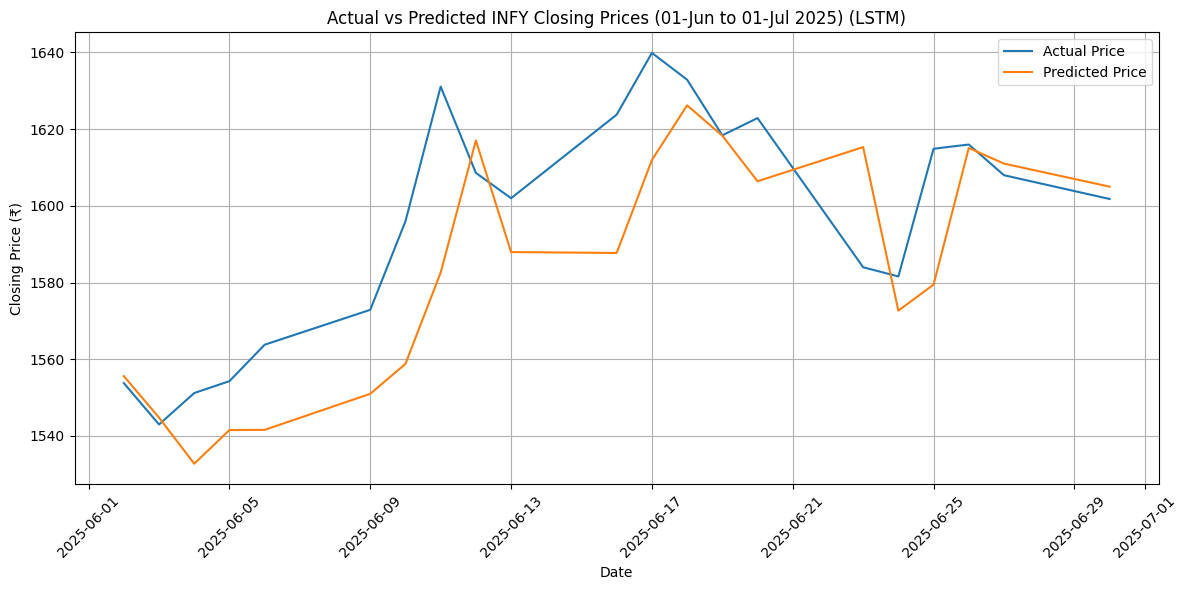

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import SimpleRNN, LSTM
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from matplotlib.dates import DateFormatter
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import numpy as np
import pandas as pd
import datetime
import holidays
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.filterwarnings('ignore')

# Set seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

SYMBOL = "INFY.NS"
SEQUENCE_LENGTH = 60

TRAIN_START_DATE = "2020-06-01"
TRAIN_END_DATE = "2025-05-31"

TEST_START_DATE = "2025-06-01"
TEST_END_DATE = "2025-07-01"

# Get Indian trading holidays
def get_nse_holidays():
    in_holidays = holidays.India(years=range(2020, 2026))
    return set(in_holidays.keys())

TRADING_HOLIDAYS = get_nse_holidays()

def is_valid_date(date_str):
    try:
        date = datetime.datetime.strptime(date_str, "%Y-%m-%d").date()
        if not (datetime.date(2025, 6, 1) <= date <= datetime.date(2025, 7, 1)):
            print("Date must be between 2025-06-01 and 2025-07-01.")
            return False
        if date.weekday() >= 5:
            print("Weekends are not trading days.")
            return False
        if date in TRADING_HOLIDAYS:
            print("Entered date is a trading holiday.")
            return False
        return True
    except ValueError:
        print("Invalid date format. Use YYYY-MM-DD.")
        return False

def get_stock_data():
    print("Fetching data from Yahoo Finance...")
    full_df = yf.download(SYMBOL, start=TRAIN_START_DATE, end=TEST_END_DATE)
    full_df = full_df[['Close']]
    full_df.dropna(inplace=True)
    full_df.index = pd.to_datetime(full_df.index)

    train_df = full_df.loc[TRAIN_START_DATE:TRAIN_END_DATE]
    test_df = full_df.loc[TEST_START_DATE:TEST_END_DATE]
    return train_df, test_df, full_df

# Prompt until valid date is entered
def get_user_date():
    while True:
        date_input = input("Enter a date (YYYY-MM-DD): ")
        if is_valid_date(date_input):
            return datetime.datetime.strptime(date_input, "%Y-%m-%d").date()

# Build the LSTM model
def build_model(input_shape, learning_rate=0.001): # Added learning_rate parameter
    model = Sequential()
    model.add(LSTM(units=50, activation='tanh', input_shape=input_shape))
    model.add(Dense(1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Reinforcement Learning Fine-Tuning
class RLAgent:
    """
    A simple RL Agent to fine-tune the RNN model.
    The "environment" is the time series data, and the "action" is the prediction.
    The reward is based on prediction accuracy.
    """
    def __init__(self, model, learning_rate=0.001):
        self.model = model
        self.optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    @tf.function
    def train_step(self, state, target):
        """
        Performs a single training step to fine-tune the model weights.
        """
        with tf.GradientTape() as tape:
            prediction = self.model(state, training=True)
            # Use Mean Squared Error directly as the loss to minimize
            loss = tf.reduce_mean(tf.square(tf.cast(target, tf.float32) - prediction))

        grads = tape.gradient(loss, self.model.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.model.trainable_variables))
        return loss # Return the mean loss for the batch


def fine_tune_with_rl(model, X_train, y_train, epochs=5, learning_rate=0.001, batch_size=32):
    """
    Fine- tunes the pre-trained RNN model using a simple reinforcement learning loop with batched data.
    """
    print("\n--- Starting Reinforcement Learning Fine-Tuning (Batched) ---")
    agent = RLAgent(model, learning_rate=learning_rate)

    # Create a TensorFlow Dataset and batch it
    dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    dataset = dataset.batch(batch_size)

    num_batches = tf.data.experimental.cardinality(dataset).numpy()

    for epoch in range(epochs):
        total_loss = 0
        batch_count = 0
        for batch_x, batch_y in dataset:
            # Ensure batch_x has the correct shape (batch_size, sequence_length, 1)
            batch_x_reshaped = tf.reshape(batch_x, (tf.shape(batch_x)[0], tf.shape(batch_x)[1], 1))
            loss = agent.train_step(batch_x_reshaped, batch_y)
            total_loss += loss.numpy() # Sum up the mean loss for each batch
            batch_count += 1

        # Calculate average loss per epoch
        average_epoch_loss = total_loss / num_batches if num_batches > 0 else 0
        print(f"RL Epoch {epoch + 1}/{epochs}, Average Loss per Batch: {average_epoch_loss:.6f}") # Print average loss

    print("--- RL Fine-Tuning Complete ---")
    return model


def create_test_sequences(train_df, test_df, scaler):
    combined = pd.concat([train_df, test_df])
    scaled = scaler.transform(combined[['Close']])
    X_test = []
    test_dates = test_df.index.date

    for i in range(len(train_df), len(combined)):
        if i - SEQUENCE_LENGTH < 0:
            continue
        seq = scaled[i - SEQUENCE_LENGTH:i]
        X_test.append(seq)

    X_test = np.array(X_test)
    return X_test, test_dates

def predict_price_on_test(model, full_df, scaler, user_date):
    all_dates = full_df.index.date
    try:
        idx = list(all_dates).index(user_date)
    except ValueError:
        print("User date not found in data.")
        return None, None, user_date

    if idx < SEQUENCE_LENGTH:
        print("Not enough data to predict for this date.")
        return None, None, user_date

    input_seq = scaler.transform(full_df[['Close']].values)[idx - SEQUENCE_LENGTH:idx]
    input_seq = np.reshape(input_seq, (1, SEQUENCE_LENGTH, 1))

    predicted_scaled = model.predict(input_seq, verbose=0)
    predicted_price = scaler.inverse_transform(predicted_scaled)[0][0]

    actual_price = float(full_df.iloc[idx]['Close']) if idx < len(full_df) else None
    return predicted_price, actual_price, full_df.index[idx].date()

# Plot the result
def plot_results(df, predicted_date, predicted_price, actual_price):
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='Historical Close Price',zorder=1)
    #plt.axvline(pd.to_datetime(predicted_date), color='red', linestyle='--', label='Predicted Date')
    plt.scatter(pd.to_datetime(predicted_date), predicted_price, color='orange', label='Predicted Price',zorder=2)
    if actual_price is not None:
        plt.scatter(pd.to_datetime(predicted_date), actual_price, color='green', label='Actual Price',zorder=3, s=100)
    plt.title("INFOSYS Stock Price with Prediction (yfinance)")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (₹)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#Plotting error with no. of epochs
def plot_training_loss(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title("Training and Validation Loss Over Epochs (LSTM)") # Changed title
    plt.xlabel("Epoch no.")
    plt.ylabel("Loss (MSE)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def main():
    print("=== INFOSYS LSTM Stock Price Predictor (Test Phase June–July 2025) ===") # Changed title
    user_date = get_user_date()

    # Step 1: Get stock data
    train_df, test_df, full_df = get_stock_data()

    # Step 2: Preprocess
    scaler = MinMaxScaler()
    scaled_train = scaler.fit_transform(train_df[['Close']])
    X, y = [], []
    for i in range(SEQUENCE_LENGTH, len(scaled_train)):
        X.append(scaled_train[i - SEQUENCE_LENGTH:i])
        y.append(scaled_train[i])
    X = np.array(X)
    y = np.array(y)

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)
    #early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    # Step 3: Build and train model
    model = build_model((X_train.shape[1], 1), learning_rate=0.0005) # Reduced Adam learning rate
    print("Training LSTM model...") # Changed print statement
    history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_val, y_val), verbose = 1) #callbacks = [early_stop], verbose=1)

    #print(f"\nBest weights restored from epoch: {early_stop.best_epoch + 1}")

    # Step 4: Plot training loss
    plot_training_loss(history)

    # Step 5: Fine-tune with Reinforcement Learning
    rl_tuned_model = fine_tune_with_rl(model, X_train, y_train, epochs=200, learning_rate=0.0001, batch_size=32)

    # Predict on training data to evaluate performance
    y_train_pred_scaled = rl_tuned_model.predict(X_train, verbose=0)
    y_train_pred = scaler.inverse_transform(y_train_pred_scaled)
    y_true_train = scaler.inverse_transform(y_train.reshape(-1, 1))

    # Calculate and print training metrics
    mae_train = mean_absolute_error(y_true_train, y_train_pred)
    mse_train = mean_squared_error(y_true_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_true_train, y_train_pred)
    mape_train = mean_absolute_percentage_error(y_true_train, y_train_pred) * 100
    accuracy_train = 100 - mape_train
    mse_percent_train = (mse_train / np.mean(y_true_train)) * 100 if np.mean(y_true_train) != 0 else np.nan
    mae_percent_train = (mae_train / np.mean(y_true_train)) * 100 if np.mean(y_true_train) != 0 else np.nan
    print("\n Training Set Performance Metrics (LSTM):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_train:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_train:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_train:.2f}")
    print(f" R² Score                  : {r2_train:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_train:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_train:.2f}%")
    print(f" MSE Percentage of Average Price : {mse_percent_train:.2f}%")
    print(f" MAE Percentage of Average Price : {mae_percent_train:.2f}%")

    # Predict on validation set
    y_val_pred_scaled = rl_tuned_model.predict(X_val, verbose=0)
    y_val_pred = scaler.inverse_transform(y_val_pred_scaled)
    y_val_true = scaler.inverse_transform(y_val.reshape(-1, 1))

    # Calculate and print validation metrics
    mae_val = mean_absolute_error(y_val_true, y_val_pred)
    mse_val = mean_squared_error(y_val_true, y_val_pred)
    rmse_val = np.sqrt(mse_val)
    r2_val = r2_score(y_val_true, y_val_pred)
    mape_val = mean_absolute_percentage_error(y_val_true, y_val_pred) * 100
    accuracy_val = 100 - mape_val
    mse_percent_val = (mse_val / np.mean(y_val_true)) * 100 if np.mean(y_val_true) != 0 else np.nan
    mae_percent_val = (mae_val / np.mean(y_val_true)) * 100 if np.mean(y_val_true) != 0 else np.nan
    print("\n Validation Set Performance Metrics (LSTM):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_val:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_val:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_val:.2f}")
    print(f" R² Score                  : {r2_val:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_val:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_val:.2f}%")
    print(f" MSE Percentage of Average Price: {mse_percent_val:.2f}%")
    print(f" MAE Percentage of Average Price: {mae_percent_val:.2f}%")


    # Step 6: Predict for user-input test date
    predicted_price, actual_price, predicted_date = predict_price_on_test(rl_tuned_model, full_df, scaler, user_date)
    if predicted_price is not None:
        print(f"\n Prediction for {predicted_date}:")
        print(f" Predicted Closing Price: ₹{predicted_price:.2f}")
        if actual_price is not None:
            print(f" Actual Closing Price   : ₹{actual_price}")
        else:
            print("Actual price not available.")

        plot_results(full_df, predicted_date, predicted_price, actual_price)
    else:
        print("❌ Unable to make prediction.")

    # === Step 7: Predict all test dates and compare ===

    # Reuse combined full_df
    combined_df = pd.concat([train_df, test_df])
    scaled_combined = scaler.transform(combined_df[['Close']])

    X_test_all = []
    test_date_indexes = []

    for i in range(len(train_df), len(combined_df)):
        if i - SEQUENCE_LENGTH < 0:
            continue
        seq = scaled_combined[i - SEQUENCE_LENGTH:i]
        X_test_all.append(seq)
        test_date_indexes.append(combined_df.index[i])

    X_test_all = np.array(X_test_all)

    # Predict on test sequences
    y_test_pred_scaled = rl_tuned_model.predict(X_test_all, verbose=0)
    y_test_pred = scaler.inverse_transform(y_test_pred_scaled)

    # Actual prices
    y_test_true = test_df.loc[test_date_indexes, 'Close'].values

    # Calculate and print test metrics
    mae_test = mean_absolute_error(y_test_true, y_test_pred)
    mse_test = mean_squared_error(y_test_true, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test_true, y_test_pred)
    mape_test = mean_absolute_percentage_error(y_test_true, y_test_pred) * 100
    accuracy_test = 100 - mape_test
    mse_percent_test = (mse_test / np.mean(y_test_true)) * 100 if np.mean(y_test_true) != 0 else np.nan
    mae_percent_test = (mae_test / np.mean(y_test_true)) * 100 if np.mean(y_test_true) != 0 else np.nan
    print("\n Test Set Performance Metrics (LSTM):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_test:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_test:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_test:.2f}")
    print(f" R² Score                  : {r2_test:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_test:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_test:.2f}%")
    print(f" MSE Percentage of Average Price: {mse_percent_test:.2f}%")
    print(f" MAE Percentage of Average Price: {mae_percent_test:.2f}%")

    # Plot actual vs predicted
    plt.figure(figsize=(12, 6))
    plt.plot(test_date_indexes, y_test_true, label='Actual Price')
    plt.plot(test_date_indexes, y_test_pred, label='Predicted Price')
    plt.title("Actual vs Predicted INFY Closing Prices (01-Jun to 01-Jul 2025) (LSTM)")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (₹)")
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

# **1000 epochs**

=== INFOSYS LSTM Stock Price Predictor (Test Phase June–July 2025) ===
Enter a date (YYYY-MM-DD): 2025-06-18


[*********************100%***********************]  1 of 1 completed

Fetching data from Yahoo Finance...
Training LSTM model...
Epoch 1/1000


15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 210ms/step - loss: 0.2872 - val_loss: 0.2056
Epoch 2/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - loss: 0.0426 - val_loss: 0.0044
Epoch 3/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0100 - val_loss: 0.0159
Epoch 4/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0031 - val_loss: 0.0120
Epoch 5/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0023 - val_loss: 0.0070
Epoch 6/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0022 - val_loss: 0.0091
Epoch 7/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0020 - val_loss: 0.0069
Epoch 8/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0019 - val_loss: 0.0067
Epoch 9/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0017 - val_loss: 0.0058
Epoch 10/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0016 - val_loss: 0.0053
Epoch 11/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0015 - val_loss: 0.0047
Epoch 12/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step

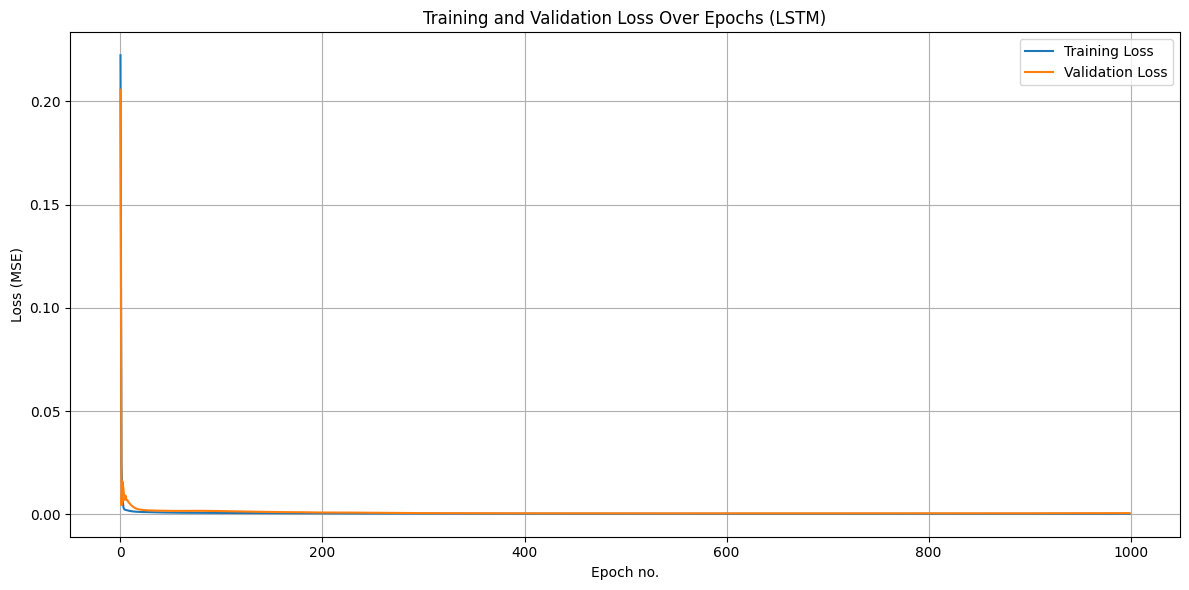


--- Starting Reinforcement Learning Fine-Tuning (Batched) ---
RL Epoch 1/150, Average Loss per Batch: 0.000234
RL Epoch 2/150, Average Loss per Batch: 0.000251
RL Epoch 3/150, Average Loss per Batch: 0.000237
RL Epoch 4/150, Average Loss per Batch: 0.000233
RL Epoch 5/150, Average Loss per Batch: 0.000240
RL Epoch 6/150, Average Loss per Batch: 0.000233
RL Epoch 7/150, Average Loss per Batch: 0.000232
RL Epoch 8/150, Average Loss per Batch: 0.000237
RL Epoch 9/150, Average Loss per Batch: 0.000233
RL Epoch 10/150, Average Loss per Batch: 0.000232
RL Epoch 11/150, Average Loss per Batch: 0.000235
RL Epoch 12/150, Average Loss per Batch: 0.000234
RL Epoch 13/150, Average Loss per Batch: 0.000233
RL Epoch 14/150, Average Loss per Batch: 0.000234
RL Epoch 15/150, Average Loss per Batch: 0.000234
RL Epoch 16/150, Average Loss per Batch: 0.000234
RL Epoch 17/150, Average Loss per Batch: 0.000234
RL Epoch 18/150, Average Loss per Batch: 0.000234
RL Epoch 19/150, Average Loss per Batch: 0.000

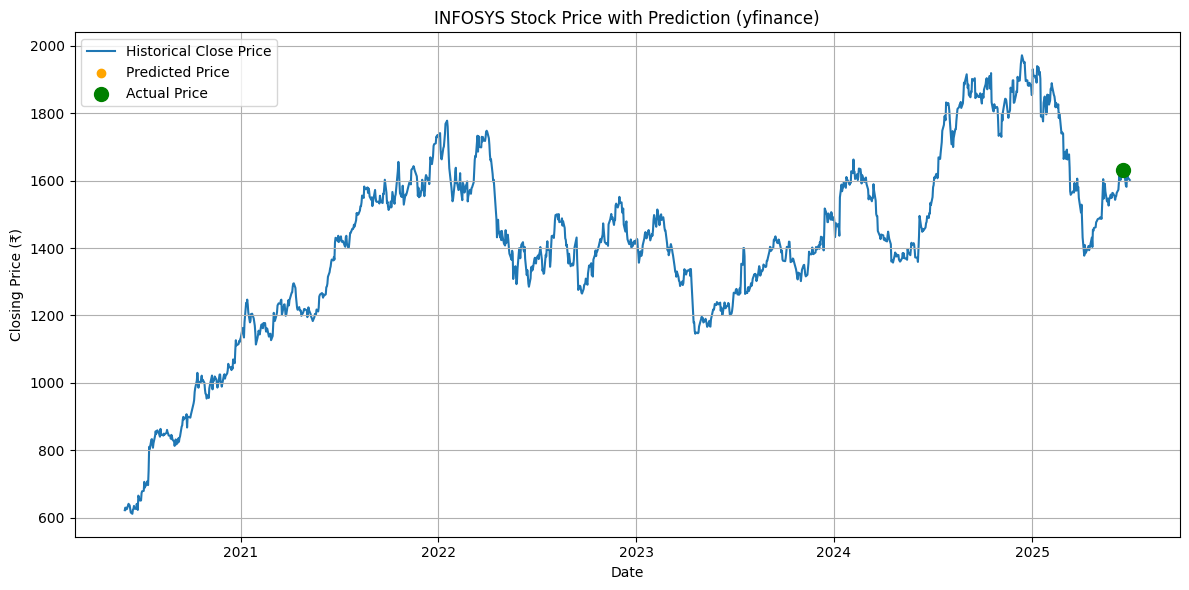


 Test Set Performance Metrics (LSTM):
 Mean Absolute Error (MAE) : ₹14.05
 Mean Squared Error (MSE)  : ₹316.40
 Root Squared Error (RMSE) : ₹17.79
 R² Score                  : 0.6289
 Mean Absolute Percentage Error (MAPE) : 0.88%
 Accuracy (100 - MAPE) : 99.12%
 MSE Percentage of Average Price: 19.82%
 MAE Percentage of Average Price: 0.88%


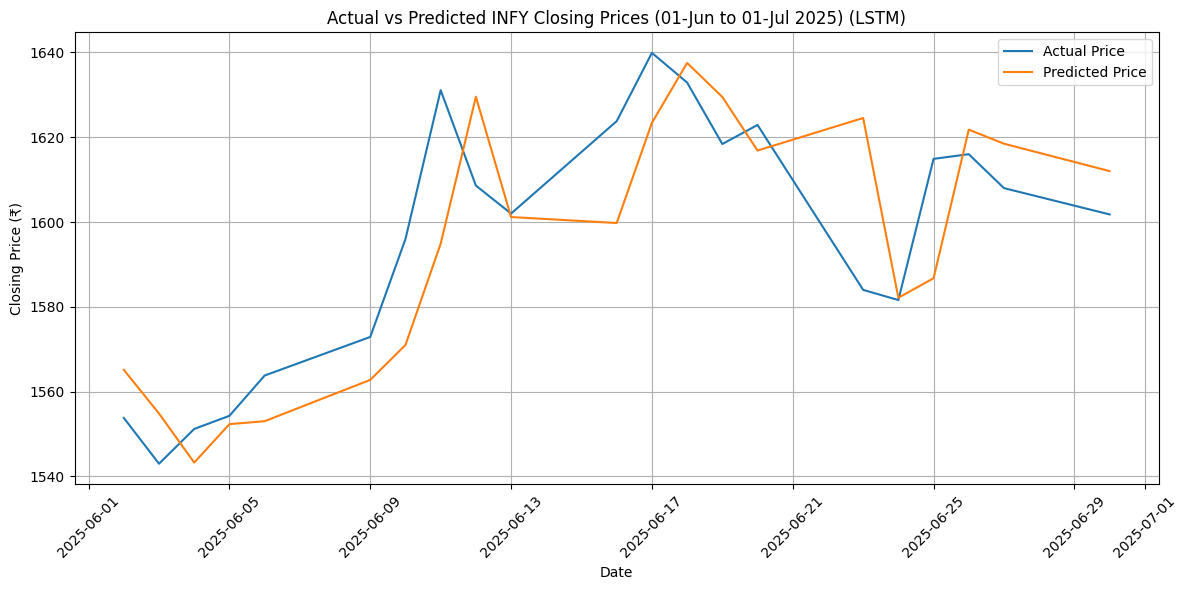

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import SimpleRNN, LSTM
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from matplotlib.dates import DateFormatter
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import numpy as np
import pandas as pd
import datetime
import holidays
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.filterwarnings('ignore')

# Set seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

SYMBOL = "INFY.NS"
SEQUENCE_LENGTH = 60

TRAIN_START_DATE = "2020-06-01"
TRAIN_END_DATE = "2025-05-31"

TEST_START_DATE = "2025-06-01"
TEST_END_DATE = "2025-07-01"

# Get Indian trading holidays
def get_nse_holidays():
    in_holidays = holidays.India(years=range(2020, 2026))
    return set(in_holidays.keys())

TRADING_HOLIDAYS = get_nse_holidays()

def is_valid_date(date_str):
    try:
        date = datetime.datetime.strptime(date_str, "%Y-%m-%d").date()
        if not (datetime.date(2025, 6, 1) <= date <= datetime.date(2025, 7, 1)):
            print("Date must be between 2025-06-01 and 2025-07-01.")
            return False
        if date.weekday() >= 5:
            print("Weekends are not trading days.")
            return False
        if date in TRADING_HOLIDAYS:
            print("Entered date is a trading holiday.")
            return False
        return True
    except ValueError:
        print("Invalid date format. Use YYYY-MM-DD.")
        return False

def get_stock_data():
    print("Fetching data from Yahoo Finance...")
    full_df = yf.download(SYMBOL, start=TRAIN_START_DATE, end=TEST_END_DATE)
    full_df = full_df[['Close']]
    full_df.dropna(inplace=True)
    full_df.index = pd.to_datetime(full_df.index)

    train_df = full_df.loc[TRAIN_START_DATE:TRAIN_END_DATE]
    test_df = full_df.loc[TEST_START_DATE:TEST_END_DATE]
    return train_df, test_df, full_df

# Prompt until valid date is entered
def get_user_date():
    while True:
        date_input = input("Enter a date (YYYY-MM-DD): ")
        if is_valid_date(date_input):
            return datetime.datetime.strptime(date_input, "%Y-%m-%d").date()

# Build the LSTM model
def build_model(input_shape, learning_rate=0.001): # Added learning_rate parameter
    model = Sequential()
    model.add(LSTM(units=50, activation='tanh', input_shape=input_shape))
    model.add(Dense(1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Reinforcement Learning Fine-Tuning
class RLAgent:
    """
    A simple RL Agent to fine-tune the RNN model.
    The "environment" is the time series data, and the "action" is the prediction.
    The reward is based on prediction accuracy.
    """
    def __init__(self, model, learning_rate=0.001):
        self.model = model
        self.optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    @tf.function
    def train_step(self, state, target):
        """
        Performs a single training step to fine-tune the model weights.
        """
        with tf.GradientTape() as tape:
            prediction = self.model(state, training=True)
            # Use Mean Squared Error directly as the loss to minimize
            loss = tf.reduce_mean(tf.square(tf.cast(target, tf.float32) - prediction))

        grads = tape.gradient(loss, self.model.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.model.trainable_variables))
        return loss # Return the mean loss for the batch


def fine_tune_with_rl(model, X_train, y_train, epochs=5, learning_rate=0.001, batch_size=32):
    """
    Fine- tunes the pre-trained RNN model using a simple reinforcement learning loop with batched data.
    """
    print("\n--- Starting Reinforcement Learning Fine-Tuning (Batched) ---")
    agent = RLAgent(model, learning_rate=learning_rate)

    # Create a TensorFlow Dataset and batch it
    dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    dataset = dataset.batch(batch_size)

    num_batches = tf.data.experimental.cardinality(dataset).numpy()

    for epoch in range(epochs):
        total_loss = 0
        batch_count = 0
        for batch_x, batch_y in dataset:
            # Ensure batch_x has the correct shape (batch_size, sequence_length, 1)
            batch_x_reshaped = tf.reshape(batch_x, (tf.shape(batch_x)[0], tf.shape(batch_x)[1], 1))
            loss = agent.train_step(batch_x_reshaped, batch_y)
            total_loss += loss.numpy() # Sum up the mean loss for each batch
            batch_count += 1

        # Calculate average loss per epoch
        average_epoch_loss = total_loss / num_batches if num_batches > 0 else 0
        print(f"RL Epoch {epoch + 1}/{epochs}, Average Loss per Batch: {average_epoch_loss:.6f}") # Print average loss

    print("--- RL Fine-Tuning Complete ---")
    return model


def create_test_sequences(train_df, test_df, scaler):
    combined = pd.concat([train_df, test_df])
    scaled = scaler.transform(combined[['Close']])
    X_test = []
    test_dates = test_df.index.date

    for i in range(len(train_df), len(combined)):
        if i - SEQUENCE_LENGTH < 0:
            continue
        seq = scaled[i - SEQUENCE_LENGTH:i]
        X_test.append(seq)

    X_test = np.array(X_test)
    return X_test, test_dates

def predict_price_on_test(model, full_df, scaler, user_date):
    all_dates = full_df.index.date
    try:
        idx = list(all_dates).index(user_date)
    except ValueError:
        print("User date not found in data.")
        return None, None, user_date

    if idx < SEQUENCE_LENGTH:
        print("Not enough data to predict for this date.")
        return None, None, user_date

    input_seq = scaler.transform(full_df[['Close']].values)[idx - SEQUENCE_LENGTH:idx]
    input_seq = np.reshape(input_seq, (1, SEQUENCE_LENGTH, 1))

    predicted_scaled = model.predict(input_seq, verbose=0)
    predicted_price = scaler.inverse_transform(predicted_scaled)[0][0]

    actual_price = float(full_df.iloc[idx]['Close']) if idx < len(full_df) else None
    return predicted_price, actual_price, full_df.index[idx].date()

# Plot the result
def plot_results(df, predicted_date, predicted_price, actual_price):
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='Historical Close Price',zorder=1)
    #plt.axvline(pd.to_datetime(predicted_date), color='red', linestyle='--', label='Predicted Date')
    plt.scatter(pd.to_datetime(predicted_date), predicted_price, color='orange', label='Predicted Price',zorder=2)
    if actual_price is not None:
        plt.scatter(pd.to_datetime(predicted_date), actual_price, color='green', label='Actual Price',zorder=3, s=100)
    plt.title("INFOSYS Stock Price with Prediction (yfinance)")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (₹)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#Plotting error with no. of epochs
def plot_training_loss(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title("Training and Validation Loss Over Epochs (LSTM)") # Changed title
    plt.xlabel("Epoch no.")
    plt.ylabel("Loss (MSE)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def main():
    print("=== INFOSYS LSTM Stock Price Predictor (Test Phase June–July 2025) ===") # Changed title
    user_date = get_user_date()

    # Step 1: Get stock data
    train_df, test_df, full_df = get_stock_data()

    # Step 2: Preprocess
    scaler = MinMaxScaler()
    scaled_train = scaler.fit_transform(train_df[['Close']])
    X, y = [], []
    for i in range(SEQUENCE_LENGTH, len(scaled_train)):
        X.append(scaled_train[i - SEQUENCE_LENGTH:i])
        y.append(scaled_train[i])
    X = np.array(X)
    y = np.array(y)

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)
    #early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    # Step 3: Build and train model
    model = build_model((X_train.shape[1], 1), learning_rate=0.0005) # Reduced Adam learning rate
    print("Training LSTM model...") # Changed print statement
    history = model.fit(X_train, y_train, epochs=1000, batch_size=64, validation_data=(X_val, y_val), verbose = 1) #callbacks = [early_stop], verbose=1)

    #print(f"\nBest weights restored from epoch: {early_stop.best_epoch + 1}")

    # Step 4: Plot training loss
    plot_training_loss(history)

    # Step 5: Fine-tune with Reinforcement Learning
    rl_tuned_model = fine_tune_with_rl(model, X_train, y_train, epochs=150, learning_rate=0.0001, batch_size=32)

    # Predict on training data to evaluate performance
    y_train_pred_scaled = rl_tuned_model.predict(X_train, verbose=0)
    y_train_pred = scaler.inverse_transform(y_train_pred_scaled)
    y_true_train = scaler.inverse_transform(y_train.reshape(-1, 1))

    # Calculate and print training metrics
    mae_train = mean_absolute_error(y_true_train, y_train_pred)
    mse_train = mean_squared_error(y_true_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_true_train, y_train_pred)
    mape_train = mean_absolute_percentage_error(y_true_train, y_train_pred) * 100
    accuracy_train = 100 - mape_train
    mse_percent_train = (mse_train / np.mean(y_true_train)) * 100 if np.mean(y_true_train) != 0 else np.nan
    mae_percent_train = (mae_train / np.mean(y_true_train)) * 100 if np.mean(y_true_train) != 0 else np.nan
    print("\n Training Set Performance Metrics (LSTM):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_train:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_train:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_train:.2f}")
    print(f" R² Score                  : {r2_train:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_train:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_train:.2f}%")
    print(f" MSE Percentage of Average Price : {mse_percent_train:.2f}%")
    print(f" MAE Percentage of Average Price : {mae_percent_train:.2f}%")

    # Predict on validation set
    y_val_pred_scaled = rl_tuned_model.predict(X_val, verbose=0)
    y_val_pred = scaler.inverse_transform(y_val_pred_scaled)
    y_val_true = scaler.inverse_transform(y_val.reshape(-1, 1))

    # Calculate and print validation metrics
    mae_val = mean_absolute_error(y_val_true, y_val_pred)
    mse_val = mean_squared_error(y_val_true, y_val_pred)
    rmse_val = np.sqrt(mse_val)
    r2_val = r2_score(y_val_true, y_val_pred)
    mape_val = mean_absolute_percentage_error(y_val_true, y_val_pred) * 100
    accuracy_val = 100 - mape_val
    mse_percent_val = (mse_val / np.mean(y_val_true)) * 100 if np.mean(y_val_true) != 0 else np.nan
    mae_percent_val = (mae_val / np.mean(y_val_true)) * 100 if np.mean(y_val_true) != 0 else np.nan
    print("\n Validation Set Performance Metrics (LSTM):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_val:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_val:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_val:.2f}")
    print(f" R² Score                  : {r2_val:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_val:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_val:.2f}%")
    print(f" MSE Percentage of Average Price: {mse_percent_val:.2f}%")
    print(f" MAE Percentage of Average Price: {mae_percent_val:.2f}%")


    # Step 6: Predict for user-input test date
    predicted_price, actual_price, predicted_date = predict_price_on_test(rl_tuned_model, full_df, scaler, user_date)
    if predicted_price is not None:
        print(f"\n Prediction for {predicted_date}:")
        print(f" Predicted Closing Price: ₹{predicted_price:.2f}")
        if actual_price is not None:
            print(f" Actual Closing Price   : ₹{actual_price}")
        else:
            print("Actual price not available.")

        plot_results(full_df, predicted_date, predicted_price, actual_price)
    else:
        print("❌ Unable to make prediction.")

    # === Step 7: Predict all test dates and compare ===

    # Reuse combined full_df
    combined_df = pd.concat([train_df, test_df])
    scaled_combined = scaler.transform(combined_df[['Close']])

    X_test_all = []
    test_date_indexes = []

    for i in range(len(train_df), len(combined_df)):
        if i - SEQUENCE_LENGTH < 0:
            continue
        seq = scaled_combined[i - SEQUENCE_LENGTH:i]
        X_test_all.append(seq)
        test_date_indexes.append(combined_df.index[i])

    X_test_all = np.array(X_test_all)

    # Predict on test sequences
    y_test_pred_scaled = rl_tuned_model.predict(X_test_all, verbose=0)
    y_test_pred = scaler.inverse_transform(y_test_pred_scaled)

    # Actual prices
    y_test_true = test_df.loc[test_date_indexes, 'Close'].values

    # Calculate and print test metrics
    mae_test = mean_absolute_error(y_test_true, y_test_pred)
    mse_test = mean_squared_error(y_test_true, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test_true, y_test_pred)
    mape_test = mean_absolute_percentage_error(y_test_true, y_test_pred) * 100
    accuracy_test = 100 - mape_test
    mse_percent_test = (mse_test / np.mean(y_test_true)) * 100 if np.mean(y_test_true) != 0 else np.nan
    mae_percent_test = (mae_test / np.mean(y_test_true)) * 100 if np.mean(y_test_true) != 0 else np.nan
    print("\n Test Set Performance Metrics (LSTM):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_test:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_test:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_test:.2f}")
    print(f" R² Score                  : {r2_test:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_test:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_test:.2f}%")
    print(f" MSE Percentage of Average Price: {mse_percent_test:.2f}%")
    print(f" MAE Percentage of Average Price: {mae_percent_test:.2f}%")

    # Plot actual vs predicted
    plt.figure(figsize=(12, 6))
    plt.plot(test_date_indexes, y_test_true, label='Actual Price')
    plt.plot(test_date_indexes, y_test_pred, label='Predicted Price')
    plt.title("Actual vs Predicted INFY Closing Prices (01-Jun to 01-Jul 2025) (LSTM)")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (₹)")
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

=== INFOSYS LSTM Stock Price Predictor (Test Phase June–July 2025) ===
Enter a date (YYYY-MM-DD): 2025-06-18


[*********************100%***********************]  1 of 1 completed

Fetching data from Yahoo Finance...
Training LSTM model...


Epoch 1/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 0.4136 - val_loss: 0.3776
Epoch 2/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0992 - val_loss: 0.0145
Epoch 3/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0148 - val_loss: 0.0215
Epoch 4/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0046 - val_loss: 0.0060
Epoch 5/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0027 - val_loss: 0.0075
Epoch 6/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0023 - val_loss: 0.0066
Epoch 7/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0022 - val_loss: 0.0062
Epoch 8/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0021 - val_loss: 0.0057
Epoch 9/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0021 - val_loss: 0.0054
Epoch 10/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0020 - val_loss: 0.0050
Epoch 11/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0020 - val_loss: 0.0047
Epoch 12/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 

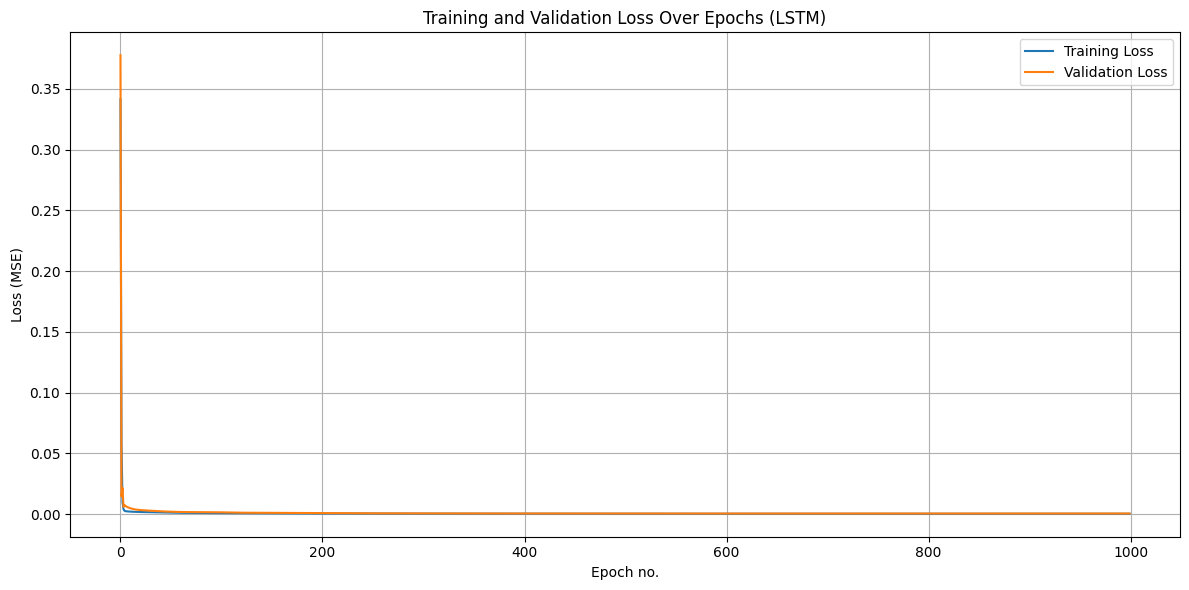


--- Starting Reinforcement Learning Fine-Tuning (Batched) ---
RL Epoch 1/200, Average Loss per Batch: 0.000236
RL Epoch 2/200, Average Loss per Batch: 0.000258
RL Epoch 3/200, Average Loss per Batch: 0.000246
RL Epoch 4/200, Average Loss per Batch: 0.000235
RL Epoch 5/200, Average Loss per Batch: 0.000236
RL Epoch 6/200, Average Loss per Batch: 0.000242
RL Epoch 7/200, Average Loss per Batch: 0.000236
RL Epoch 8/200, Average Loss per Batch: 0.000237
RL Epoch 9/200, Average Loss per Batch: 0.000238
RL Epoch 10/200, Average Loss per Batch: 0.000239
RL Epoch 11/200, Average Loss per Batch: 0.000239
RL Epoch 12/200, Average Loss per Batch: 0.000239
RL Epoch 13/200, Average Loss per Batch: 0.000239
RL Epoch 14/200, Average Loss per Batch: 0.000239
RL Epoch 15/200, Average Loss per Batch: 0.000239
RL Epoch 16/200, Average Loss per Batch: 0.000239
RL Epoch 17/200, Average Loss per Batch: 0.000239
RL Epoch 18/200, Average Loss per Batch: 0.000239
RL Epoch 19/200, Average Loss per Batch: 0.000

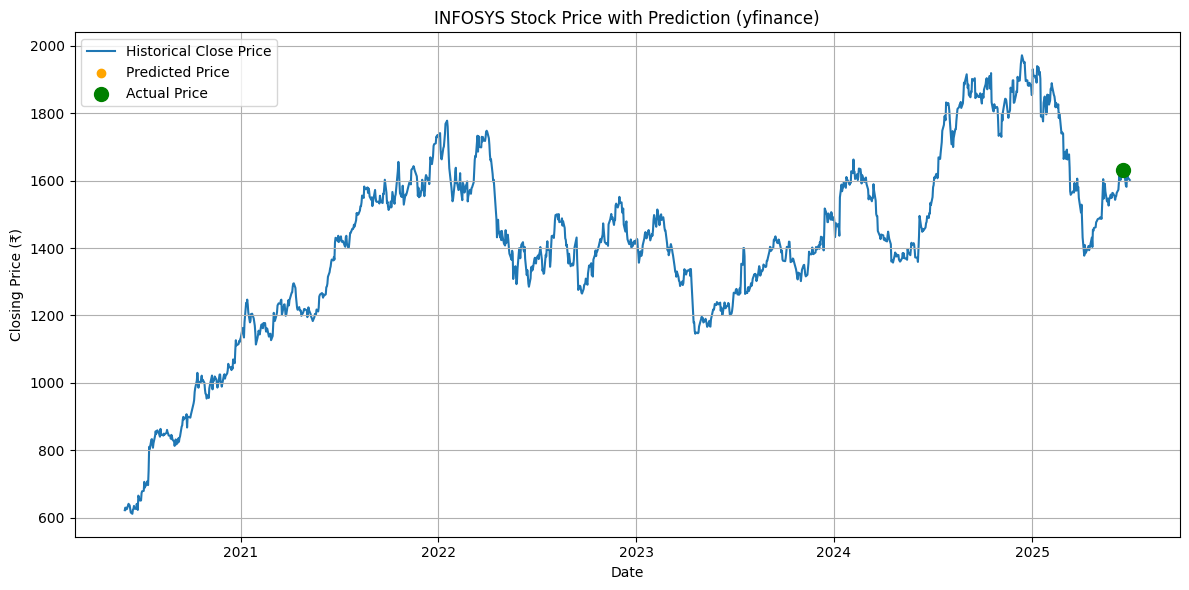


 Test Set Performance Metrics (LSTM):
 Mean Absolute Error (MAE) : ₹14.56
 Mean Squared Error (MSE)  : ₹333.48
 Root Squared Error (RMSE) : ₹18.26
 R² Score                  : 0.6089
 Mean Absolute Percentage Error (MAPE) : 0.91%
 Accuracy (100 - MAPE) : 99.09%
 MSE Percentage of Average Price: 20.89%
 MAE Percentage of Average Price: 0.91%


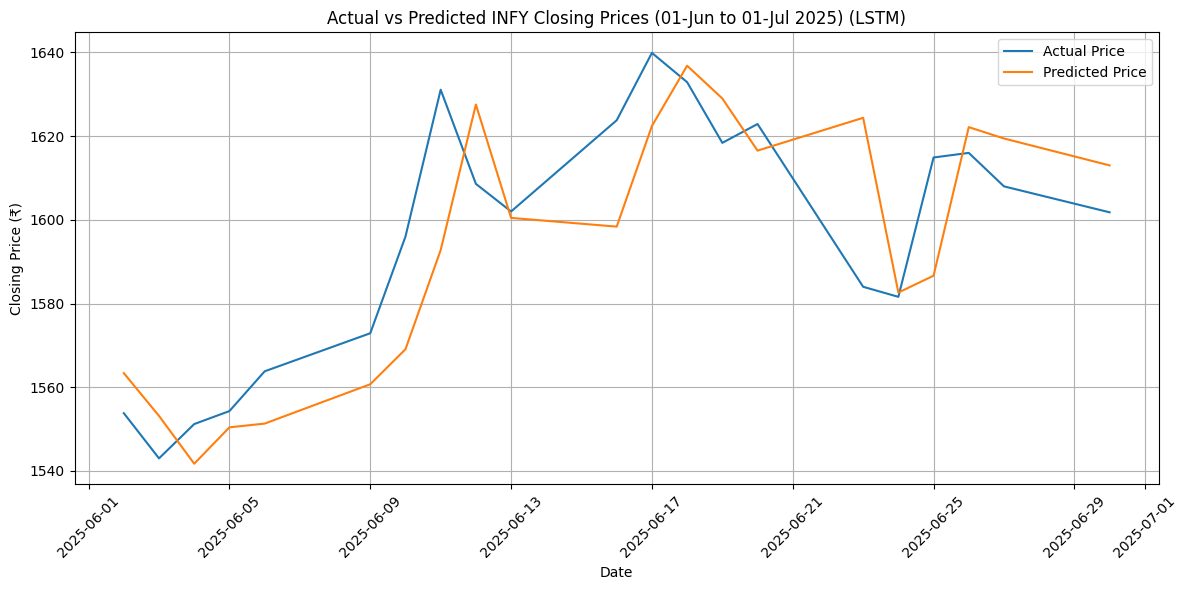

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import SimpleRNN, LSTM
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from matplotlib.dates import DateFormatter
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import numpy as np
import pandas as pd
import datetime
import holidays
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.filterwarnings('ignore')

# Set seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

SYMBOL = "INFY.NS"
SEQUENCE_LENGTH = 60

TRAIN_START_DATE = "2020-06-01"
TRAIN_END_DATE = "2025-05-31"

TEST_START_DATE = "2025-06-01"
TEST_END_DATE = "2025-07-01"

# Get Indian trading holidays
def get_nse_holidays():
    in_holidays = holidays.India(years=range(2020, 2026))
    return set(in_holidays.keys())

TRADING_HOLIDAYS = get_nse_holidays()

def is_valid_date(date_str):
    try:
        date = datetime.datetime.strptime(date_str, "%Y-%m-%d").date()
        if not (datetime.date(2025, 6, 1) <= date <= datetime.date(2025, 7, 1)):
            print("Date must be between 2025-06-01 and 2025-07-01.")
            return False
        if date.weekday() >= 5:
            print("Weekends are not trading days.")
            return False
        if date in TRADING_HOLIDAYS:
            print("Entered date is a trading holiday.")
            return False
        return True
    except ValueError:
        print("Invalid date format. Use YYYY-MM-DD.")
        return False

def get_stock_data():
    print("Fetching data from Yahoo Finance...")
    full_df = yf.download(SYMBOL, start=TRAIN_START_DATE, end=TEST_END_DATE)
    full_df = full_df[['Close']]
    full_df.dropna(inplace=True)
    full_df.index = pd.to_datetime(full_df.index)

    train_df = full_df.loc[TRAIN_START_DATE:TRAIN_END_DATE]
    test_df = full_df.loc[TEST_START_DATE:TEST_END_DATE]
    return train_df, test_df, full_df

# Prompt until valid date is entered
def get_user_date():
    while True:
        date_input = input("Enter a date (YYYY-MM-DD): ")
        if is_valid_date(date_input):
            return datetime.datetime.strptime(date_input, "%Y-%m-%d").date()

# Build the LSTM model
def build_model(input_shape, learning_rate=0.001): # Added learning_rate parameter
    model = Sequential()
    model.add(LSTM(units=50, activation='tanh', input_shape=input_shape))
    model.add(Dense(1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Reinforcement Learning Fine-Tuning
class RLAgent:
    """
    A simple RL Agent to fine-tune the RNN model.
    The "environment" is the time series data, and the "action" is the prediction.
    The reward is based on prediction accuracy.
    """
    def __init__(self, model, learning_rate=0.001):
        self.model = model
        self.optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    @tf.function
    def train_step(self, state, target):
        """
        Performs a single training step to fine-tune the model weights.
        """
        with tf.GradientTape() as tape:
            prediction = self.model(state, training=True)
            # Use Mean Squared Error directly as the loss to minimize
            loss = tf.reduce_mean(tf.square(tf.cast(target, tf.float32) - prediction))

        grads = tape.gradient(loss, self.model.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.model.trainable_variables))
        return loss # Return the mean loss for the batch


def fine_tune_with_rl(model, X_train, y_train, epochs=5, learning_rate=0.001, batch_size=32):
    """
    Fine- tunes the pre-trained RNN model using a simple reinforcement learning loop with batched data.
    """
    print("\n--- Starting Reinforcement Learning Fine-Tuning (Batched) ---")
    agent = RLAgent(model, learning_rate=learning_rate)

    # Create a TensorFlow Dataset and batch it
    dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    dataset = dataset.batch(batch_size)

    num_batches = tf.data.experimental.cardinality(dataset).numpy()

    for epoch in range(epochs):
        total_loss = 0
        batch_count = 0
        for batch_x, batch_y in dataset:
            # Ensure batch_x has the correct shape (batch_size, sequence_length, 1)
            batch_x_reshaped = tf.reshape(batch_x, (tf.shape(batch_x)[0], tf.shape(batch_x)[1], 1))
            loss = agent.train_step(batch_x_reshaped, batch_y)
            total_loss += loss.numpy() # Sum up the mean loss for each batch
            batch_count += 1

        # Calculate average loss per epoch
        average_epoch_loss = total_loss / num_batches if num_batches > 0 else 0
        print(f"RL Epoch {epoch + 1}/{epochs}, Average Loss per Batch: {average_epoch_loss:.6f}") # Print average loss

    print("--- RL Fine-Tuning Complete ---")
    return model


def create_test_sequences(train_df, test_df, scaler):
    combined = pd.concat([train_df, test_df])
    scaled = scaler.transform(combined[['Close']])
    X_test = []
    test_dates = test_df.index.date

    for i in range(len(train_df), len(combined)):
        if i - SEQUENCE_LENGTH < 0:
            continue
        seq = scaled[i - SEQUENCE_LENGTH:i]
        X_test.append(seq)

    X_test = np.array(X_test)
    return X_test, test_dates

def predict_price_on_test(model, full_df, scaler, user_date):
    all_dates = full_df.index.date
    try:
        idx = list(all_dates).index(user_date)
    except ValueError:
        print("User date not found in data.")
        return None, None, user_date

    if idx < SEQUENCE_LENGTH:
        print("Not enough data to predict for this date.")
        return None, None, user_date

    input_seq = scaler.transform(full_df[['Close']].values)[idx - SEQUENCE_LENGTH:idx]
    input_seq = np.reshape(input_seq, (1, SEQUENCE_LENGTH, 1))

    predicted_scaled = model.predict(input_seq, verbose=0)
    predicted_price = scaler.inverse_transform(predicted_scaled)[0][0]

    actual_price = float(full_df.iloc[idx]['Close']) if idx < len(full_df) else None
    return predicted_price, actual_price, full_df.index[idx].date()

# Plot the result
def plot_results(df, predicted_date, predicted_price, actual_price):
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='Historical Close Price',zorder=1)
    #plt.axvline(pd.to_datetime(predicted_date), color='red', linestyle='--', label='Predicted Date')
    plt.scatter(pd.to_datetime(predicted_date), predicted_price, color='orange', label='Predicted Price',zorder=2)
    if actual_price is not None:
        plt.scatter(pd.to_datetime(predicted_date), actual_price, color='green', label='Actual Price',zorder=3, s=100)
    plt.title("INFOSYS Stock Price with Prediction (yfinance)")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (₹)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#Plotting error with no. of epochs
def plot_training_loss(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title("Training and Validation Loss Over Epochs (LSTM)") # Changed title
    plt.xlabel("Epoch no.")
    plt.ylabel("Loss (MSE)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def main():
    print("=== INFOSYS LSTM Stock Price Predictor (Test Phase June–July 2025) ===") # Changed title
    user_date = get_user_date()

    # Step 1: Get stock data
    train_df, test_df, full_df = get_stock_data()

    # Step 2: Preprocess
    scaler = MinMaxScaler()
    scaled_train = scaler.fit_transform(train_df[['Close']])
    X, y = [], []
    for i in range(SEQUENCE_LENGTH, len(scaled_train)):
        X.append(scaled_train[i - SEQUENCE_LENGTH:i])
        y.append(scaled_train[i])
    X = np.array(X)
    y = np.array(y)

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)
    #early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    # Step 3: Build and train model
    model = build_model((X_train.shape[1], 1), learning_rate=0.0005) # Reduced Adam learning rate
    print("Training LSTM model...") # Changed print statement
    history = model.fit(X_train, y_train, epochs=1000, batch_size=64, validation_data=(X_val, y_val), verbose = 1) #callbacks = [early_stop], verbose=1)

    #print(f"\nBest weights restored from epoch: {early_stop.best_epoch + 1}")

    # Step 4: Plot training loss
    plot_training_loss(history)

    # Step 5: Fine-tune with Reinforcement Learning
    rl_tuned_model = fine_tune_with_rl(model, X_train, y_train, epochs=200, learning_rate=0.0001, batch_size=32)

    # Predict on training data to evaluate performance
    y_train_pred_scaled = rl_tuned_model.predict(X_train, verbose=0)
    y_train_pred = scaler.inverse_transform(y_train_pred_scaled)
    y_true_train = scaler.inverse_transform(y_train.reshape(-1, 1))

    # Calculate and print training metrics
    mae_train = mean_absolute_error(y_true_train, y_train_pred)
    mse_train = mean_squared_error(y_true_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_true_train, y_train_pred)
    mape_train = mean_absolute_percentage_error(y_true_train, y_train_pred) * 100
    accuracy_train = 100 - mape_train
    mse_percent_train = (mse_train / np.mean(y_true_train)) * 100 if np.mean(y_true_train) != 0 else np.nan
    mae_percent_train = (mae_train / np.mean(y_true_train)) * 100 if np.mean(y_true_train) != 0 else np.nan
    print("\n Training Set Performance Metrics (LSTM):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_train:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_train:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_train:.2f}")
    print(f" R² Score                  : {r2_train:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_train:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_train:.2f}%")
    print(f" MSE Percentage of Average Price : {mse_percent_train:.2f}%")
    print(f" MAE Percentage of Average Price : {mae_percent_train:.2f}%")

    # Predict on validation set
    y_val_pred_scaled = rl_tuned_model.predict(X_val, verbose=0)
    y_val_pred = scaler.inverse_transform(y_val_pred_scaled)
    y_val_true = scaler.inverse_transform(y_val.reshape(-1, 1))

    # Calculate and print validation metrics
    mae_val = mean_absolute_error(y_val_true, y_val_pred)
    mse_val = mean_squared_error(y_val_true, y_val_pred)
    rmse_val = np.sqrt(mse_val)
    r2_val = r2_score(y_val_true, y_val_pred)
    mape_val = mean_absolute_percentage_error(y_val_true, y_val_pred) * 100
    accuracy_val = 100 - mape_val
    mse_percent_val = (mse_val / np.mean(y_val_true)) * 100 if np.mean(y_val_true) != 0 else np.nan
    mae_percent_val = (mae_val / np.mean(y_val_true)) * 100 if np.mean(y_val_true) != 0 else np.nan
    print("\n Validation Set Performance Metrics (LSTM):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_val:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_val:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_val:.2f}")
    print(f" R² Score                  : {r2_val:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_val:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_val:.2f}%")
    print(f" MSE Percentage of Average Price: {mse_percent_val:.2f}%")
    print(f" MAE Percentage of Average Price: {mae_percent_val:.2f}%")


    # Step 6: Predict for user-input test date
    predicted_price, actual_price, predicted_date = predict_price_on_test(rl_tuned_model, full_df, scaler, user_date)
    if predicted_price is not None:
        print(f"\n Prediction for {predicted_date}:")
        print(f" Predicted Closing Price: ₹{predicted_price:.2f}")
        if actual_price is not None:
            print(f" Actual Closing Price   : ₹{actual_price}")
        else:
            print("Actual price not available.")

        plot_results(full_df, predicted_date, predicted_price, actual_price)
    else:
        print("❌ Unable to make prediction.")

    # === Step 7: Predict all test dates and compare ===

    # Reuse combined full_df
    combined_df = pd.concat([train_df, test_df])
    scaled_combined = scaler.transform(combined_df[['Close']])

    X_test_all = []
    test_date_indexes = []

    for i in range(len(train_df), len(combined_df)):
        if i - SEQUENCE_LENGTH < 0:
            continue
        seq = scaled_combined[i - SEQUENCE_LENGTH:i]
        X_test_all.append(seq)
        test_date_indexes.append(combined_df.index[i])

    X_test_all = np.array(X_test_all)

    # Predict on test sequences
    y_test_pred_scaled = rl_tuned_model.predict(X_test_all, verbose=0)
    y_test_pred = scaler.inverse_transform(y_test_pred_scaled)

    # Actual prices
    y_test_true = test_df.loc[test_date_indexes, 'Close'].values

    # Calculate and print test metrics
    mae_test = mean_absolute_error(y_test_true, y_test_pred)
    mse_test = mean_squared_error(y_test_true, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test_true, y_test_pred)
    mape_test = mean_absolute_percentage_error(y_test_true, y_test_pred) * 100
    accuracy_test = 100 - mape_test
    mse_percent_test = (mse_test / np.mean(y_test_true)) * 100 if np.mean(y_test_true) != 0 else np.nan
    mae_percent_test = (mae_test / np.mean(y_test_true)) * 100 if np.mean(y_test_true) != 0 else np.nan
    print("\n Test Set Performance Metrics (LSTM):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_test:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_test:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_test:.2f}")
    print(f" R² Score                  : {r2_test:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_test:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_test:.2f}%")
    print(f" MSE Percentage of Average Price: {mse_percent_test:.2f}%")
    print(f" MAE Percentage of Average Price: {mae_percent_test:.2f}%")

    # Plot actual vs predicted
    plt.figure(figsize=(12, 6))
    plt.plot(test_date_indexes, y_test_true, label='Actual Price')
    plt.plot(test_date_indexes, y_test_pred, label='Predicted Price')
    plt.title("Actual vs Predicted INFY Closing Prices (01-Jun to 01-Jul 2025) (LSTM)")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (₹)")
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

# **2000 epochs**

=== INFOSYS LSTM Stock Price Predictor (Test Phase June–July 2025) ===


[*********************100%***********************]  1 of 1 completed

Fetching data from Yahoo Finance...
Training LSTM model...
Epoch 1/2000


15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.1853 - val_loss: 0.0846
Epoch 2/2000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0137 - val_loss: 0.0035
Epoch 3/2000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0040 - val_loss: 0.0164
Epoch 4/2000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0025 - val_loss: 0.0047
Epoch 5/2000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0020 - val_loss: 0.0072
Epoch 6/2000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0017 - val_loss: 0.0057
Epoch 7/2000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0016 - val_loss: 0.0056
Epoch 8/2000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0015 - val_loss: 0.0050
Epoch 9/2000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0015 - val_loss: 0.0047
Epoch 10/2000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0014 - val_loss: 0.0043
Epoch 11/2000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0014 - val_loss: 0.0040
Epoch 12/2000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step 

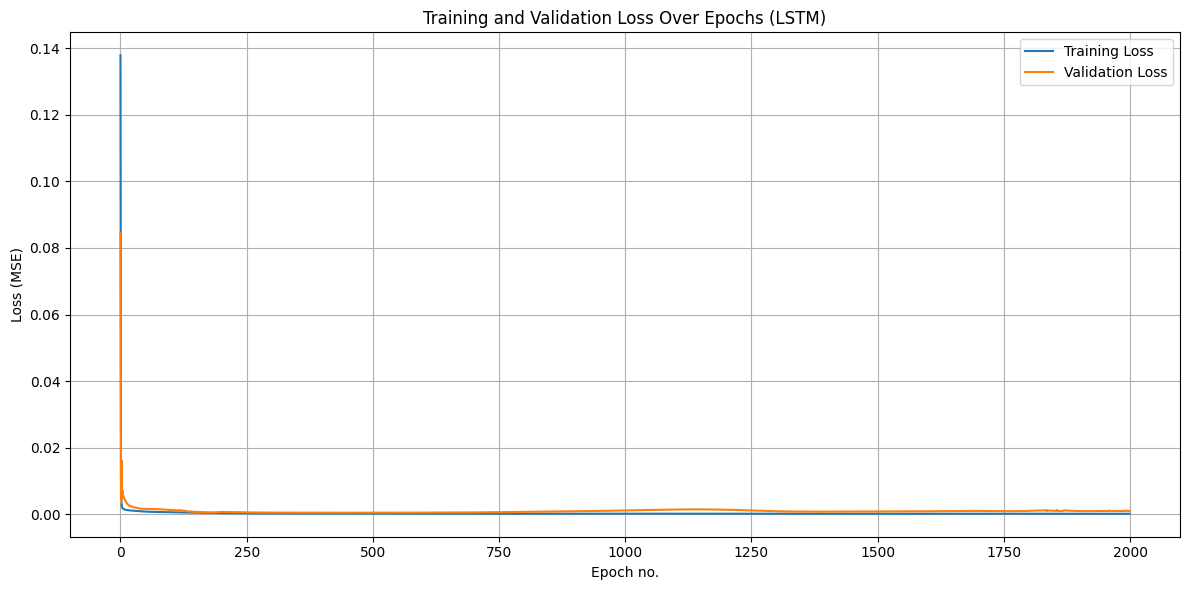


--- Starting Reinforcement Learning Fine-Tuning (Batched) ---
RL Epoch 1/150, Average Loss per Batch: 0.000208
RL Epoch 2/150, Average Loss per Batch: 0.000224
RL Epoch 3/150, Average Loss per Batch: 0.000210
RL Epoch 4/150, Average Loss per Batch: 0.000225
RL Epoch 5/150, Average Loss per Batch: 0.000223
RL Epoch 6/150, Average Loss per Batch: 0.000278
RL Epoch 7/150, Average Loss per Batch: 0.000231
RL Epoch 8/150, Average Loss per Batch: 0.000232
RL Epoch 9/150, Average Loss per Batch: 0.000222
RL Epoch 10/150, Average Loss per Batch: 0.000293
RL Epoch 11/150, Average Loss per Batch: 0.000232
RL Epoch 12/150, Average Loss per Batch: 0.000223
RL Epoch 13/150, Average Loss per Batch: 0.000208
RL Epoch 14/150, Average Loss per Batch: 0.000206
RL Epoch 15/150, Average Loss per Batch: 0.000203
RL Epoch 16/150, Average Loss per Batch: 0.000210
RL Epoch 17/150, Average Loss per Batch: 0.000211
RL Epoch 18/150, Average Loss per Batch: 0.000267
RL Epoch 19/150, Average Loss per Batch: 0.000

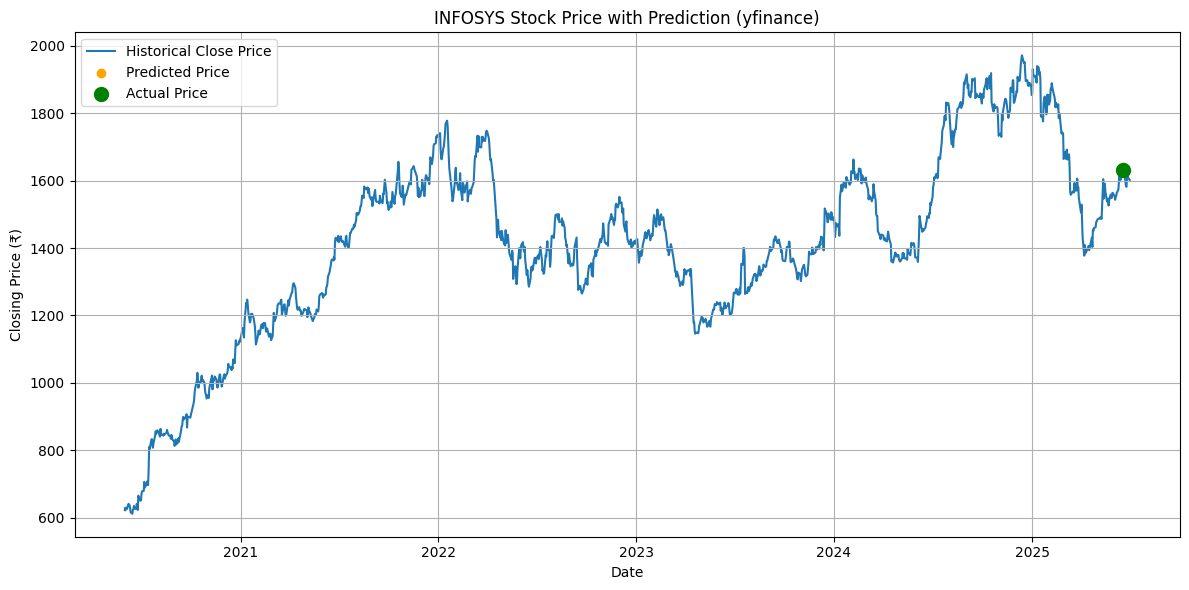


 Test Set Performance Metrics (LSTM):
 Mean Absolute Error (MAE) : ₹23.96
 Mean Squared Error (MSE)  : ₹895.44
 Root Squared Error (RMSE) : ₹29.92
 R² Score                  : -0.0502
 Mean Absolute Percentage Error (MAPE) : 1.51%
 Accuracy (100 - MAPE) : 98.49%
 MSE Percentage of Average Price: 56.10%
 MAE Percentage of Average Price: 1.50%


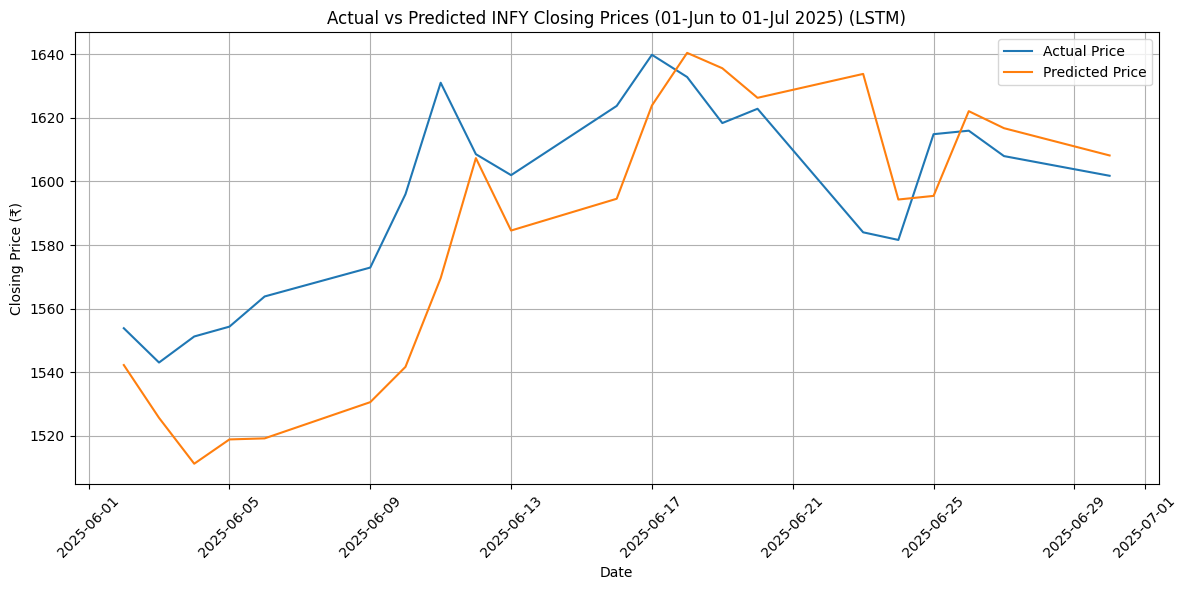

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import SimpleRNN, LSTM
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from matplotlib.dates import DateFormatter
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import numpy as np
import pandas as pd
import datetime
import holidays
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.filterwarnings('ignore')

# Set seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

SYMBOL = "INFY.NS"
SEQUENCE_LENGTH = 60

TRAIN_START_DATE = "2020-06-01"
TRAIN_END_DATE = "2025-05-31"

TEST_START_DATE = "2025-06-01"
TEST_END_DATE = "2025-07-01"

# Get Indian trading holidays
def get_nse_holidays():
    in_holidays = holidays.India(years=range(2020, 2026))
    return set(in_holidays.keys())

TRADING_HOLIDAYS = get_nse_holidays()

def is_valid_date(date_str):
    try:
        date = datetime.datetime.strptime(date_str, "%Y-%m-%d").date()
        if not (datetime.date(2025, 6, 1) <= date <= datetime.date(2025, 7, 1)):
            print("Date must be between 2025-06-01 and 2025-07-01.")
            return False
        if date.weekday() >= 5:
            print("Weekends are not trading days.")
            return False
        if date in TRADING_HOLIDAYS:
            print("Entered date is a trading holiday.")
            return False
        return True
    except ValueError:
        print("Invalid date format. Use YYYY-MM-DD.")
        return False

def get_stock_data():
    print("Fetching data from Yahoo Finance...")
    full_df = yf.download(SYMBOL, start=TRAIN_START_DATE, end=TEST_END_DATE)
    full_df = full_df[['Close']]
    full_df.dropna(inplace=True)
    full_df.index = pd.to_datetime(full_df.index)

    train_df = full_df.loc[TRAIN_START_DATE:TRAIN_END_DATE]
    test_df = full_df.loc[TEST_START_DATE:TEST_END_DATE]
    return train_df, test_df, full_df

# Prompt until valid date is entered
def get_user_date():
    while True:
        date_input = input("Enter a date (YYYY-MM-DD): ")
        if is_valid_date(date_input):
            return datetime.datetime.strptime(date_input, "%Y-%m-%d").date()

# Build the LSTM model
def build_model(input_shape, learning_rate=0.001): # Added learning_rate parameter
    model = Sequential()
    model.add(LSTM(units=50, activation='tanh', input_shape=input_shape))
    model.add(Dense(1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Reinforcement Learning Fine-Tuning
class RLAgent:
    """
    A simple RL Agent to fine-tune the RNN model.
    The "environment" is the time series data, and the "action" is the prediction.
    The reward is based on prediction accuracy.
    """
    def __init__(self, model, learning_rate=0.001):
        self.model = model
        self.optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    @tf.function
    def train_step(self, state, target):
        """
        Performs a single training step to fine-tune the model weights.
        """
        with tf.GradientTape() as tape:
            prediction = self.model(state, training=True)
            # Use Mean Squared Error directly as the loss to minimize
            loss = tf.reduce_mean(tf.square(tf.cast(target, tf.float32) - prediction))

        grads = tape.gradient(loss, self.model.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.model.trainable_variables))
        return loss # Return the mean loss for the batch


def fine_tune_with_rl(model, X_train, y_train, epochs=5, learning_rate=0.001, batch_size=32):
    """
    Fine- tunes the pre-trained RNN model using a simple reinforcement learning loop with batched data.
    """
    print("\n--- Starting Reinforcement Learning Fine-Tuning (Batched) ---")
    agent = RLAgent(model, learning_rate=learning_rate)

    # Create a TensorFlow Dataset and batch it
    dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    dataset = dataset.batch(batch_size)

    num_batches = tf.data.experimental.cardinality(dataset).numpy()

    for epoch in range(epochs):
        total_loss = 0
        batch_count = 0
        for batch_x, batch_y in dataset:
            # Ensure batch_x has the correct shape (batch_size, sequence_length, 1)
            batch_x_reshaped = tf.reshape(batch_x, (tf.shape(batch_x)[0], tf.shape(batch_x)[1], 1))
            loss = agent.train_step(batch_x_reshaped, batch_y)
            total_loss += loss.numpy() # Sum up the mean loss for each batch
            batch_count += 1

        # Calculate average loss per epoch
        average_epoch_loss = total_loss / num_batches if num_batches > 0 else 0
        print(f"RL Epoch {epoch + 1}/{epochs}, Average Loss per Batch: {average_epoch_loss:.6f}") # Print average loss

    print("--- RL Fine-Tuning Complete ---")
    return model


def create_test_sequences(train_df, test_df, scaler):
    combined = pd.concat([train_df, test_df])
    scaled = scaler.transform(combined[['Close']])
    X_test = []
    test_dates = test_df.index.date

    for i in range(len(train_df), len(combined)):
        if i - SEQUENCE_LENGTH < 0:
            continue
        seq = scaled[i - SEQUENCE_LENGTH:i]
        X_test.append(seq)

    X_test = np.array(X_test)
    return X_test, test_dates

def predict_price_on_test(model, full_df, scaler, user_date):
    all_dates = full_df.index.date
    try:
        idx = list(all_dates).index(user_date)
    except ValueError:
        print("User date not found in data.")
        return None, None, user_date

    if idx < SEQUENCE_LENGTH:
        print("Not enough data to predict for this date.")
        return None, None, user_date

    input_seq = scaler.transform(full_df[['Close']].values)[idx - SEQUENCE_LENGTH:idx]
    input_seq = np.reshape(input_seq, (1, SEQUENCE_LENGTH, 1))

    predicted_scaled = model.predict(input_seq, verbose=0)
    predicted_price = scaler.inverse_transform(predicted_scaled)[0][0]

    actual_price = float(full_df.iloc[idx]['Close']) if idx < len(full_df) else None
    return predicted_price, actual_price, full_df.index[idx].date()

# Plot the result
def plot_results(df, predicted_date, predicted_price, actual_price):
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='Historical Close Price',zorder=1)
    #plt.axvline(pd.to_datetime(predicted_date), color='red', linestyle='--', label='Predicted Date')
    plt.scatter(pd.to_datetime(predicted_date), predicted_price, color='orange', label='Predicted Price',zorder=2)
    if actual_price is not None:
        plt.scatter(pd.to_datetime(predicted_date), actual_price, color='green', label='Actual Price',zorder=3, s=100)
    plt.title("INFOSYS Stock Price with Prediction (yfinance)")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (₹)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#Plotting error with no. of epochs
def plot_training_loss(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title("Training and Validation Loss Over Epochs (LSTM)") # Changed title
    plt.xlabel("Epoch no.")
    plt.ylabel("Loss (MSE)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def main():
    print("=== INFOSYS LSTM Stock Price Predictor (Test Phase June–July 2025) ===") # Changed title
    user_date = get_user_date()

    # Step 1: Get stock data
    train_df, test_df, full_df = get_stock_data()

    # Step 2: Preprocess
    scaler = MinMaxScaler()
    scaled_train = scaler.fit_transform(train_df[['Close']])
    X, y = [], []
    for i in range(SEQUENCE_LENGTH, len(scaled_train)):
        X.append(scaled_train[i - SEQUENCE_LENGTH:i])
        y.append(scaled_train[i])
    X = np.array(X)
    y = np.array(y)

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)
    #early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    # Step 3: Build and train model
    model = build_model((X_train.shape[1], 1), learning_rate=0.0005) # Reduced Adam learning rate
    print("Training LSTM model...") # Changed print statement
    history = model.fit(X_train, y_train, epochs=2000, batch_size=64, validation_data=(X_val, y_val), verbose = 1) #callbacks = [early_stop], verbose=1)

    #print(f"\nBest weights restored from epoch: {early_stop.best_epoch + 1}")

    # Step 4: Plot training loss
    plot_training_loss(history)

    # Step 5: Fine-tune with Reinforcement Learning
    rl_tuned_model = fine_tune_with_rl(model, X_train, y_train, epochs=150, learning_rate=0.0001, batch_size=32)

    # Predict on training data to evaluate performance
    y_train_pred_scaled = rl_tuned_model.predict(X_train, verbose=0)
    y_train_pred = scaler.inverse_transform(y_train_pred_scaled)
    y_true_train = scaler.inverse_transform(y_train.reshape(-1, 1))

    # Calculate and print training metrics
    mae_train = mean_absolute_error(y_true_train, y_train_pred)
    mse_train = mean_squared_error(y_true_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_true_train, y_train_pred)
    mape_train = mean_absolute_percentage_error(y_true_train, y_train_pred) * 100
    accuracy_train = 100 - mape_train
    mse_percent_train = (mse_train / np.mean(y_true_train)) * 100 if np.mean(y_true_train) != 0 else np.nan
    mae_percent_train = (mae_train / np.mean(y_true_train)) * 100 if np.mean(y_true_train) != 0 else np.nan
    print("\n Training Set Performance Metrics (LSTM):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_train:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_train:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_train:.2f}")
    print(f" R² Score                  : {r2_train:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_train:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_train:.2f}%")
    print(f" MSE Percentage of Average Price : {mse_percent_train:.2f}%")
    print(f" MAE Percentage of Average Price : {mae_percent_train:.2f}%")

    # Predict on validation set
    y_val_pred_scaled = rl_tuned_model.predict(X_val, verbose=0)
    y_val_pred = scaler.inverse_transform(y_val_pred_scaled)
    y_val_true = scaler.inverse_transform(y_val.reshape(-1, 1))

    # Calculate and print validation metrics
    mae_val = mean_absolute_error(y_val_true, y_val_pred)
    mse_val = mean_squared_error(y_val_true, y_val_pred)
    rmse_val = np.sqrt(mse_val)
    r2_val = r2_score(y_val_true, y_val_pred)
    mape_val = mean_absolute_percentage_error(y_val_true, y_val_pred) * 100
    accuracy_val = 100 - mape_val
    mse_percent_val = (mse_val / np.mean(y_val_true)) * 100 if np.mean(y_val_true) != 0 else np.nan
    mae_percent_val = (mae_val / np.mean(y_val_true)) * 100 if np.mean(y_val_true) != 0 else np.nan
    print("\n Validation Set Performance Metrics (LSTM):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_val:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_val:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_val:.2f}")
    print(f" R² Score                  : {r2_val:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_val:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_val:.2f}%")
    print(f" MSE Percentage of Average Price: {mse_percent_val:.2f}%")
    print(f" MAE Percentage of Average Price: {mae_percent_val:.2f}%")


    # Step 6: Predict for user-input test date
    predicted_price, actual_price, predicted_date = predict_price_on_test(rl_tuned_model, full_df, scaler, user_date)
    if predicted_price is not None:
        print(f"\n Prediction for {predicted_date}:")
        print(f" Predicted Closing Price: ₹{predicted_price:.2f}")
        if actual_price is not None:
            print(f" Actual Closing Price   : ₹{actual_price}")
        else:
            print("Actual price not available.")

        plot_results(full_df, predicted_date, predicted_price, actual_price)
    else:
        print("❌ Unable to make prediction.")

    # === Step 7: Predict all test dates and compare ===

    # Reuse combined full_df
    combined_df = pd.concat([train_df, test_df])
    scaled_combined = scaler.transform(combined_df[['Close']])

    X_test_all = []
    test_date_indexes = []

    for i in range(len(train_df), len(combined_df)):
        if i - SEQUENCE_LENGTH < 0:
            continue
        seq = scaled_combined[i - SEQUENCE_LENGTH:i]
        X_test_all.append(seq)
        test_date_indexes.append(combined_df.index[i])

    X_test_all = np.array(X_test_all)

    # Predict on test sequences
    y_test_pred_scaled = rl_tuned_model.predict(X_test_all, verbose=0)
    y_test_pred = scaler.inverse_transform(y_test_pred_scaled)

    # Actual prices
    y_test_true = test_df.loc[test_date_indexes, 'Close'].values

    # Calculate and print test metrics
    mae_test = mean_absolute_error(y_test_true, y_test_pred)
    mse_test = mean_squared_error(y_test_true, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test_true, y_test_pred)
    mape_test = mean_absolute_percentage_error(y_test_true, y_test_pred) * 100
    accuracy_test = 100 - mape_test
    mse_percent_test = (mse_test / np.mean(y_test_true)) * 100 if np.mean(y_test_true) != 0 else np.nan
    mae_percent_test = (mae_test / np.mean(y_test_true)) * 100 if np.mean(y_test_true) != 0 else np.nan
    print("\n Test Set Performance Metrics (LSTM):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_test:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_test:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_test:.2f}")
    print(f" R² Score                  : {r2_test:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_test:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_test:.2f}%")
    print(f" MSE Percentage of Average Price: {mse_percent_test:.2f}%")
    print(f" MAE Percentage of Average Price: {mae_percent_test:.2f}%")

    # Plot actual vs predicted
    plt.figure(figsize=(12, 6))
    plt.plot(test_date_indexes, y_test_true, label='Actual Price')
    plt.plot(test_date_indexes, y_test_pred, label='Predicted Price')
    plt.title("Actual vs Predicted INFY Closing Prices (01-Jun to 01-Jul 2025) (LSTM)")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (₹)")
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

=== INFOSYS LSTM Stock Price Predictor (Test Phase June–July 2025) ===


[*********************100%***********************]  1 of 1 completed

Fetching data from Yahoo Finance...
Training LSTM model...


Epoch 1/2000
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.2368 - val_loss: 0.1407
Epoch 2/2000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0240 - val_loss: 0.0041
Epoch 3/2000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0056 - val_loss: 0.0238
Epoch 4/2000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0033 - val_loss: 0.0071
Epoch 5/2000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0026 - val_loss: 0.0108
Epoch 6/2000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0022 - val_loss: 0.0083
Epoch 7/2000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0021 - val_loss: 0.0081
Epoch 8/2000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0020 - val_loss: 0.0072
Epoch 9/2000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0019 - val_loss: 0.0066
Epoch 10/2000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0018 - val_loss: 0.0059
Epoch 11/2000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0017 - val_loss: 0.0054
Epoch 12/2000
15/15 ━━━━━━━━━━━━━━━━━━━━ 

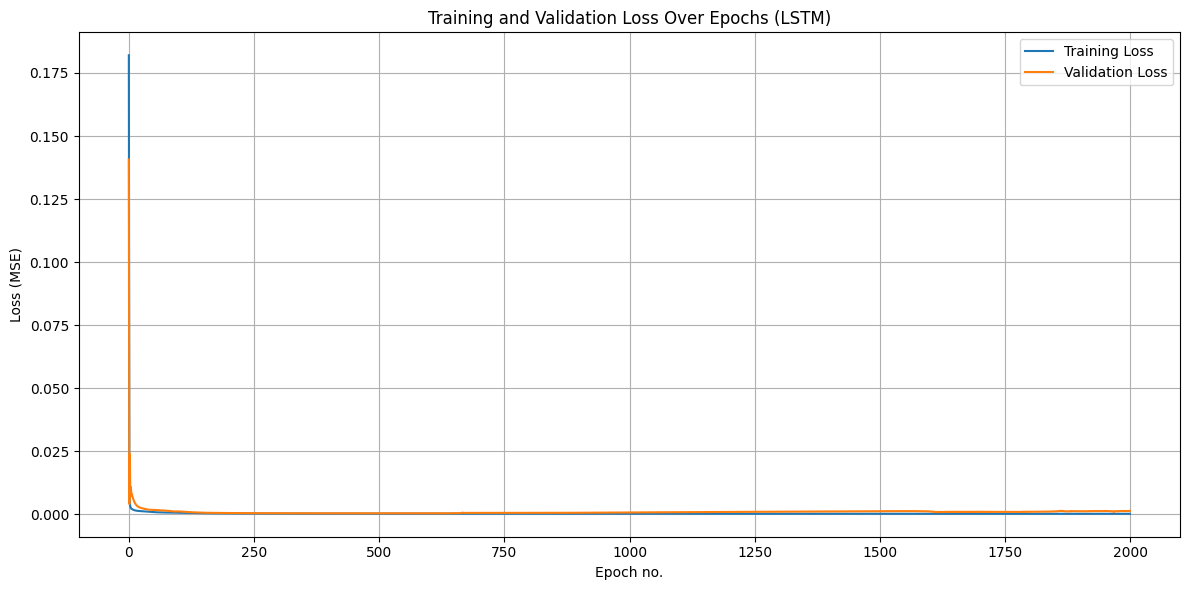


--- Starting Reinforcement Learning Fine-Tuning (Batched) ---
RL Epoch 1/200, Average Loss per Batch: 0.000213
RL Epoch 2/200, Average Loss per Batch: 0.000230
RL Epoch 3/200, Average Loss per Batch: 0.000226
RL Epoch 4/200, Average Loss per Batch: 0.000237
RL Epoch 5/200, Average Loss per Batch: 0.000223
RL Epoch 6/200, Average Loss per Batch: 0.000246
RL Epoch 7/200, Average Loss per Batch: 0.000225
RL Epoch 8/200, Average Loss per Batch: 0.000250
RL Epoch 9/200, Average Loss per Batch: 0.000221
RL Epoch 10/200, Average Loss per Batch: 0.000227
RL Epoch 11/200, Average Loss per Batch: 0.000216
RL Epoch 12/200, Average Loss per Batch: 0.000231
RL Epoch 13/200, Average Loss per Batch: 0.000218
RL Epoch 14/200, Average Loss per Batch: 0.000240
RL Epoch 15/200, Average Loss per Batch: 0.000222
RL Epoch 16/200, Average Loss per Batch: 0.000239
RL Epoch 17/200, Average Loss per Batch: 0.000221
RL Epoch 18/200, Average Loss per Batch: 0.000236
RL Epoch 19/200, Average Loss per Batch: 0.000

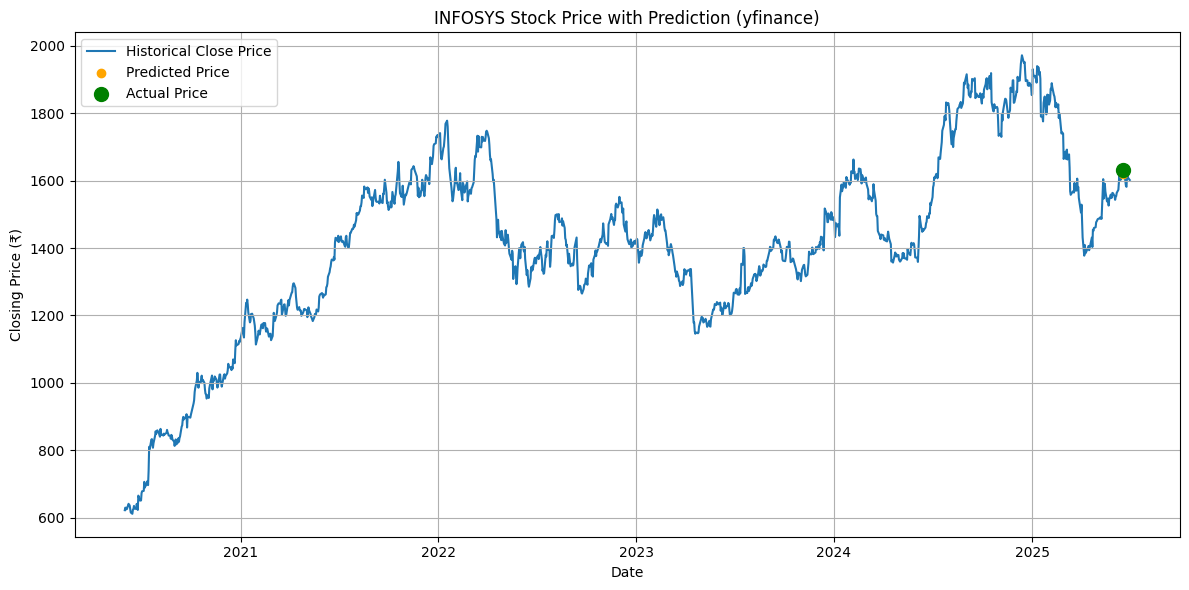


 Test Set Performance Metrics (LSTM):
 Mean Absolute Error (MAE) : ₹17.16
 Mean Squared Error (MSE)  : ₹542.38
 Root Squared Error (RMSE) : ₹23.29
 R² Score                  : 0.3639
 Mean Absolute Percentage Error (MAPE) : 1.07%
 Accuracy (100 - MAPE) : 98.93%
 MSE Percentage of Average Price: 33.98%
 MAE Percentage of Average Price: 1.08%


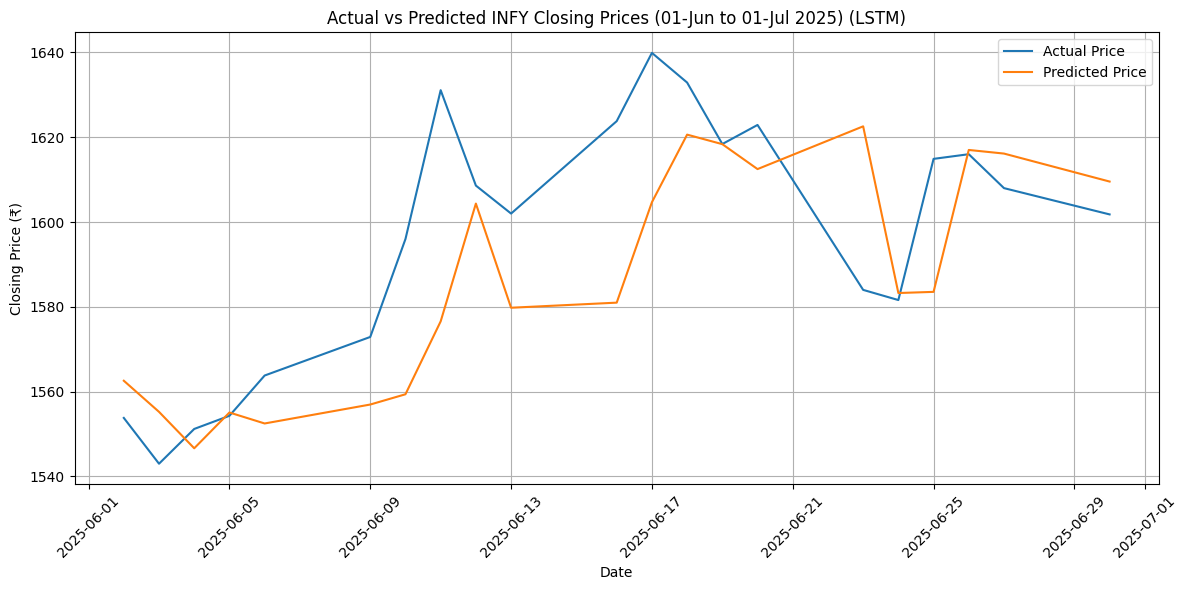

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import SimpleRNN, LSTM
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from matplotlib.dates import DateFormatter
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import numpy as np
import pandas as pd
import datetime
import holidays
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.filterwarnings('ignore')

# Set seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

SYMBOL = "INFY.NS"
SEQUENCE_LENGTH = 60

TRAIN_START_DATE = "2020-06-01"
TRAIN_END_DATE = "2025-05-31"

TEST_START_DATE = "2025-06-01"
TEST_END_DATE = "2025-07-01"

# Get Indian trading holidays
def get_nse_holidays():
    in_holidays = holidays.India(years=range(2020, 2026))
    return set(in_holidays.keys())

TRADING_HOLIDAYS = get_nse_holidays()

def is_valid_date(date_str):
    try:
        date = datetime.datetime.strptime(date_str, "%Y-%m-%d").date()
        if not (datetime.date(2025, 6, 1) <= date <= datetime.date(2025, 7, 1)):
            print("Date must be between 2025-06-01 and 2025-07-01.")
            return False
        if date.weekday() >= 5:
            print("Weekends are not trading days.")
            return False
        if date in TRADING_HOLIDAYS:
            print("Entered date is a trading holiday.")
            return False
        return True
    except ValueError:
        print("Invalid date format. Use YYYY-MM-DD.")
        return False

def get_stock_data():
    print("Fetching data from Yahoo Finance...")
    full_df = yf.download(SYMBOL, start=TRAIN_START_DATE, end=TEST_END_DATE)
    full_df = full_df[['Close']]
    full_df.dropna(inplace=True)
    full_df.index = pd.to_datetime(full_df.index)

    train_df = full_df.loc[TRAIN_START_DATE:TRAIN_END_DATE]
    test_df = full_df.loc[TEST_START_DATE:TEST_END_DATE]
    return train_df, test_df, full_df

# Prompt until valid date is entered
def get_user_date():
    while True:
        date_input = input("Enter a date (YYYY-MM-DD): ")
        if is_valid_date(date_input):
            return datetime.datetime.strptime(date_input, "%Y-%m-%d").date()

# Build the LSTM model
def build_model(input_shape, learning_rate=0.001): # Added learning_rate parameter
    model = Sequential()
    model.add(LSTM(units=50, activation='tanh', input_shape=input_shape))
    model.add(Dense(1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Reinforcement Learning Fine-Tuning
class RLAgent:
    """
    A simple RL Agent to fine-tune the RNN model.
    The "environment" is the time series data, and the "action" is the prediction.
    The reward is based on prediction accuracy.
    """
    def __init__(self, model, learning_rate=0.001):
        self.model = model
        self.optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    @tf.function
    def train_step(self, state, target):
        """
        Performs a single training step to fine-tune the model weights.
        """
        with tf.GradientTape() as tape:
            prediction = self.model(state, training=True)
            # Use Mean Squared Error directly as the loss to minimize
            loss = tf.reduce_mean(tf.square(tf.cast(target, tf.float32) - prediction))

        grads = tape.gradient(loss, self.model.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.model.trainable_variables))
        return loss # Return the mean loss for the batch


def fine_tune_with_rl(model, X_train, y_train, epochs=5, learning_rate=0.001, batch_size=32):
    """
    Fine- tunes the pre-trained RNN model using a simple reinforcement learning loop with batched data.
    """
    print("\n--- Starting Reinforcement Learning Fine-Tuning (Batched) ---")
    agent = RLAgent(model, learning_rate=learning_rate)

    # Create a TensorFlow Dataset and batch it
    dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    dataset = dataset.batch(batch_size)

    num_batches = tf.data.experimental.cardinality(dataset).numpy()

    for epoch in range(epochs):
        total_loss = 0
        batch_count = 0
        for batch_x, batch_y in dataset:
            # Ensure batch_x has the correct shape (batch_size, sequence_length, 1)
            batch_x_reshaped = tf.reshape(batch_x, (tf.shape(batch_x)[0], tf.shape(batch_x)[1], 1))
            loss = agent.train_step(batch_x_reshaped, batch_y)
            total_loss += loss.numpy() # Sum up the mean loss for each batch
            batch_count += 1

        # Calculate average loss per epoch
        average_epoch_loss = total_loss / num_batches if num_batches > 0 else 0
        print(f"RL Epoch {epoch + 1}/{epochs}, Average Loss per Batch: {average_epoch_loss:.6f}") # Print average loss

    print("--- RL Fine-Tuning Complete ---")
    return model


def create_test_sequences(train_df, test_df, scaler):
    combined = pd.concat([train_df, test_df])
    scaled = scaler.transform(combined[['Close']])
    X_test = []
    test_dates = test_df.index.date

    for i in range(len(train_df), len(combined)):
        if i - SEQUENCE_LENGTH < 0:
            continue
        seq = scaled[i - SEQUENCE_LENGTH:i]
        X_test.append(seq)

    X_test = np.array(X_test)
    return X_test, test_dates

def predict_price_on_test(model, full_df, scaler, user_date):
    all_dates = full_df.index.date
    try:
        idx = list(all_dates).index(user_date)
    except ValueError:
        print("User date not found in data.")
        return None, None, user_date

    if idx < SEQUENCE_LENGTH:
        print("Not enough data to predict for this date.")
        return None, None, user_date

    input_seq = scaler.transform(full_df[['Close']].values)[idx - SEQUENCE_LENGTH:idx]
    input_seq = np.reshape(input_seq, (1, SEQUENCE_LENGTH, 1))

    predicted_scaled = model.predict(input_seq, verbose=0)
    predicted_price = scaler.inverse_transform(predicted_scaled)[0][0]

    actual_price = float(full_df.iloc[idx]['Close']) if idx < len(full_df) else None
    return predicted_price, actual_price, full_df.index[idx].date()

# Plot the result
def plot_results(df, predicted_date, predicted_price, actual_price):
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='Historical Close Price',zorder=1)
    #plt.axvline(pd.to_datetime(predicted_date), color='red', linestyle='--', label='Predicted Date')
    plt.scatter(pd.to_datetime(predicted_date), predicted_price, color='orange', label='Predicted Price',zorder=2)
    if actual_price is not None:
        plt.scatter(pd.to_datetime(predicted_date), actual_price, color='green', label='Actual Price',zorder=3, s=100)
    plt.title("INFOSYS Stock Price with Prediction (yfinance)")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (₹)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#Plotting error with no. of epochs
def plot_training_loss(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title("Training and Validation Loss Over Epochs (LSTM)") # Changed title
    plt.xlabel("Epoch no.")
    plt.ylabel("Loss (MSE)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def main():
    print("=== INFOSYS LSTM Stock Price Predictor (Test Phase June–July 2025) ===") # Changed title
    user_date = get_user_date()

    # Step 1: Get stock data
    train_df, test_df, full_df = get_stock_data()

    # Step 2: Preprocess
    scaler = MinMaxScaler()
    scaled_train = scaler.fit_transform(train_df[['Close']])
    X, y = [], []
    for i in range(SEQUENCE_LENGTH, len(scaled_train)):
        X.append(scaled_train[i - SEQUENCE_LENGTH:i])
        y.append(scaled_train[i])
    X = np.array(X)
    y = np.array(y)

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)
    #early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    # Step 3: Build and train model
    model = build_model((X_train.shape[1], 1), learning_rate=0.0005) # Reduced Adam learning rate
    print("Training LSTM model...") # Changed print statement
    history = model.fit(X_train, y_train, epochs=2000, batch_size=64, validation_data=(X_val, y_val), verbose = 1) #callbacks = [early_stop], verbose=1)

    #print(f"\nBest weights restored from epoch: {early_stop.best_epoch + 1}")

    # Step 4: Plot training loss
    plot_training_loss(history)

    # Step 5: Fine-tune with Reinforcement Learning
    rl_tuned_model = fine_tune_with_rl(model, X_train, y_train, epochs=200, learning_rate=0.0001, batch_size=32)

    # Predict on training data to evaluate performance
    y_train_pred_scaled = rl_tuned_model.predict(X_train, verbose=0)
    y_train_pred = scaler.inverse_transform(y_train_pred_scaled)
    y_true_train = scaler.inverse_transform(y_train.reshape(-1, 1))

    # Calculate and print training metrics
    mae_train = mean_absolute_error(y_true_train, y_train_pred)
    mse_train = mean_squared_error(y_true_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_true_train, y_train_pred)
    mape_train = mean_absolute_percentage_error(y_true_train, y_train_pred) * 100
    accuracy_train = 100 - mape_train
    mse_percent_train = (mse_train / np.mean(y_true_train)) * 100 if np.mean(y_true_train) != 0 else np.nan
    mae_percent_train = (mae_train / np.mean(y_true_train)) * 100 if np.mean(y_true_train) != 0 else np.nan
    print("\n Training Set Performance Metrics (LSTM):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_train:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_train:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_train:.2f}")
    print(f" R² Score                  : {r2_train:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_train:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_train:.2f}%")
    print(f" MSE Percentage of Average Price : {mse_percent_train:.2f}%")
    print(f" MAE Percentage of Average Price : {mae_percent_train:.2f}%")

    # Predict on validation set
    y_val_pred_scaled = rl_tuned_model.predict(X_val, verbose=0)
    y_val_pred = scaler.inverse_transform(y_val_pred_scaled)
    y_val_true = scaler.inverse_transform(y_val.reshape(-1, 1))

    # Calculate and print validation metrics
    mae_val = mean_absolute_error(y_val_true, y_val_pred)
    mse_val = mean_squared_error(y_val_true, y_val_pred)
    rmse_val = np.sqrt(mse_val)
    r2_val = r2_score(y_val_true, y_val_pred)
    mape_val = mean_absolute_percentage_error(y_val_true, y_val_pred) * 100
    accuracy_val = 100 - mape_val
    mse_percent_val = (mse_val / np.mean(y_val_true)) * 100 if np.mean(y_val_true) != 0 else np.nan
    mae_percent_val = (mae_val / np.mean(y_val_true)) * 100 if np.mean(y_val_true) != 0 else np.nan
    print("\n Validation Set Performance Metrics (LSTM):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_val:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_val:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_val:.2f}")
    print(f" R² Score                  : {r2_val:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_val:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_val:.2f}%")
    print(f" MSE Percentage of Average Price: {mse_percent_val:.2f}%")
    print(f" MAE Percentage of Average Price: {mae_percent_val:.2f}%")


    # Step 6: Predict for user-input test date
    predicted_price, actual_price, predicted_date = predict_price_on_test(rl_tuned_model, full_df, scaler, user_date)
    if predicted_price is not None:
        print(f"\n Prediction for {predicted_date}:")
        print(f" Predicted Closing Price: ₹{predicted_price:.2f}")
        if actual_price is not None:
            print(f" Actual Closing Price   : ₹{actual_price}")
        else:
            print("Actual price not available.")

        plot_results(full_df, predicted_date, predicted_price, actual_price)
    else:
        print("❌ Unable to make prediction.")

    # === Step 7: Predict all test dates and compare ===

    # Reuse combined full_df
    combined_df = pd.concat([train_df, test_df])
    scaled_combined = scaler.transform(combined_df[['Close']])

    X_test_all = []
    test_date_indexes = []

    for i in range(len(train_df), len(combined_df)):
        if i - SEQUENCE_LENGTH < 0:
            continue
        seq = scaled_combined[i - SEQUENCE_LENGTH:i]
        X_test_all.append(seq)
        test_date_indexes.append(combined_df.index[i])

    X_test_all = np.array(X_test_all)

    # Predict on test sequences
    y_test_pred_scaled = rl_tuned_model.predict(X_test_all, verbose=0)
    y_test_pred = scaler.inverse_transform(y_test_pred_scaled)

    # Actual prices
    y_test_true = test_df.loc[test_date_indexes, 'Close'].values

    # Calculate and print test metrics
    mae_test = mean_absolute_error(y_test_true, y_test_pred)
    mse_test = mean_squared_error(y_test_true, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test_true, y_test_pred)
    mape_test = mean_absolute_percentage_error(y_test_true, y_test_pred) * 100
    accuracy_test = 100 - mape_test
    mse_percent_test = (mse_test / np.mean(y_test_true)) * 100 if np.mean(y_test_true) != 0 else np.nan
    mae_percent_test = (mae_test / np.mean(y_test_true)) * 100 if np.mean(y_test_true) != 0 else np.nan
    print("\n Test Set Performance Metrics (LSTM):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_test:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_test:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_test:.2f}")
    print(f" R² Score                  : {r2_test:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_test:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_test:.2f}%")
    print(f" MSE Percentage of Average Price: {mse_percent_test:.2f}%")
    print(f" MAE Percentage of Average Price: {mae_percent_test:.2f}%")

    # Plot actual vs predicted
    plt.figure(figsize=(12, 6))
    plt.plot(test_date_indexes, y_test_true, label='Actual Price')
    plt.plot(test_date_indexes, y_test_pred, label='Predicted Price')
    plt.title("Actual vs Predicted INFY Closing Prices (01-Jun to 01-Jul 2025) (LSTM)")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (₹)")
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

# **5000 epochs**

=== INFOSYS LSTM Stock Price Predictor (Test Phase June–July 2025) ===


[*********************100%***********************]  1 of 1 completed

Fetching data from Yahoo Finance...
Training LSTM model...
Epoch 1/5000


Streaming output truncated to the last 5000 lines.
Epoch 2501/5000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 1.5380e-04 - val_loss: 9.1876e-04
Epoch 2502/5000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 1.5282e-04 - val_loss: 9.1049e-04
Epoch 2503/5000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 1.5184e-04 - val_loss: 8.8949e-04
Epoch 2504/5000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 1.5137e-04 - val_loss: 8.8444e-04
Epoch 2505/5000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 1.5157e-04 - val_loss: 8.8049e-04
Epoch 2506/5000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 1.5168e-04 - val_loss: 8.7795e-04
Epoch 2507/5000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 1.5159e-04 - val_loss: 8.7531e-04
Epoch 2508/5000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 1.5155e-04 - val_loss: 8.7406e-04
Epoch 2509/5000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 1.5157e-04 - val_loss: 8.7388e-04
Epoch 2510/5000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 1.5

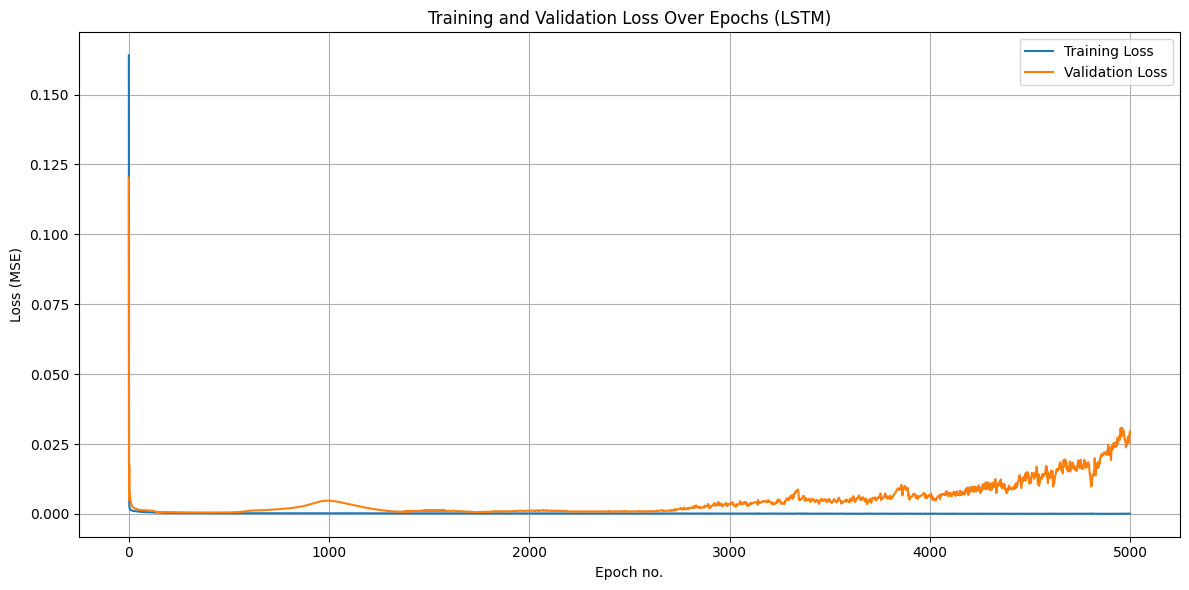


--- Starting Reinforcement Learning Fine-Tuning (Batched) ---
RL Epoch 1/150, Average Loss per Batch: 0.000083
RL Epoch 2/150, Average Loss per Batch: 0.000080
RL Epoch 3/150, Average Loss per Batch: 0.000067
RL Epoch 4/150, Average Loss per Batch: 0.000058
RL Epoch 5/150, Average Loss per Batch: 0.000055
RL Epoch 6/150, Average Loss per Batch: 0.000052
RL Epoch 7/150, Average Loss per Batch: 0.000052
RL Epoch 8/150, Average Loss per Batch: 0.000055
RL Epoch 9/150, Average Loss per Batch: 0.000058
RL Epoch 10/150, Average Loss per Batch: 0.000066
RL Epoch 11/150, Average Loss per Batch: 0.000071
RL Epoch 12/150, Average Loss per Batch: 0.000065
RL Epoch 13/150, Average Loss per Batch: 0.000063
RL Epoch 14/150, Average Loss per Batch: 0.000058
RL Epoch 15/150, Average Loss per Batch: 0.000056
RL Epoch 16/150, Average Loss per Batch: 0.000055
RL Epoch 17/150, Average Loss per Batch: 0.000051
RL Epoch 18/150, Average Loss per Batch: 0.000050
RL Epoch 19/150, Average Loss per Batch: 0.000

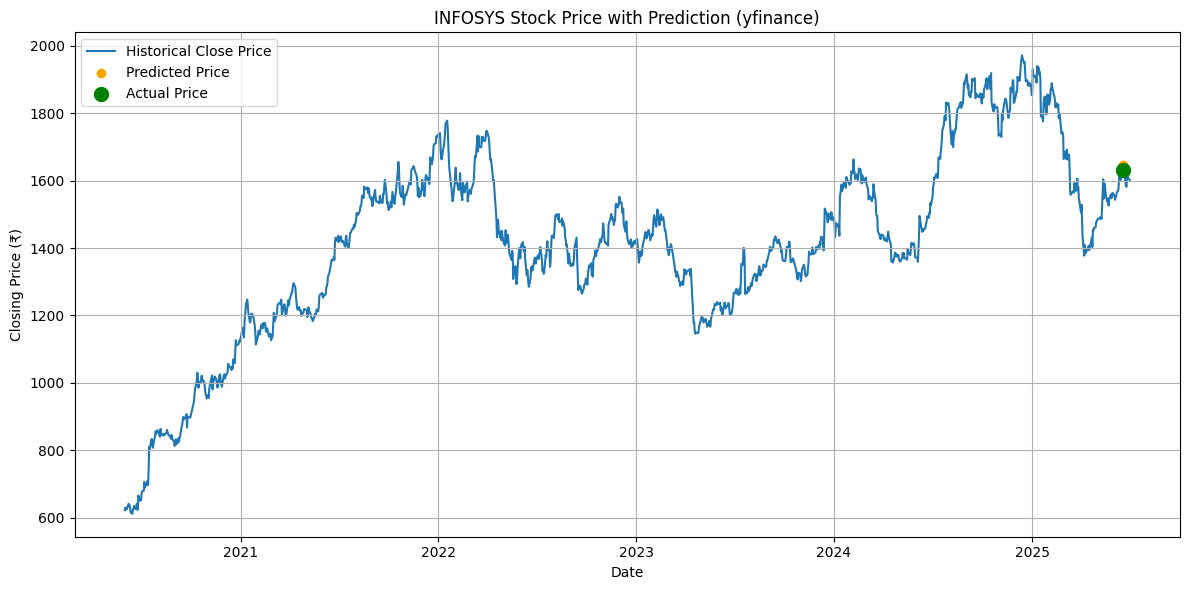


 Test Set Performance Metrics (LSTM):
 Mean Absolute Error (MAE) : ₹22.47
 Mean Squared Error (MSE)  : ₹754.26
 Root Squared Error (RMSE) : ₹27.46
 R² Score                  : 0.1154
 Mean Absolute Percentage Error (MAPE) : 1.41%
 Accuracy (100 - MAPE) : 98.59%
 MSE Percentage of Average Price: 47.25%
 MAE Percentage of Average Price: 1.41%


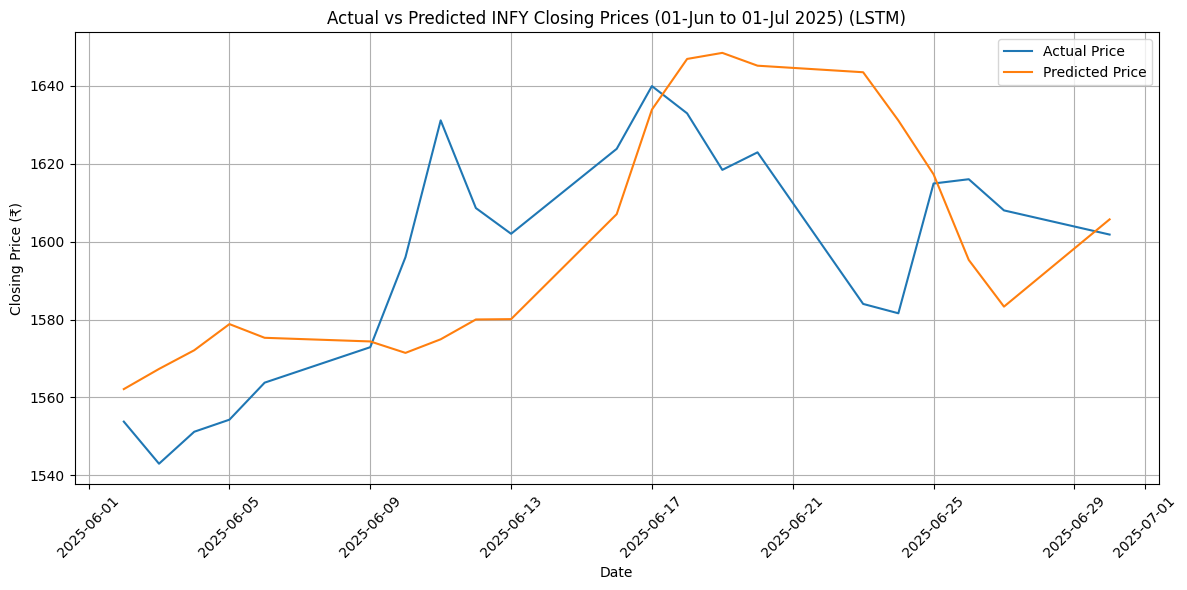

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import SimpleRNN, LSTM
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from matplotlib.dates import DateFormatter
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import numpy as np
import pandas as pd
import datetime
import holidays
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.filterwarnings('ignore')

# Set seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

SYMBOL = "INFY.NS"
SEQUENCE_LENGTH = 60

TRAIN_START_DATE = "2020-06-01"
TRAIN_END_DATE = "2025-05-31"

TEST_START_DATE = "2025-06-01"
TEST_END_DATE = "2025-07-01"

# Get Indian trading holidays
def get_nse_holidays():
    in_holidays = holidays.India(years=range(2020, 2026))
    return set(in_holidays.keys())

TRADING_HOLIDAYS = get_nse_holidays()

def is_valid_date(date_str):
    try:
        date = datetime.datetime.strptime(date_str, "%Y-%m-%d").date()
        if not (datetime.date(2025, 6, 1) <= date <= datetime.date(2025, 7, 1)):
            print("Date must be between 2025-06-01 and 2025-07-01.")
            return False
        if date.weekday() >= 5:
            print("Weekends are not trading days.")
            return False
        if date in TRADING_HOLIDAYS:
            print("Entered date is a trading holiday.")
            return False
        return True
    except ValueError:
        print("Invalid date format. Use YYYY-MM-DD.")
        return False

def get_stock_data():
    print("Fetching data from Yahoo Finance...")
    full_df = yf.download(SYMBOL, start=TRAIN_START_DATE, end=TEST_END_DATE)
    full_df = full_df[['Close']]
    full_df.dropna(inplace=True)
    full_df.index = pd.to_datetime(full_df.index)

    train_df = full_df.loc[TRAIN_START_DATE:TRAIN_END_DATE]
    test_df = full_df.loc[TEST_START_DATE:TEST_END_DATE]
    return train_df, test_df, full_df

# Prompt until valid date is entered
def get_user_date():
    while True:
        date_input = input("Enter a date (YYYY-MM-DD): ")
        if is_valid_date(date_input):
            return datetime.datetime.strptime(date_input, "%Y-%m-%d").date()

# Build the LSTM model
def build_model(input_shape, learning_rate=0.001): # Added learning_rate parameter
    model = Sequential()
    model.add(LSTM(units=50, activation='tanh', input_shape=input_shape))
    model.add(Dense(1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Reinforcement Learning Fine-Tuning
class RLAgent:
    """
    A simple RL Agent to fine-tune the RNN model.
    The "environment" is the time series data, and the "action" is the prediction.
    The reward is based on prediction accuracy.
    """
    def __init__(self, model, learning_rate=0.001):
        self.model = model
        self.optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    @tf.function
    def train_step(self, state, target):
        """
        Performs a single training step to fine-tune the model weights.
        """
        with tf.GradientTape() as tape:
            prediction = self.model(state, training=True)
            # Use Mean Squared Error directly as the loss to minimize
            loss = tf.reduce_mean(tf.square(tf.cast(target, tf.float32) - prediction))

        grads = tape.gradient(loss, self.model.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.model.trainable_variables))
        return loss # Return the mean loss for the batch


def fine_tune_with_rl(model, X_train, y_train, epochs=5, learning_rate=0.001, batch_size=32):
    """
    Fine- tunes the pre-trained RNN model using a simple reinforcement learning loop with batched data.
    """
    print("\n--- Starting Reinforcement Learning Fine-Tuning (Batched) ---")
    agent = RLAgent(model, learning_rate=learning_rate)

    # Create a TensorFlow Dataset and batch it
    dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    dataset = dataset.batch(batch_size)

    num_batches = tf.data.experimental.cardinality(dataset).numpy()

    for epoch in range(epochs):
        total_loss = 0
        batch_count = 0
        for batch_x, batch_y in dataset:
            # Ensure batch_x has the correct shape (batch_size, sequence_length, 1)
            batch_x_reshaped = tf.reshape(batch_x, (tf.shape(batch_x)[0], tf.shape(batch_x)[1], 1))
            loss = agent.train_step(batch_x_reshaped, batch_y)
            total_loss += loss.numpy() # Sum up the mean loss for each batch
            batch_count += 1

        # Calculate average loss per epoch
        average_epoch_loss = total_loss / num_batches if num_batches > 0 else 0
        print(f"RL Epoch {epoch + 1}/{epochs}, Average Loss per Batch: {average_epoch_loss:.6f}") # Print average loss

    print("--- RL Fine-Tuning Complete ---")
    return model


def create_test_sequences(train_df, test_df, scaler):
    combined = pd.concat([train_df, test_df])
    scaled = scaler.transform(combined[['Close']])
    X_test = []
    test_dates = test_df.index.date

    for i in range(len(train_df), len(combined)):
        if i - SEQUENCE_LENGTH < 0:
            continue
        seq = scaled[i - SEQUENCE_LENGTH:i]
        X_test.append(seq)

    X_test = np.array(X_test)
    return X_test, test_dates

def predict_price_on_test(model, full_df, scaler, user_date):
    all_dates = full_df.index.date
    try:
        idx = list(all_dates).index(user_date)
    except ValueError:
        print("User date not found in data.")
        return None, None, user_date

    if idx < SEQUENCE_LENGTH:
        print("Not enough data to predict for this date.")
        return None, None, user_date

    input_seq = scaler.transform(full_df[['Close']].values)[idx - SEQUENCE_LENGTH:idx]
    input_seq = np.reshape(input_seq, (1, SEQUENCE_LENGTH, 1))

    predicted_scaled = model.predict(input_seq, verbose=0)
    predicted_price = scaler.inverse_transform(predicted_scaled)[0][0]

    actual_price = float(full_df.iloc[idx]['Close']) if idx < len(full_df) else None
    return predicted_price, actual_price, full_df.index[idx].date()

# Plot the result
def plot_results(df, predicted_date, predicted_price, actual_price):
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='Historical Close Price',zorder=1)
    #plt.axvline(pd.to_datetime(predicted_date), color='red', linestyle='--', label='Predicted Date')
    plt.scatter(pd.to_datetime(predicted_date), predicted_price, color='orange', label='Predicted Price',zorder=2)
    if actual_price is not None:
        plt.scatter(pd.to_datetime(predicted_date), actual_price, color='green', label='Actual Price',zorder=3, s=100)
    plt.title("INFOSYS Stock Price with Prediction (yfinance)")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (₹)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#Plotting error with no. of epochs
def plot_training_loss(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title("Training and Validation Loss Over Epochs (LSTM)") # Changed title
    plt.xlabel("Epoch no.")
    plt.ylabel("Loss (MSE)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def main():
    print("=== INFOSYS LSTM Stock Price Predictor (Test Phase June–July 2025) ===") # Changed title
    user_date = get_user_date()

    # Step 1: Get stock data
    train_df, test_df, full_df = get_stock_data()

    # Step 2: Preprocess
    scaler = MinMaxScaler()
    scaled_train = scaler.fit_transform(train_df[['Close']])
    X, y = [], []
    for i in range(SEQUENCE_LENGTH, len(scaled_train)):
        X.append(scaled_train[i - SEQUENCE_LENGTH:i])
        y.append(scaled_train[i])
    X = np.array(X)
    y = np.array(y)

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)
    #early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    # Step 3: Build and train model
    model = build_model((X_train.shape[1], 1), learning_rate=0.0005) # Reduced Adam learning rate
    print("Training LSTM model...") # Changed print statement
    history = model.fit(X_train, y_train, epochs=5000, batch_size=64, validation_data=(X_val, y_val), verbose = 1) #callbacks = [early_stop], verbose=1)

    #print(f"\nBest weights restored from epoch: {early_stop.best_epoch + 1}")

    # Step 4: Plot training loss
    plot_training_loss(history)

    # Step 5: Fine-tune with Reinforcement Learning
    rl_tuned_model = fine_tune_with_rl(model, X_train, y_train, epochs=150, learning_rate=0.0001, batch_size=32)

    # Predict on training data to evaluate performance
    y_train_pred_scaled = rl_tuned_model.predict(X_train, verbose=0)
    y_train_pred = scaler.inverse_transform(y_train_pred_scaled)
    y_true_train = scaler.inverse_transform(y_train.reshape(-1, 1))

    # Calculate and print training metrics
    mae_train = mean_absolute_error(y_true_train, y_train_pred)
    mse_train = mean_squared_error(y_true_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_true_train, y_train_pred)
    mape_train = mean_absolute_percentage_error(y_true_train, y_train_pred) * 100
    accuracy_train = 100 - mape_train
    mse_percent_train = (mse_train / np.mean(y_true_train)) * 100 if np.mean(y_true_train) != 0 else np.nan
    mae_percent_train = (mae_train / np.mean(y_true_train)) * 100 if np.mean(y_true_train) != 0 else np.nan
    print("\n Training Set Performance Metrics (LSTM):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_train:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_train:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_train:.2f}")
    print(f" R² Score                  : {r2_train:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_train:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_train:.2f}%")
    print(f" MSE Percentage of Average Price : {mse_percent_train:.2f}%")
    print(f" MAE Percentage of Average Price : {mae_percent_train:.2f}%")

    # Predict on validation set
    y_val_pred_scaled = rl_tuned_model.predict(X_val, verbose=0)
    y_val_pred = scaler.inverse_transform(y_val_pred_scaled)
    y_val_true = scaler.inverse_transform(y_val.reshape(-1, 1))

    # Calculate and print validation metrics
    mae_val = mean_absolute_error(y_val_true, y_val_pred)
    mse_val = mean_squared_error(y_val_true, y_val_pred)
    rmse_val = np.sqrt(mse_val)
    r2_val = r2_score(y_val_true, y_val_pred)
    mape_val = mean_absolute_percentage_error(y_val_true, y_val_pred) * 100
    accuracy_val = 100 - mape_val
    mse_percent_val = (mse_val / np.mean(y_val_true)) * 100 if np.mean(y_val_true) != 0 else np.nan
    mae_percent_val = (mae_val / np.mean(y_val_true)) * 100 if np.mean(y_val_true) != 0 else np.nan
    print("\n Validation Set Performance Metrics (LSTM):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_val:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_val:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_val:.2f}")
    print(f" R² Score                  : {r2_val:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_val:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_val:.2f}%")
    print(f" MSE Percentage of Average Price: {mse_percent_val:.2f}%")
    print(f" MAE Percentage of Average Price: {mae_percent_val:.2f}%")


    # Step 6: Predict for user-input test date
    predicted_price, actual_price, predicted_date = predict_price_on_test(rl_tuned_model, full_df, scaler, user_date)
    if predicted_price is not None:
        print(f"\n Prediction for {predicted_date}:")
        print(f" Predicted Closing Price: ₹{predicted_price:.2f}")
        if actual_price is not None:
            print(f" Actual Closing Price   : ₹{actual_price}")
        else:
            print("Actual price not available.")

        plot_results(full_df, predicted_date, predicted_price, actual_price)
    else:
        print("❌ Unable to make prediction.")

    # === Step 7: Predict all test dates and compare ===

    # Reuse combined full_df
    combined_df = pd.concat([train_df, test_df])
    scaled_combined = scaler.transform(combined_df[['Close']])

    X_test_all = []
    test_date_indexes = []

    for i in range(len(train_df), len(combined_df)):
        if i - SEQUENCE_LENGTH < 0:
            continue
        seq = scaled_combined[i - SEQUENCE_LENGTH:i]
        X_test_all.append(seq)
        test_date_indexes.append(combined_df.index[i])

    X_test_all = np.array(X_test_all)

    # Predict on test sequences
    y_test_pred_scaled = rl_tuned_model.predict(X_test_all, verbose=0)
    y_test_pred = scaler.inverse_transform(y_test_pred_scaled)

    # Actual prices
    y_test_true = test_df.loc[test_date_indexes, 'Close'].values

    # Calculate and print test metrics
    mae_test = mean_absolute_error(y_test_true, y_test_pred)
    mse_test = mean_squared_error(y_test_true, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test_true, y_test_pred)
    mape_test = mean_absolute_percentage_error(y_test_true, y_test_pred) * 100
    accuracy_test = 100 - mape_test
    mse_percent_test = (mse_test / np.mean(y_test_true)) * 100 if np.mean(y_test_true) != 0 else np.nan
    mae_percent_test = (mae_test / np.mean(y_test_true)) * 100 if np.mean(y_test_true) != 0 else np.nan
    print("\n Test Set Performance Metrics (LSTM):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_test:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_test:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_test:.2f}")
    print(f" R² Score                  : {r2_test:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_test:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_test:.2f}%")
    print(f" MSE Percentage of Average Price: {mse_percent_test:.2f}%")
    print(f" MAE Percentage of Average Price: {mae_percent_test:.2f}%")

    # Plot actual vs predicted
    plt.figure(figsize=(12, 6))
    plt.plot(test_date_indexes, y_test_true, label='Actual Price')
    plt.plot(test_date_indexes, y_test_pred, label='Predicted Price')
    plt.title("Actual vs Predicted INFY Closing Prices (01-Jun to 01-Jul 2025) (LSTM)")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (₹)")
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

=== INFOSYS LSTM Stock Price Predictor (Test Phase June–July 2025) ===


[*********************100%***********************]  1 of 1 completed

Fetching data from Yahoo Finance...
Training LSTM model...
Epoch 1/5000


Streaming output truncated to the last 5000 lines.
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 1.6782e-04 - val_loss: 0.0040
Epoch 2502/5000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 1.6553e-04 - val_loss: 0.0041
Epoch 2503/5000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 1.6517e-04 - val_loss: 0.0044
Epoch 2504/5000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 1.6556e-04 - val_loss: 0.0046
Epoch 2505/5000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 1.6508e-04 - val_loss: 0.0048
Epoch 2506/5000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 1.6425e-04 - val_loss: 0.0049
Epoch 2507/5000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 1.6413e-04 - val_loss: 0.0048
Epoch 2508/5000
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - loss: 1.6480e-04 - val_loss: 0.0047
Epoch 2509/5000
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 1.6550e-04 - val_loss: 0.0046
Epoch 2510/5000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 1.6584e-04 - val_loss: 0.0047
Epoch 2511/5000
15/15 ━━━

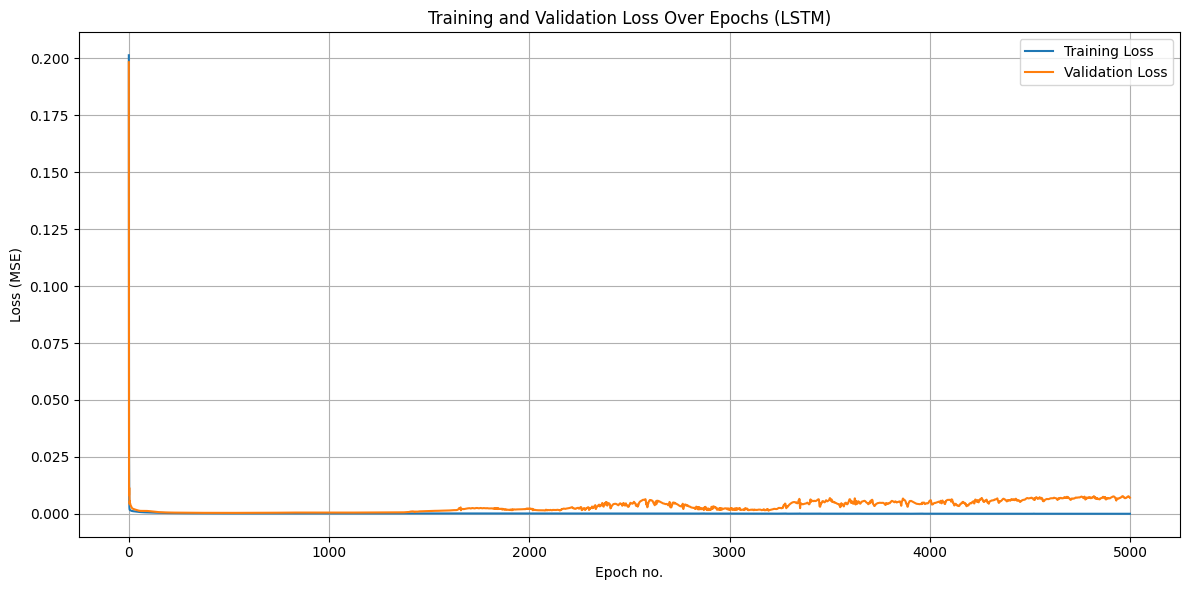


--- Starting Reinforcement Learning Fine-Tuning (Batched) ---
RL Epoch 1/200, Average Loss per Batch: 0.000060
RL Epoch 2/200, Average Loss per Batch: 0.000080
RL Epoch 3/200, Average Loss per Batch: 0.000091
RL Epoch 4/200, Average Loss per Batch: 0.000102
RL Epoch 5/200, Average Loss per Batch: 0.000102
RL Epoch 6/200, Average Loss per Batch: 0.000086
RL Epoch 7/200, Average Loss per Batch: 0.000076
RL Epoch 8/200, Average Loss per Batch: 0.000077
RL Epoch 9/200, Average Loss per Batch: 0.000080
RL Epoch 10/200, Average Loss per Batch: 0.000089
RL Epoch 11/200, Average Loss per Batch: 0.000083
RL Epoch 12/200, Average Loss per Batch: 0.000079
RL Epoch 13/200, Average Loss per Batch: 0.000071
RL Epoch 14/200, Average Loss per Batch: 0.000070
RL Epoch 15/200, Average Loss per Batch: 0.000064
RL Epoch 16/200, Average Loss per Batch: 0.000064
RL Epoch 17/200, Average Loss per Batch: 0.000060
RL Epoch 18/200, Average Loss per Batch: 0.000060
RL Epoch 19/200, Average Loss per Batch: 0.000

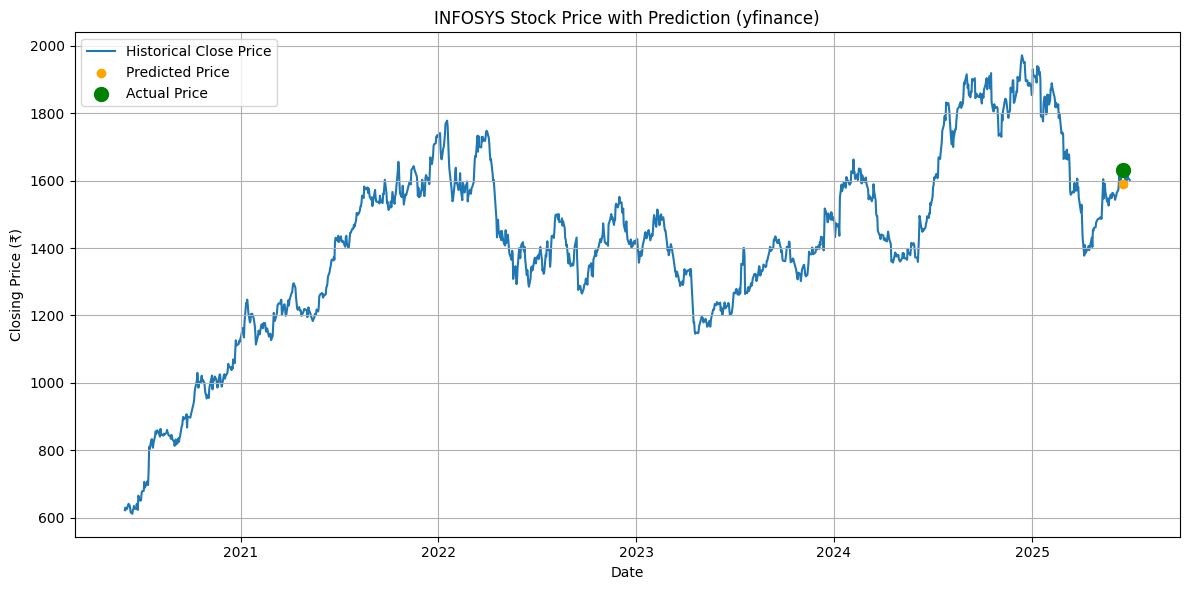


 Test Set Performance Metrics (LSTM):
 Mean Absolute Error (MAE) : ₹21.59
 Mean Squared Error (MSE)  : ₹754.42
 Root Squared Error (RMSE) : ₹27.47
 R² Score                  : 0.1152
 Mean Absolute Percentage Error (MAPE) : 1.34%
 Accuracy (100 - MAPE) : 98.66%
 MSE Percentage of Average Price: 47.26%
 MAE Percentage of Average Price: 1.35%


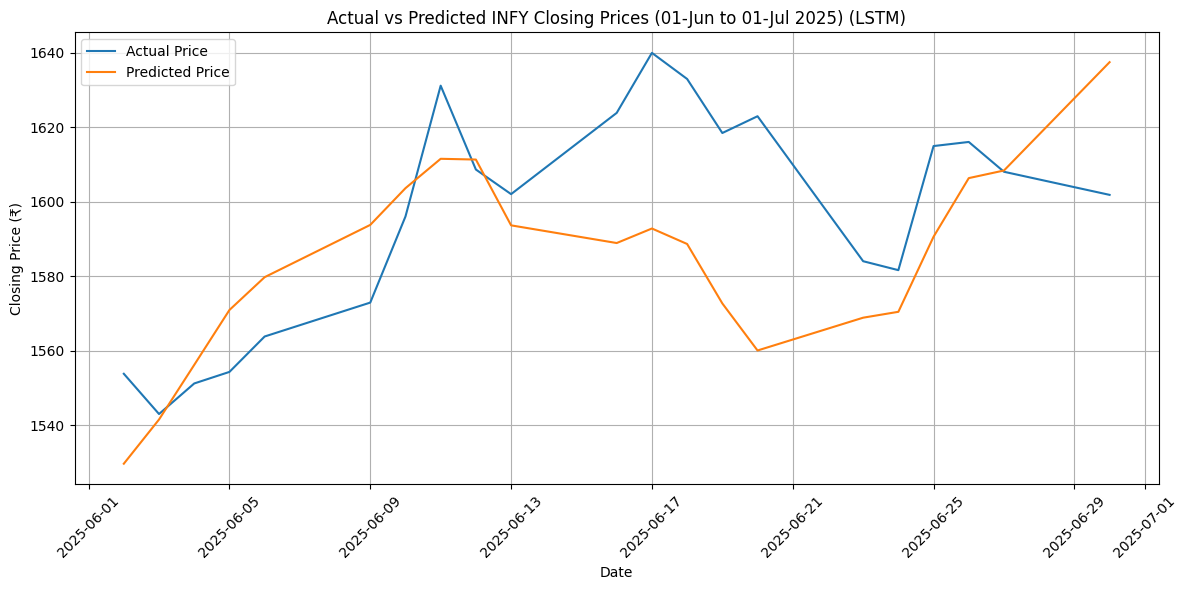

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import SimpleRNN, LSTM
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from matplotlib.dates import DateFormatter
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import numpy as np
import pandas as pd
import datetime
import holidays
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.filterwarnings('ignore')

# Set seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

SYMBOL = "INFY.NS"
SEQUENCE_LENGTH = 60

TRAIN_START_DATE = "2020-06-01"
TRAIN_END_DATE = "2025-05-31"

TEST_START_DATE = "2025-06-01"
TEST_END_DATE = "2025-07-01"

# Get Indian trading holidays
def get_nse_holidays():
    in_holidays = holidays.India(years=range(2020, 2026))
    return set(in_holidays.keys())

TRADING_HOLIDAYS = get_nse_holidays()

def is_valid_date(date_str):
    try:
        date = datetime.datetime.strptime(date_str, "%Y-%m-%d").date()
        if not (datetime.date(2025, 6, 1) <= date <= datetime.date(2025, 7, 1)):
            print("Date must be between 2025-06-01 and 2025-07-01.")
            return False
        if date.weekday() >= 5:
            print("Weekends are not trading days.")
            return False
        if date in TRADING_HOLIDAYS:
            print("Entered date is a trading holiday.")
            return False
        return True
    except ValueError:
        print("Invalid date format. Use YYYY-MM-DD.")
        return False

def get_stock_data():
    print("Fetching data from Yahoo Finance...")
    full_df = yf.download(SYMBOL, start=TRAIN_START_DATE, end=TEST_END_DATE)
    full_df = full_df[['Close']]
    full_df.dropna(inplace=True)
    full_df.index = pd.to_datetime(full_df.index)

    train_df = full_df.loc[TRAIN_START_DATE:TRAIN_END_DATE]
    test_df = full_df.loc[TEST_START_DATE:TEST_END_DATE]
    return train_df, test_df, full_df

# Prompt until valid date is entered
def get_user_date():
    while True:
        date_input = input("Enter a date (YYYY-MM-DD): ")
        if is_valid_date(date_input):
            return datetime.datetime.strptime(date_input, "%Y-%m-%d").date()

# Build the LSTM model
def build_model(input_shape, learning_rate=0.001): # Added learning_rate parameter
    model = Sequential()
    model.add(LSTM(units=50, activation='tanh', input_shape=input_shape))
    model.add(Dense(1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Reinforcement Learning Fine-Tuning
class RLAgent:
    """
    A simple RL Agent to fine-tune the RNN model.
    The "environment" is the time series data, and the "action" is the prediction.
    The reward is based on prediction accuracy.
    """
    def __init__(self, model, learning_rate=0.001):
        self.model = model
        self.optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    @tf.function
    def train_step(self, state, target):
        """
        Performs a single training step to fine-tune the model weights.
        """
        with tf.GradientTape() as tape:
            prediction = self.model(state, training=True)
            # Use Mean Squared Error directly as the loss to minimize
            loss = tf.reduce_mean(tf.square(tf.cast(target, tf.float32) - prediction))

        grads = tape.gradient(loss, self.model.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.model.trainable_variables))
        return loss # Return the mean loss for the batch


def fine_tune_with_rl(model, X_train, y_train, epochs=5, learning_rate=0.001, batch_size=32):
    """
    Fine- tunes the pre-trained RNN model using a simple reinforcement learning loop with batched data.
    """
    print("\n--- Starting Reinforcement Learning Fine-Tuning (Batched) ---")
    agent = RLAgent(model, learning_rate=learning_rate)

    # Create a TensorFlow Dataset and batch it
    dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    dataset = dataset.batch(batch_size)

    num_batches = tf.data.experimental.cardinality(dataset).numpy()

    for epoch in range(epochs):
        total_loss = 0
        batch_count = 0
        for batch_x, batch_y in dataset:
            # Ensure batch_x has the correct shape (batch_size, sequence_length, 1)
            batch_x_reshaped = tf.reshape(batch_x, (tf.shape(batch_x)[0], tf.shape(batch_x)[1], 1))
            loss = agent.train_step(batch_x_reshaped, batch_y)
            total_loss += loss.numpy() # Sum up the mean loss for each batch
            batch_count += 1

        # Calculate average loss per epoch
        average_epoch_loss = total_loss / num_batches if num_batches > 0 else 0
        print(f"RL Epoch {epoch + 1}/{epochs}, Average Loss per Batch: {average_epoch_loss:.6f}") # Print average loss

    print("--- RL Fine-Tuning Complete ---")
    return model


def create_test_sequences(train_df, test_df, scaler):
    combined = pd.concat([train_df, test_df])
    scaled = scaler.transform(combined[['Close']])
    X_test = []
    test_dates = test_df.index.date

    for i in range(len(train_df), len(combined)):
        if i - SEQUENCE_LENGTH < 0:
            continue
        seq = scaled[i - SEQUENCE_LENGTH:i]
        X_test.append(seq)

    X_test = np.array(X_test)
    return X_test, test_dates

def predict_price_on_test(model, full_df, scaler, user_date):
    all_dates = full_df.index.date
    try:
        idx = list(all_dates).index(user_date)
    except ValueError:
        print("User date not found in data.")
        return None, None, user_date

    if idx < SEQUENCE_LENGTH:
        print("Not enough data to predict for this date.")
        return None, None, user_date

    input_seq = scaler.transform(full_df[['Close']].values)[idx - SEQUENCE_LENGTH:idx]
    input_seq = np.reshape(input_seq, (1, SEQUENCE_LENGTH, 1))

    predicted_scaled = model.predict(input_seq, verbose=0)
    predicted_price = scaler.inverse_transform(predicted_scaled)[0][0]

    actual_price = float(full_df.iloc[idx]['Close']) if idx < len(full_df) else None
    return predicted_price, actual_price, full_df.index[idx].date()

# Plot the result
def plot_results(df, predicted_date, predicted_price, actual_price):
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='Historical Close Price',zorder=1)
    #plt.axvline(pd.to_datetime(predicted_date), color='red', linestyle='--', label='Predicted Date')
    plt.scatter(pd.to_datetime(predicted_date), predicted_price, color='orange', label='Predicted Price',zorder=2)
    if actual_price is not None:
        plt.scatter(pd.to_datetime(predicted_date), actual_price, color='green', label='Actual Price',zorder=3, s=100)
    plt.title("INFOSYS Stock Price with Prediction (yfinance)")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (₹)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#Plotting error with no. of epochs
def plot_training_loss(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title("Training and Validation Loss Over Epochs (LSTM)") # Changed title
    plt.xlabel("Epoch no.")
    plt.ylabel("Loss (MSE)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def main():
    print("=== INFOSYS LSTM Stock Price Predictor (Test Phase June–July 2025) ===") # Changed title
    user_date = get_user_date()

    # Step 1: Get stock data
    train_df, test_df, full_df = get_stock_data()

    # Step 2: Preprocess
    scaler = MinMaxScaler()
    scaled_train = scaler.fit_transform(train_df[['Close']])
    X, y = [], []
    for i in range(SEQUENCE_LENGTH, len(scaled_train)):
        X.append(scaled_train[i - SEQUENCE_LENGTH:i])
        y.append(scaled_train[i])
    X = np.array(X)
    y = np.array(y)

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)
    #early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    # Step 3: Build and train model
    model = build_model((X_train.shape[1], 1), learning_rate=0.0005) # Reduced Adam learning rate
    print("Training LSTM model...") # Changed print statement
    history = model.fit(X_train, y_train, epochs=5000, batch_size=64, validation_data=(X_val, y_val), verbose = 1) #callbacks = [early_stop], verbose=1)

    #print(f"\nBest weights restored from epoch: {early_stop.best_epoch + 1}")

    # Step 4: Plot training loss
    plot_training_loss(history)

    # Step 5: Fine-tune with Reinforcement Learning
    rl_tuned_model = fine_tune_with_rl(model, X_train, y_train, epochs=200, learning_rate=0.0001, batch_size=32)

    # Predict on training data to evaluate performance
    y_train_pred_scaled = rl_tuned_model.predict(X_train, verbose=0)
    y_train_pred = scaler.inverse_transform(y_train_pred_scaled)
    y_true_train = scaler.inverse_transform(y_train.reshape(-1, 1))

    # Calculate and print training metrics
    mae_train = mean_absolute_error(y_true_train, y_train_pred)
    mse_train = mean_squared_error(y_true_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_true_train, y_train_pred)
    mape_train = mean_absolute_percentage_error(y_true_train, y_train_pred) * 100
    accuracy_train = 100 - mape_train
    mse_percent_train = (mse_train / np.mean(y_true_train)) * 100 if np.mean(y_true_train) != 0 else np.nan
    mae_percent_train = (mae_train / np.mean(y_true_train)) * 100 if np.mean(y_true_train) != 0 else np.nan
    print("\n Training Set Performance Metrics (LSTM):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_train:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_train:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_train:.2f}")
    print(f" R² Score                  : {r2_train:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_train:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_train:.2f}%")
    print(f" MSE Percentage of Average Price : {mse_percent_train:.2f}%")
    print(f" MAE Percentage of Average Price : {mae_percent_train:.2f}%")

    # Predict on validation set
    y_val_pred_scaled = rl_tuned_model.predict(X_val, verbose=0)
    y_val_pred = scaler.inverse_transform(y_val_pred_scaled)
    y_val_true = scaler.inverse_transform(y_val.reshape(-1, 1))

    # Calculate and print validation metrics
    mae_val = mean_absolute_error(y_val_true, y_val_pred)
    mse_val = mean_squared_error(y_val_true, y_val_pred)
    rmse_val = np.sqrt(mse_val)
    r2_val = r2_score(y_val_true, y_val_pred)
    mape_val = mean_absolute_percentage_error(y_val_true, y_val_pred) * 100
    accuracy_val = 100 - mape_val
    mse_percent_val = (mse_val / np.mean(y_val_true)) * 100 if np.mean(y_val_true) != 0 else np.nan
    mae_percent_val = (mae_val / np.mean(y_val_true)) * 100 if np.mean(y_val_true) != 0 else np.nan
    print("\n Validation Set Performance Metrics (LSTM):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_val:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_val:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_val:.2f}")
    print(f" R² Score                  : {r2_val:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_val:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_val:.2f}%")
    print(f" MSE Percentage of Average Price: {mse_percent_val:.2f}%")
    print(f" MAE Percentage of Average Price: {mae_percent_val:.2f}%")


    # Step 6: Predict for user-input test date
    predicted_price, actual_price, predicted_date = predict_price_on_test(rl_tuned_model, full_df, scaler, user_date)
    if predicted_price is not None:
        print(f"\n Prediction for {predicted_date}:")
        print(f" Predicted Closing Price: ₹{predicted_price:.2f}")
        if actual_price is not None:
            print(f" Actual Closing Price   : ₹{actual_price}")
        else:
            print("Actual price not available.")

        plot_results(full_df, predicted_date, predicted_price, actual_price)
    else:
        print("❌ Unable to make prediction.")

    # === Step 7: Predict all test dates and compare ===

    # Reuse combined full_df
    combined_df = pd.concat([train_df, test_df])
    scaled_combined = scaler.transform(combined_df[['Close']])

    X_test_all = []
    test_date_indexes = []

    for i in range(len(train_df), len(combined_df)):
        if i - SEQUENCE_LENGTH < 0:
            continue
        seq = scaled_combined[i - SEQUENCE_LENGTH:i]
        X_test_all.append(seq)
        test_date_indexes.append(combined_df.index[i])

    X_test_all = np.array(X_test_all)

    # Predict on test sequences
    y_test_pred_scaled = rl_tuned_model.predict(X_test_all, verbose=0)
    y_test_pred = scaler.inverse_transform(y_test_pred_scaled)

    # Actual prices
    y_test_true = test_df.loc[test_date_indexes, 'Close'].values

    # Calculate and print test metrics
    mae_test = mean_absolute_error(y_test_true, y_test_pred)
    mse_test = mean_squared_error(y_test_true, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test_true, y_test_pred)
    mape_test = mean_absolute_percentage_error(y_test_true, y_test_pred) * 100
    accuracy_test = 100 - mape_test
    mse_percent_test = (mse_test / np.mean(y_test_true)) * 100 if np.mean(y_test_true) != 0 else np.nan
    mae_percent_test = (mae_test / np.mean(y_test_true)) * 100 if np.mean(y_test_true) != 0 else np.nan
    print("\n Test Set Performance Metrics (LSTM):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_test:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_test:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_test:.2f}")
    print(f" R² Score                  : {r2_test:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_test:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_test:.2f}%")
    print(f" MSE Percentage of Average Price: {mse_percent_test:.2f}%")
    print(f" MAE Percentage of Average Price: {mae_percent_test:.2f}%")

    # Plot actual vs predicted
    plt.figure(figsize=(12, 6))
    plt.plot(test_date_indexes, y_test_true, label='Actual Price')
    plt.plot(test_date_indexes, y_test_pred, label='Predicted Price')
    plt.title("Actual vs Predicted INFY Closing Prices (01-Jun to 01-Jul 2025) (LSTM)")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (₹)")
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

# **7000 epochs**

=== INFOSYS LSTM Stock Price Predictor (Test Phase June–July 2025) ===
Fetching data from Yahoo Finance...


[*********************100%***********************]  1 of 1 completed


Streaming output truncated to the last 5000 lines.
Epoch 4501/7000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 9.5826e-05 - val_loss: 0.0076
Epoch 4502/7000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 8.9270e-05 - val_loss: 0.0076
Epoch 4503/7000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.0955e-05 - val_loss: 0.0073
Epoch 4504/7000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.9066e-05 - val_loss: 0.0072
Epoch 4505/7000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 8.0530e-05 - val_loss: 0.0078
Epoch 4506/7000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.3227e-05 - val_loss: 0.0090
Epoch 4507/7000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.6314e-05 - val_loss: 0.0082
Epoch 4508/7000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.5751e-05 - val_loss: 0.0076
Epoch 4509/7000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 8.8989e-05 - val_loss: 0.0079
Epoch 4510/7000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.4760e-05 - val_loss: 0.0086
Epoch 451

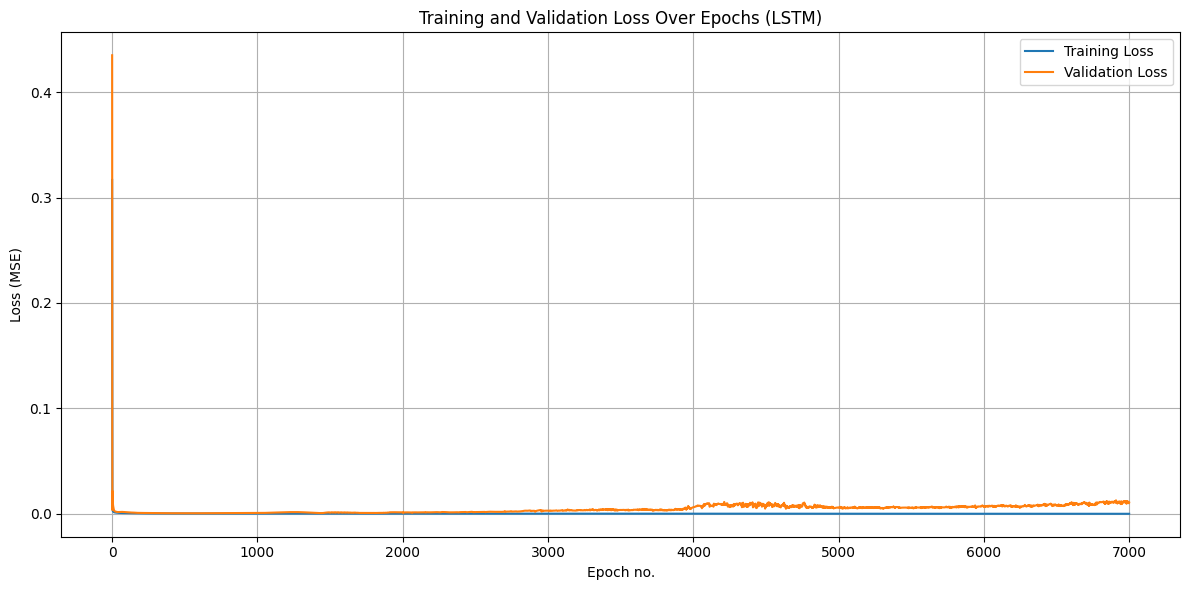


--- Starting Reinforcement Learning Fine-Tuning (Batched) ---
RL Epoch 1/150, Average Loss per Batch: 0.000035
RL Epoch 2/150, Average Loss per Batch: 0.000050
RL Epoch 3/150, Average Loss per Batch: 0.000049
RL Epoch 4/150, Average Loss per Batch: 0.000043
RL Epoch 5/150, Average Loss per Batch: 0.000043
RL Epoch 6/150, Average Loss per Batch: 0.000039
RL Epoch 7/150, Average Loss per Batch: 0.000041
RL Epoch 8/150, Average Loss per Batch: 0.000041
RL Epoch 9/150, Average Loss per Batch: 0.000039
RL Epoch 10/150, Average Loss per Batch: 0.000038
RL Epoch 11/150, Average Loss per Batch: 0.000040
RL Epoch 12/150, Average Loss per Batch: 0.000038
RL Epoch 13/150, Average Loss per Batch: 0.000043
RL Epoch 14/150, Average Loss per Batch: 0.000040
RL Epoch 15/150, Average Loss per Batch: 0.000043
RL Epoch 16/150, Average Loss per Batch: 0.000040
RL Epoch 17/150, Average Loss per Batch: 0.000042
RL Epoch 18/150, Average Loss per Batch: 0.000040
RL Epoch 19/150, Average Loss per Batch: 0.000

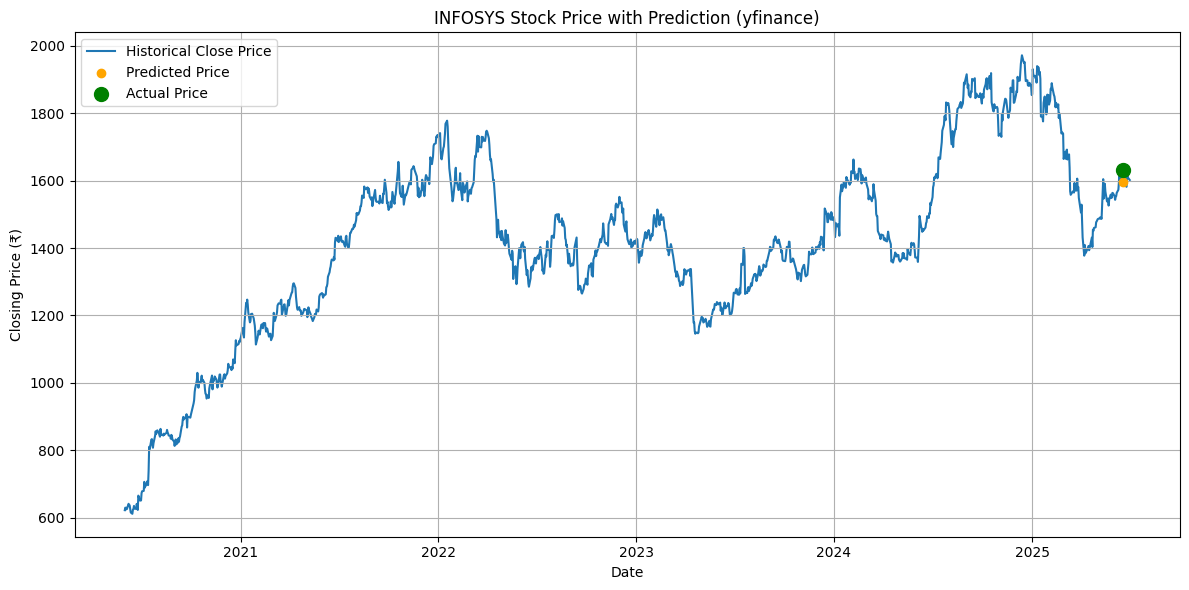


 Test Set Performance Metrics (LSTM):
 Mean Absolute Error (MAE) : ₹30.69
 Mean Squared Error (MSE)  : ₹1303.05
 Root Squared Error (RMSE) : ₹36.10
 R² Score                  : -0.5283
 Mean Absolute Percentage Error (MAPE) : 1.91%
 Accuracy (100 - MAPE) : 98.09%
 MSE Percentage of Average Price: 81.63%
 MAE Percentage of Average Price: 1.92%


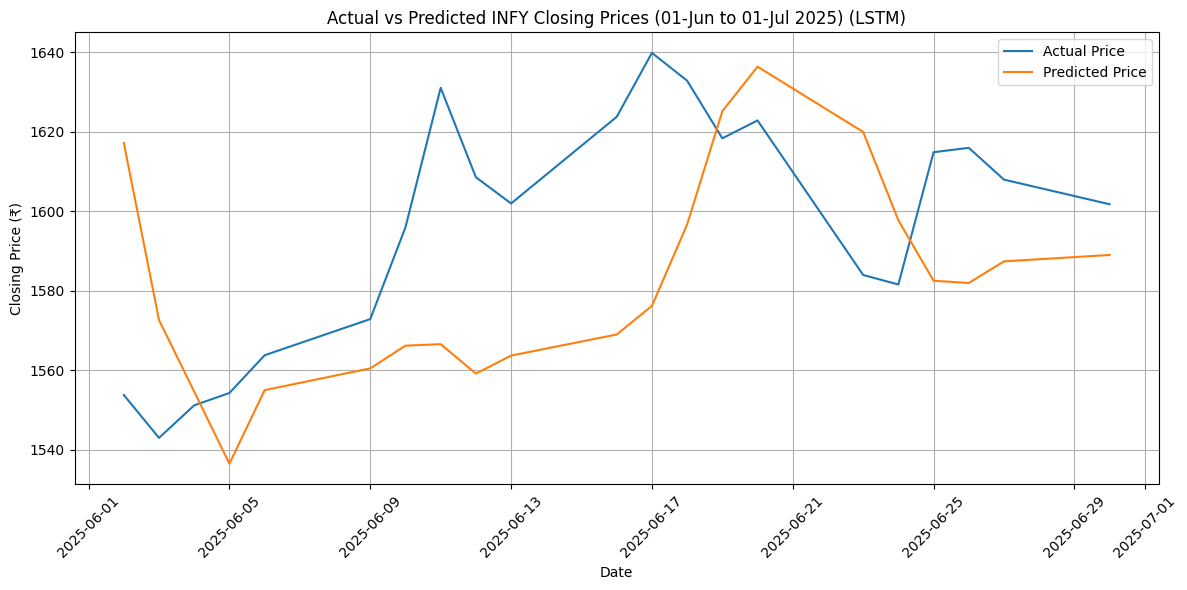

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import SimpleRNN, LSTM
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from matplotlib.dates import DateFormatter
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import numpy as np
import pandas as pd
import datetime
import holidays
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.filterwarnings('ignore')

# Set seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

SYMBOL = "INFY.NS"
SEQUENCE_LENGTH = 60

TRAIN_START_DATE = "2020-06-01"
TRAIN_END_DATE = "2025-05-31"

TEST_START_DATE = "2025-06-01"
TEST_END_DATE = "2025-07-01"

# Get Indian trading holidays
def get_nse_holidays():
    in_holidays = holidays.India(years=range(2020, 2026))
    return set(in_holidays.keys())

TRADING_HOLIDAYS = get_nse_holidays()

def is_valid_date(date_str):
    try:
        date = datetime.datetime.strptime(date_str, "%Y-%m-%d").date()
        if not (datetime.date(2025, 6, 1) <= date <= datetime.date(2025, 7, 1)):
            print("Date must be between 2025-06-01 and 2025-07-01.")
            return False
        if date.weekday() >= 5:
            print("Weekends are not trading days.")
            return False
        if date in TRADING_HOLIDAYS:
            print("Entered date is a trading holiday.")
            return False
        return True
    except ValueError:
        print("Invalid date format. Use YYYY-MM-DD.")
        return False

def get_stock_data():
    print("Fetching data from Yahoo Finance...")
    full_df = yf.download(SYMBOL, start=TRAIN_START_DATE, end=TEST_END_DATE)
    full_df = full_df[['Close']]
    full_df.dropna(inplace=True)
    full_df.index = pd.to_datetime(full_df.index)

    train_df = full_df.loc[TRAIN_START_DATE:TRAIN_END_DATE]
    test_df = full_df.loc[TEST_START_DATE:TEST_END_DATE]
    return train_df, test_df, full_df

# Prompt until valid date is entered
def get_user_date():
    while True:
        date_input = input("Enter a date (YYYY-MM-DD): ")
        if is_valid_date(date_input):
            return datetime.datetime.strptime(date_input, "%Y-%m-%d").date()

# Build the LSTM model
def build_model(input_shape, learning_rate=0.001): # Added learning_rate parameter
    model = Sequential()
    model.add(LSTM(units=50, activation='tanh', input_shape=input_shape))
    model.add(Dense(1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Reinforcement Learning Fine-Tuning
class RLAgent:
    """
    A simple RL Agent to fine-tune the RNN model.
    The "environment" is the time series data, and the "action" is the prediction.
    The reward is based on prediction accuracy.
    """
    def __init__(self, model, learning_rate=0.001):
        self.model = model
        self.optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    @tf.function
    def train_step(self, state, target):
        """
        Performs a single training step to fine-tune the model weights.
        """
        with tf.GradientTape() as tape:
            prediction = self.model(state, training=True)
            # Use Mean Squared Error directly as the loss to minimize
            loss = tf.reduce_mean(tf.square(tf.cast(target, tf.float32) - prediction))

        grads = tape.gradient(loss, self.model.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.model.trainable_variables))
        return loss # Return the mean loss for the batch


def fine_tune_with_rl(model, X_train, y_train, epochs=5, learning_rate=0.001, batch_size=32):
    """
    Fine- tunes the pre-trained RNN model using a simple reinforcement learning loop with batched data.
    """
    print("\n--- Starting Reinforcement Learning Fine-Tuning (Batched) ---")
    agent = RLAgent(model, learning_rate=learning_rate)

    # Create a TensorFlow Dataset and batch it
    dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    dataset = dataset.batch(batch_size)

    num_batches = tf.data.experimental.cardinality(dataset).numpy()

    for epoch in range(epochs):
        total_loss = 0
        batch_count = 0
        for batch_x, batch_y in dataset:
            # Ensure batch_x has the correct shape (batch_size, sequence_length, 1)
            batch_x_reshaped = tf.reshape(batch_x, (tf.shape(batch_x)[0], tf.shape(batch_x)[1], 1))
            loss = agent.train_step(batch_x_reshaped, batch_y)
            total_loss += loss.numpy() # Sum up the mean loss for each batch
            batch_count += 1

        # Calculate average loss per epoch
        average_epoch_loss = total_loss / num_batches if num_batches > 0 else 0
        print(f"RL Epoch {epoch + 1}/{epochs}, Average Loss per Batch: {average_epoch_loss:.6f}") # Print average loss

    print("--- RL Fine-Tuning Complete ---")
    return model


def create_test_sequences(train_df, test_df, scaler):
    combined = pd.concat([train_df, test_df])
    scaled = scaler.transform(combined[['Close']])
    X_test = []
    test_dates = test_df.index.date

    for i in range(len(train_df), len(combined)):
        if i - SEQUENCE_LENGTH < 0:
            continue
        seq = scaled[i - SEQUENCE_LENGTH:i]
        X_test.append(seq)

    X_test = np.array(X_test)
    return X_test, test_dates

def predict_price_on_test(model, full_df, scaler, user_date):
    all_dates = full_df.index.date
    try:
        idx = list(all_dates).index(user_date)
    except ValueError:
        print("User date not found in data.")
        return None, None, user_date

    if idx < SEQUENCE_LENGTH:
        print("Not enough data to predict for this date.")
        return None, None, user_date

    input_seq = scaler.transform(full_df[['Close']].values)[idx - SEQUENCE_LENGTH:idx]
    input_seq = np.reshape(input_seq, (1, SEQUENCE_LENGTH, 1))

    predicted_scaled = model.predict(input_seq, verbose=0)
    predicted_price = scaler.inverse_transform(predicted_scaled)[0][0]

    actual_price = float(full_df.iloc[idx]['Close']) if idx < len(full_df) else None
    return predicted_price, actual_price, full_df.index[idx].date()

# Plot the result
def plot_results(df, predicted_date, predicted_price, actual_price):
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='Historical Close Price',zorder=1)
    #plt.axvline(pd.to_datetime(predicted_date), color='red', linestyle='--', label='Predicted Date')
    plt.scatter(pd.to_datetime(predicted_date), predicted_price, color='orange', label='Predicted Price',zorder=2)
    if actual_price is not None:
        plt.scatter(pd.to_datetime(predicted_date), actual_price, color='green', label='Actual Price',zorder=3, s=100)
    plt.title("INFOSYS Stock Price with Prediction (yfinance)")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (₹)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#Plotting error with no. of epochs
def plot_training_loss(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title("Training and Validation Loss Over Epochs (LSTM)") # Changed title
    plt.xlabel("Epoch no.")
    plt.ylabel("Loss (MSE)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def main():
    print("=== INFOSYS LSTM Stock Price Predictor (Test Phase June–July 2025) ===") # Changed title
    user_date = get_user_date()

    # Step 1: Get stock data
    train_df, test_df, full_df = get_stock_data()

    # Step 2: Preprocess
    scaler = MinMaxScaler()
    scaled_train = scaler.fit_transform(train_df[['Close']])
    X, y = [], []
    for i in range(SEQUENCE_LENGTH, len(scaled_train)):
        X.append(scaled_train[i - SEQUENCE_LENGTH:i])
        y.append(scaled_train[i])
    X = np.array(X)
    y = np.array(y)

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)
    #early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    # Step 3: Build and train model
    model = build_model((X_train.shape[1], 1), learning_rate=0.0005) # Reduced Adam learning rate
    print("Training LSTM model...") # Changed print statement
    history = model.fit(X_train, y_train, epochs=7000, batch_size=64, validation_data=(X_val, y_val), verbose = 1) #callbacks = [early_stop], verbose=1)

    #print(f"\nBest weights restored from epoch: {early_stop.best_epoch + 1}")

    # Step 4: Plot training loss
    plot_training_loss(history)

    # Step 5: Fine-tune with Reinforcement Learning
    rl_tuned_model = fine_tune_with_rl(model, X_train, y_train, epochs=150, learning_rate=0.0001, batch_size=32)

    # Predict on training data to evaluate performance
    y_train_pred_scaled = rl_tuned_model.predict(X_train, verbose=0)
    y_train_pred = scaler.inverse_transform(y_train_pred_scaled)
    y_true_train = scaler.inverse_transform(y_train.reshape(-1, 1))

    # Calculate and print training metrics
    mae_train = mean_absolute_error(y_true_train, y_train_pred)
    mse_train = mean_squared_error(y_true_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_true_train, y_train_pred)
    mape_train = mean_absolute_percentage_error(y_true_train, y_train_pred) * 100
    accuracy_train = 100 - mape_train
    mse_percent_train = (mse_train / np.mean(y_true_train)) * 100 if np.mean(y_true_train) != 0 else np.nan
    mae_percent_train = (mae_train / np.mean(y_true_train)) * 100 if np.mean(y_true_train) != 0 else np.nan
    print("\n Training Set Performance Metrics (LSTM):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_train:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_train:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_train:.2f}")
    print(f" R² Score                  : {r2_train:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_train:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_train:.2f}%")
    print(f" MSE Percentage of Average Price : {mse_percent_train:.2f}%")
    print(f" MAE Percentage of Average Price : {mae_percent_train:.2f}%")

    # Predict on validation set
    y_val_pred_scaled = rl_tuned_model.predict(X_val, verbose=0)
    y_val_pred = scaler.inverse_transform(y_val_pred_scaled)
    y_val_true = scaler.inverse_transform(y_val.reshape(-1, 1))

    # Calculate and print validation metrics
    mae_val = mean_absolute_error(y_val_true, y_val_pred)
    mse_val = mean_squared_error(y_val_true, y_val_pred)
    rmse_val = np.sqrt(mse_val)
    r2_val = r2_score(y_val_true, y_val_pred)
    mape_val = mean_absolute_percentage_error(y_val_true, y_val_pred) * 100
    accuracy_val = 100 - mape_val
    mse_percent_val = (mse_val / np.mean(y_val_true)) * 100 if np.mean(y_val_true) != 0 else np.nan
    mae_percent_val = (mae_val / np.mean(y_val_true)) * 100 if np.mean(y_val_true) != 0 else np.nan
    print("\n Validation Set Performance Metrics (LSTM):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_val:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_val:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_val:.2f}")
    print(f" R² Score                  : {r2_val:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_val:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_val:.2f}%")
    print(f" MSE Percentage of Average Price: {mse_percent_val:.2f}%")
    print(f" MAE Percentage of Average Price: {mae_percent_val:.2f}%")


    # Step 6: Predict for user-input test date
    predicted_price, actual_price, predicted_date = predict_price_on_test(rl_tuned_model, full_df, scaler, user_date)
    if predicted_price is not None:
        print(f"\n Prediction for {predicted_date}:")
        print(f" Predicted Closing Price: ₹{predicted_price:.2f}")
        if actual_price is not None:
            print(f" Actual Closing Price   : ₹{actual_price}")
        else:
            print("Actual price not available.")

        plot_results(full_df, predicted_date, predicted_price, actual_price)
    else:
        print("❌ Unable to make prediction.")

    # === Step 7: Predict all test dates and compare ===

    # Reuse combined full_df
    combined_df = pd.concat([train_df, test_df])
    scaled_combined = scaler.transform(combined_df[['Close']])

    X_test_all = []
    test_date_indexes = []

    for i in range(len(train_df), len(combined_df)):
        if i - SEQUENCE_LENGTH < 0:
            continue
        seq = scaled_combined[i - SEQUENCE_LENGTH:i]
        X_test_all.append(seq)
        test_date_indexes.append(combined_df.index[i])

    X_test_all = np.array(X_test_all)

    # Predict on test sequences
    y_test_pred_scaled = rl_tuned_model.predict(X_test_all, verbose=0)
    y_test_pred = scaler.inverse_transform(y_test_pred_scaled)

    # Actual prices
    y_test_true = test_df.loc[test_date_indexes, 'Close'].values

    # Calculate and print test metrics
    mae_test = mean_absolute_error(y_test_true, y_test_pred)
    mse_test = mean_squared_error(y_test_true, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test_true, y_test_pred)
    mape_test = mean_absolute_percentage_error(y_test_true, y_test_pred) * 100
    accuracy_test = 100 - mape_test
    mse_percent_test = (mse_test / np.mean(y_test_true)) * 100 if np.mean(y_test_true) != 0 else np.nan
    mae_percent_test = (mae_test / np.mean(y_test_true)) * 100 if np.mean(y_test_true) != 0 else np.nan
    print("\n Test Set Performance Metrics (LSTM):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_test:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_test:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_test:.2f}")
    print(f" R² Score                  : {r2_test:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_test:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_test:.2f}%")
    print(f" MSE Percentage of Average Price: {mse_percent_test:.2f}%")
    print(f" MAE Percentage of Average Price: {mae_percent_test:.2f}%")

    # Plot actual vs predicted
    plt.figure(figsize=(12, 6))
    plt.plot(test_date_indexes, y_test_true, label='Actual Price')
    plt.plot(test_date_indexes, y_test_pred, label='Predicted Price')
    plt.title("Actual vs Predicted INFY Closing Prices (01-Jun to 01-Jul 2025) (LSTM)")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (₹)")
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

=== INFOSYS LSTM Stock Price Predictor (Test Phase June–July 2025) ===
Fetching data from Yahoo Finance...


[*********************100%***********************]  1 of 1 completed


Streaming output truncated to the last 5000 lines.
Epoch 4501/7000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 1.0096e-04 - val_loss: 0.0116
Epoch 4502/7000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 1.0204e-04 - val_loss: 0.0104
Epoch 4503/7000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 1.0250e-04 - val_loss: 0.0111
Epoch 4504/7000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 1.0014e-04 - val_loss: 0.0118
Epoch 4505/7000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 1.0148e-04 - val_loss: 0.0109
Epoch 4506/7000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 1.0256e-04 - val_loss: 0.0117
Epoch 4507/7000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 1.0450e-04 - val_loss: 0.0118
Epoch 4508/7000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 1.0884e-04 - val_loss: 0.0119
Epoch 4509/7000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 1.1222e-04 - val_loss: 0.0110
Epoch 4510/7000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 1.1024e-04 - val_loss: 0.0108
Epoch 451

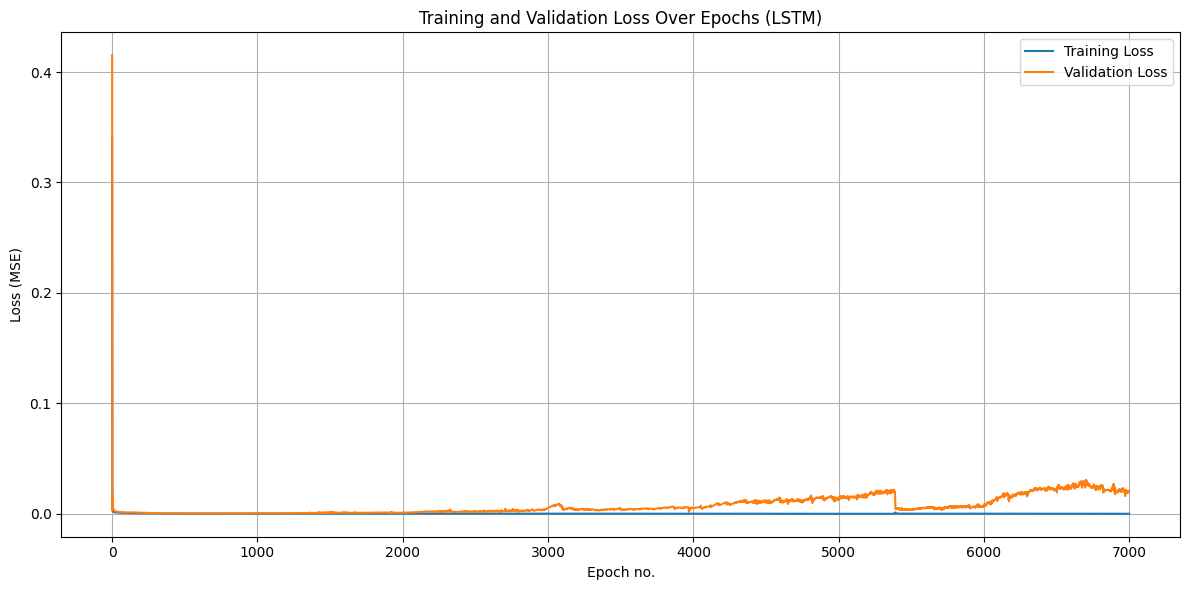


--- Starting Reinforcement Learning Fine-Tuning (Batched) ---
RL Epoch 1/200, Average Loss per Batch: 0.000084
RL Epoch 2/200, Average Loss per Batch: 0.000093
RL Epoch 3/200, Average Loss per Batch: 0.000104
RL Epoch 4/200, Average Loss per Batch: 0.000112
RL Epoch 5/200, Average Loss per Batch: 0.000119
RL Epoch 6/200, Average Loss per Batch: 0.000111
RL Epoch 7/200, Average Loss per Batch: 0.000116
RL Epoch 8/200, Average Loss per Batch: 0.000106
RL Epoch 9/200, Average Loss per Batch: 0.000102
RL Epoch 10/200, Average Loss per Batch: 0.000105
RL Epoch 11/200, Average Loss per Batch: 0.000085
RL Epoch 12/200, Average Loss per Batch: 0.000080
RL Epoch 13/200, Average Loss per Batch: 0.000079
RL Epoch 14/200, Average Loss per Batch: 0.000078
RL Epoch 15/200, Average Loss per Batch: 0.000078
RL Epoch 16/200, Average Loss per Batch: 0.000081
RL Epoch 17/200, Average Loss per Batch: 0.000081
RL Epoch 18/200, Average Loss per Batch: 0.000087
RL Epoch 19/200, Average Loss per Batch: 0.000

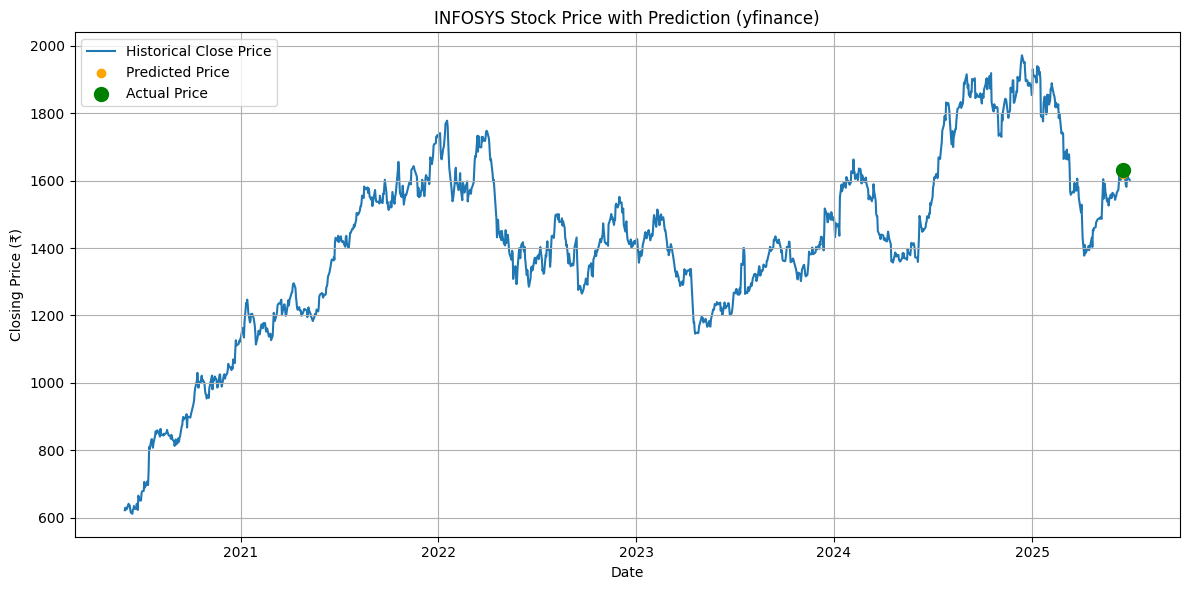


 Test Set Performance Metrics (LSTM):
 Mean Absolute Error (MAE) : ₹29.82
 Mean Squared Error (MSE)  : ₹1316.97
 Root Squared Error (RMSE) : ₹36.29
 R² Score                  : -0.5446
 Mean Absolute Percentage Error (MAPE) : 1.87%
 Accuracy (100 - MAPE) : 98.13%
 MSE Percentage of Average Price: 82.50%
 MAE Percentage of Average Price: 1.87%


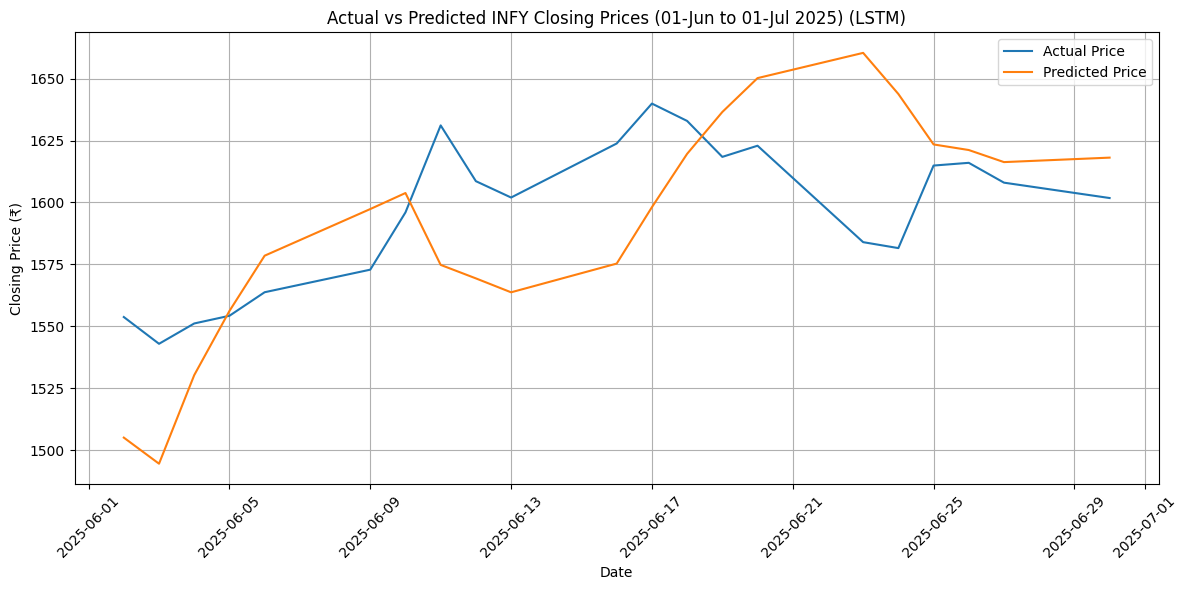

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import SimpleRNN, LSTM
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from matplotlib.dates import DateFormatter
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import numpy as np
import pandas as pd
import datetime
import holidays
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.filterwarnings('ignore')

# Set seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

SYMBOL = "INFY.NS"
SEQUENCE_LENGTH = 60

TRAIN_START_DATE = "2020-06-01"
TRAIN_END_DATE = "2025-05-31"

TEST_START_DATE = "2025-06-01"
TEST_END_DATE = "2025-07-01"

# Get Indian trading holidays
def get_nse_holidays():
    in_holidays = holidays.India(years=range(2020, 2026))
    return set(in_holidays.keys())

TRADING_HOLIDAYS = get_nse_holidays()

def is_valid_date(date_str):
    try:
        date = datetime.datetime.strptime(date_str, "%Y-%m-%d").date()
        if not (datetime.date(2025, 6, 1) <= date <= datetime.date(2025, 7, 1)):
            print("Date must be between 2025-06-01 and 2025-07-01.")
            return False
        if date.weekday() >= 5:
            print("Weekends are not trading days.")
            return False
        if date in TRADING_HOLIDAYS:
            print("Entered date is a trading holiday.")
            return False
        return True
    except ValueError:
        print("Invalid date format. Use YYYY-MM-DD.")
        return False

def get_stock_data():
    print("Fetching data from Yahoo Finance...")
    full_df = yf.download(SYMBOL, start=TRAIN_START_DATE, end=TEST_END_DATE)
    full_df = full_df[['Close']]
    full_df.dropna(inplace=True)
    full_df.index = pd.to_datetime(full_df.index)

    train_df = full_df.loc[TRAIN_START_DATE:TRAIN_END_DATE]
    test_df = full_df.loc[TEST_START_DATE:TEST_END_DATE]
    return train_df, test_df, full_df

# Prompt until valid date is entered
def get_user_date():
    while True:
        date_input = input("Enter a date (YYYY-MM-DD): ")
        if is_valid_date(date_input):
            return datetime.datetime.strptime(date_input, "%Y-%m-%d").date()

# Build the LSTM model
def build_model(input_shape, learning_rate=0.001): # Added learning_rate parameter
    model = Sequential()
    model.add(LSTM(units=50, activation='tanh', input_shape=input_shape))
    model.add(Dense(1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Reinforcement Learning Fine-Tuning
class RLAgent:
    """
    A simple RL Agent to fine-tune the RNN model.
    The "environment" is the time series data, and the "action" is the prediction.
    The reward is based on prediction accuracy.
    """
    def __init__(self, model, learning_rate=0.001):
        self.model = model
        self.optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    @tf.function
    def train_step(self, state, target):
        """
        Performs a single training step to fine-tune the model weights.
        """
        with tf.GradientTape() as tape:
            prediction = self.model(state, training=True)
            # Use Mean Squared Error directly as the loss to minimize
            loss = tf.reduce_mean(tf.square(tf.cast(target, tf.float32) - prediction))

        grads = tape.gradient(loss, self.model.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.model.trainable_variables))
        return loss # Return the mean loss for the batch


def fine_tune_with_rl(model, X_train, y_train, epochs=5, learning_rate=0.001, batch_size=32):
    """
    Fine- tunes the pre-trained RNN model using a simple reinforcement learning loop with batched data.
    """
    print("\n--- Starting Reinforcement Learning Fine-Tuning (Batched) ---")
    agent = RLAgent(model, learning_rate=learning_rate)

    # Create a TensorFlow Dataset and batch it
    dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    dataset = dataset.batch(batch_size)

    num_batches = tf.data.experimental.cardinality(dataset).numpy()

    for epoch in range(epochs):
        total_loss = 0
        batch_count = 0
        for batch_x, batch_y in dataset:
            # Ensure batch_x has the correct shape (batch_size, sequence_length, 1)
            batch_x_reshaped = tf.reshape(batch_x, (tf.shape(batch_x)[0], tf.shape(batch_x)[1], 1))
            loss = agent.train_step(batch_x_reshaped, batch_y)
            total_loss += loss.numpy() # Sum up the mean loss for each batch
            batch_count += 1

        # Calculate average loss per epoch
        average_epoch_loss = total_loss / num_batches if num_batches > 0 else 0
        print(f"RL Epoch {epoch + 1}/{epochs}, Average Loss per Batch: {average_epoch_loss:.6f}") # Print average loss

    print("--- RL Fine-Tuning Complete ---")
    return model


def create_test_sequences(train_df, test_df, scaler):
    combined = pd.concat([train_df, test_df])
    scaled = scaler.transform(combined[['Close']])
    X_test = []
    test_dates = test_df.index.date

    for i in range(len(train_df), len(combined)):
        if i - SEQUENCE_LENGTH < 0:
            continue
        seq = scaled[i - SEQUENCE_LENGTH:i]
        X_test.append(seq)

    X_test = np.array(X_test)
    return X_test, test_dates

def predict_price_on_test(model, full_df, scaler, user_date):
    all_dates = full_df.index.date
    try:
        idx = list(all_dates).index(user_date)
    except ValueError:
        print("User date not found in data.")
        return None, None, user_date

    if idx < SEQUENCE_LENGTH:
        print("Not enough data to predict for this date.")
        return None, None, user_date

    input_seq = scaler.transform(full_df[['Close']].values)[idx - SEQUENCE_LENGTH:idx]
    input_seq = np.reshape(input_seq, (1, SEQUENCE_LENGTH, 1))

    predicted_scaled = model.predict(input_seq, verbose=0)
    predicted_price = scaler.inverse_transform(predicted_scaled)[0][0]

    actual_price = float(full_df.iloc[idx]['Close']) if idx < len(full_df) else None
    return predicted_price, actual_price, full_df.index[idx].date()

# Plot the result
def plot_results(df, predicted_date, predicted_price, actual_price):
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='Historical Close Price',zorder=1)
    #plt.axvline(pd.to_datetime(predicted_date), color='red', linestyle='--', label='Predicted Date')
    plt.scatter(pd.to_datetime(predicted_date), predicted_price, color='orange', label='Predicted Price',zorder=2)
    if actual_price is not None:
        plt.scatter(pd.to_datetime(predicted_date), actual_price, color='green', label='Actual Price',zorder=3, s=100)
    plt.title("INFOSYS Stock Price with Prediction (yfinance)")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (₹)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#Plotting error with no. of epochs
def plot_training_loss(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title("Training and Validation Loss Over Epochs (LSTM)") # Changed title
    plt.xlabel("Epoch no.")
    plt.ylabel("Loss (MSE)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def main():
    print("=== INFOSYS LSTM Stock Price Predictor (Test Phase June–July 2025) ===") # Changed title
    user_date = get_user_date()

    # Step 1: Get stock data
    train_df, test_df, full_df = get_stock_data()

    # Step 2: Preprocess
    scaler = MinMaxScaler()
    scaled_train = scaler.fit_transform(train_df[['Close']])
    X, y = [], []
    for i in range(SEQUENCE_LENGTH, len(scaled_train)):
        X.append(scaled_train[i - SEQUENCE_LENGTH:i])
        y.append(scaled_train[i])
    X = np.array(X)
    y = np.array(y)

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)
    #early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    # Step 3: Build and train model
    model = build_model((X_train.shape[1], 1), learning_rate=0.0005) # Reduced Adam learning rate
    print("Training LSTM model...") # Changed print statement
    history = model.fit(X_train, y_train, epochs=7000, batch_size=64, validation_data=(X_val, y_val), verbose = 1) #callbacks = [early_stop], verbose=1)

    #print(f"\nBest weights restored from epoch: {early_stop.best_epoch + 1}")

    # Step 4: Plot training loss
    plot_training_loss(history)

    # Step 5: Fine-tune with Reinforcement Learning
    rl_tuned_model = fine_tune_with_rl(model, X_train, y_train, epochs=200, learning_rate=0.0001, batch_size=32)

    # Predict on training data to evaluate performance
    y_train_pred_scaled = rl_tuned_model.predict(X_train, verbose=0)
    y_train_pred = scaler.inverse_transform(y_train_pred_scaled)
    y_true_train = scaler.inverse_transform(y_train.reshape(-1, 1))

    # Calculate and print training metrics
    mae_train = mean_absolute_error(y_true_train, y_train_pred)
    mse_train = mean_squared_error(y_true_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_true_train, y_train_pred)
    mape_train = mean_absolute_percentage_error(y_true_train, y_train_pred) * 100
    accuracy_train = 100 - mape_train
    mse_percent_train = (mse_train / np.mean(y_true_train)) * 100 if np.mean(y_true_train) != 0 else np.nan
    mae_percent_train = (mae_train / np.mean(y_true_train)) * 100 if np.mean(y_true_train) != 0 else np.nan
    print("\n Training Set Performance Metrics (LSTM):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_train:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_train:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_train:.2f}")
    print(f" R² Score                  : {r2_train:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_train:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_train:.2f}%")
    print(f" MSE Percentage of Average Price : {mse_percent_train:.2f}%")
    print(f" MAE Percentage of Average Price : {mae_percent_train:.2f}%")

    # Predict on validation set
    y_val_pred_scaled = rl_tuned_model.predict(X_val, verbose=0)
    y_val_pred = scaler.inverse_transform(y_val_pred_scaled)
    y_val_true = scaler.inverse_transform(y_val.reshape(-1, 1))

    # Calculate and print validation metrics
    mae_val = mean_absolute_error(y_val_true, y_val_pred)
    mse_val = mean_squared_error(y_val_true, y_val_pred)
    rmse_val = np.sqrt(mse_val)
    r2_val = r2_score(y_val_true, y_val_pred)
    mape_val = mean_absolute_percentage_error(y_val_true, y_val_pred) * 100
    accuracy_val = 100 - mape_val
    mse_percent_val = (mse_val / np.mean(y_val_true)) * 100 if np.mean(y_val_true) != 0 else np.nan
    mae_percent_val = (mae_val / np.mean(y_val_true)) * 100 if np.mean(y_val_true) != 0 else np.nan
    print("\n Validation Set Performance Metrics (LSTM):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_val:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_val:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_val:.2f}")
    print(f" R² Score                  : {r2_val:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_val:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_val:.2f}%")
    print(f" MSE Percentage of Average Price: {mse_percent_val:.2f}%")
    print(f" MAE Percentage of Average Price: {mae_percent_val:.2f}%")


    # Step 6: Predict for user-input test date
    predicted_price, actual_price, predicted_date = predict_price_on_test(rl_tuned_model, full_df, scaler, user_date)
    if predicted_price is not None:
        print(f"\n Prediction for {predicted_date}:")
        print(f" Predicted Closing Price: ₹{predicted_price:.2f}")
        if actual_price is not None:
            print(f" Actual Closing Price   : ₹{actual_price}")
        else:
            print("Actual price not available.")

        plot_results(full_df, predicted_date, predicted_price, actual_price)
    else:
        print("❌ Unable to make prediction.")

    # === Step 7: Predict all test dates and compare ===

    # Reuse combined full_df
    combined_df = pd.concat([train_df, test_df])
    scaled_combined = scaler.transform(combined_df[['Close']])

    X_test_all = []
    test_date_indexes = []

    for i in range(len(train_df), len(combined_df)):
        if i - SEQUENCE_LENGTH < 0:
            continue
        seq = scaled_combined[i - SEQUENCE_LENGTH:i]
        X_test_all.append(seq)
        test_date_indexes.append(combined_df.index[i])

    X_test_all = np.array(X_test_all)

    # Predict on test sequences
    y_test_pred_scaled = rl_tuned_model.predict(X_test_all, verbose=0)
    y_test_pred = scaler.inverse_transform(y_test_pred_scaled)

    # Actual prices
    y_test_true = test_df.loc[test_date_indexes, 'Close'].values

    # Calculate and print test metrics
    mae_test = mean_absolute_error(y_test_true, y_test_pred)
    mse_test = mean_squared_error(y_test_true, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test_true, y_test_pred)
    mape_test = mean_absolute_percentage_error(y_test_true, y_test_pred) * 100
    accuracy_test = 100 - mape_test
    mse_percent_test = (mse_test / np.mean(y_test_true)) * 100 if np.mean(y_test_true) != 0 else np.nan
    mae_percent_test = (mae_test / np.mean(y_test_true)) * 100 if np.mean(y_test_true) != 0 else np.nan
    print("\n Test Set Performance Metrics (LSTM):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_test:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_test:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_test:.2f}")
    print(f" R² Score                  : {r2_test:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_test:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_test:.2f}%")
    print(f" MSE Percentage of Average Price: {mse_percent_test:.2f}%")
    print(f" MAE Percentage of Average Price: {mae_percent_test:.2f}%")

    # Plot actual vs predicted
    plt.figure(figsize=(12, 6))
    plt.plot(test_date_indexes, y_test_true, label='Actual Price')
    plt.plot(test_date_indexes, y_test_pred, label='Predicted Price')
    plt.title("Actual vs Predicted INFY Closing Prices (01-Jun to 01-Jul 2025) (LSTM)")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (₹)")
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

# **10000 epochs**

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import SimpleRNN, LSTM
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from matplotlib.dates import DateFormatter
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import numpy as np
import pandas as pd
import datetime
import holidays
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.filterwarnings('ignore')

# Set seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

SYMBOL = "INFY.NS"
SEQUENCE_LENGTH = 60

TRAIN_START_DATE = "2020-06-01"
TRAIN_END_DATE = "2025-05-31"

TEST_START_DATE = "2025-06-01"
TEST_END_DATE = "2025-07-01"

# Get Indian trading holidays
def get_nse_holidays():
    in_holidays = holidays.India(years=range(2020, 2026))
    return set(in_holidays.keys())

TRADING_HOLIDAYS = get_nse_holidays()

def is_valid_date(date_str):
    try:
        date = datetime.datetime.strptime(date_str, "%Y-%m-%d").date()
        if not (datetime.date(2025, 6, 1) <= date <= datetime.date(2025, 7, 1)):
            print("Date must be between 2025-06-01 and 2025-07-01.")
            return False
        if date.weekday() >= 5:
            print("Weekends are not trading days.")
            return False
        if date in TRADING_HOLIDAYS:
            print("Entered date is a trading holiday.")
            return False
        return True
    except ValueError:
        print("Invalid date format. Use YYYY-MM-DD.")
        return False

def get_stock_data():
    print("Fetching data from Yahoo Finance...")
    full_df = yf.download(SYMBOL, start=TRAIN_START_DATE, end=TEST_END_DATE)
    full_df = full_df[['Close']]
    full_df.dropna(inplace=True)
    full_df.index = pd.to_datetime(full_df.index)

    train_df = full_df.loc[TRAIN_START_DATE:TRAIN_END_DATE]
    test_df = full_df.loc[TEST_START_DATE:TEST_END_DATE]
    return train_df, test_df, full_df

# Prompt until valid date is entered
def get_user_date():
    while True:
        date_input = input("Enter a date (YYYY-MM-DD): ")
        if is_valid_date(date_input):
            return datetime.datetime.strptime(date_input, "%Y-%m-%d").date()

# Build the LSTM model
def build_model(input_shape, learning_rate=0.001): # Added learning_rate parameter
    model = Sequential()
    model.add(LSTM(units=50, activation='tanh', input_shape=input_shape))
    model.add(Dense(1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Reinforcement Learning Fine-Tuning
class RLAgent:
    """
    A simple RL Agent to fine-tune the RNN model.
    The "environment" is the time series data, and the "action" is the prediction.
    The reward is based on prediction accuracy.
    """
    def __init__(self, model, learning_rate=0.001):
        self.model = model
        self.optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    @tf.function
    def train_step(self, state, target):
        """
        Performs a single training step to fine-tune the model weights.
        """
        with tf.GradientTape() as tape:
            prediction = self.model(state, training=True)
            # Use Mean Squared Error directly as the loss to minimize
            loss = tf.reduce_mean(tf.square(tf.cast(target, tf.float32) - prediction))

        grads = tape.gradient(loss, self.model.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.model.trainable_variables))
        return loss # Return the mean loss for the batch


def fine_tune_with_rl(model, X_train, y_train, epochs=5, learning_rate=0.001, batch_size=32):
    """
    Fine- tunes the pre-trained RNN model using a simple reinforcement learning loop with batched data.
    """
    print("\n--- Starting Reinforcement Learning Fine-Tuning (Batched) ---")
    agent = RLAgent(model, learning_rate=learning_rate)

    # Create a TensorFlow Dataset and batch it
    dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    dataset = dataset.batch(batch_size)

    num_batches = tf.data.experimental.cardinality(dataset).numpy()

    for epoch in range(epochs):
        total_loss = 0
        batch_count = 0
        for batch_x, batch_y in dataset:
            # Ensure batch_x has the correct shape (batch_size, sequence_length, 1)
            batch_x_reshaped = tf.reshape(batch_x, (tf.shape(batch_x)[0], tf.shape(batch_x)[1], 1))
            loss = agent.train_step(batch_x_reshaped, batch_y)
            total_loss += loss.numpy() # Sum up the mean loss for each batch
            batch_count += 1

        # Calculate average loss per epoch
        average_epoch_loss = total_loss / num_batches if num_batches > 0 else 0
        print(f"RL Epoch {epoch + 1}/{epochs}, Average Loss per Batch: {average_epoch_loss:.6f}") # Print average loss

    print("--- RL Fine-Tuning Complete ---")
    return model


def create_test_sequences(train_df, test_df, scaler):
    combined = pd.concat([train_df, test_df])
    scaled = scaler.transform(combined[['Close']])
    X_test = []
    test_dates = test_df.index.date

    for i in range(len(train_df), len(combined)):
        if i - SEQUENCE_LENGTH < 0:
            continue
        seq = scaled[i - SEQUENCE_LENGTH:i]
        X_test.append(seq)

    X_test = np.array(X_test)
    return X_test, test_dates

def predict_price_on_test(model, full_df, scaler, user_date):
    all_dates = full_df.index.date
    try:
        idx = list(all_dates).index(user_date)
    except ValueError:
        print("User date not found in data.")
        return None, None, user_date

    if idx < SEQUENCE_LENGTH:
        print("Not enough data to predict for this date.")
        return None, None, user_date

    input_seq = scaler.transform(full_df[['Close']].values)[idx - SEQUENCE_LENGTH:idx]
    input_seq = np.reshape(input_seq, (1, SEQUENCE_LENGTH, 1))

    predicted_scaled = model.predict(input_seq, verbose=0)
    predicted_price = scaler.inverse_transform(predicted_scaled)[0][0]

    actual_price = float(full_df.iloc[idx]['Close']) if idx < len(full_df) else None
    return predicted_price, actual_price, full_df.index[idx].date()

# Plot the result
def plot_results(df, predicted_date, predicted_price, actual_price):
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='Historical Close Price',zorder=1)
    #plt.axvline(pd.to_datetime(predicted_date), color='red', linestyle='--', label='Predicted Date')
    plt.scatter(pd.to_datetime(predicted_date), predicted_price, color='orange', label='Predicted Price',zorder=2)
    if actual_price is not None:
        plt.scatter(pd.to_datetime(predicted_date), actual_price, color='green', label='Actual Price',zorder=3, s=100)
    plt.title("INFOSYS Stock Price with Prediction (yfinance)")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (₹)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#Plotting error with no. of epochs
def plot_training_loss(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title("Training and Validation Loss Over Epochs (LSTM)") # Changed title
    plt.xlabel("Epoch no.")
    plt.ylabel("Loss (MSE)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def main():
    print("=== INFOSYS LSTM Stock Price Predictor (Test Phase June–July 2025) ===") # Changed title
    user_date = get_user_date()

    # Step 1: Get stock data
    train_df, test_df, full_df = get_stock_data()

    # Step 2: Preprocess
    scaler = MinMaxScaler()
    scaled_train = scaler.fit_transform(train_df[['Close']])
    X, y = [], []
    for i in range(SEQUENCE_LENGTH, len(scaled_train)):
        X.append(scaled_train[i - SEQUENCE_LENGTH:i])
        y.append(scaled_train[i])
    X = np.array(X)
    y = np.array(y)

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)
    #early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    # Step 3: Build and train model
    model = build_model((X_train.shape[1], 1), learning_rate=0.0005) # Reduced Adam learning rate
    print("Training LSTM model...") # Changed print statement
    history = model.fit(X_train, y_train, epochs=10000, batch_size=64, validation_data=(X_val, y_val), verbose = 1) #callbacks = [early_stop], verbose=1)

    #print(f"\nBest weights restored from epoch: {early_stop.best_epoch + 1}")

    # Step 4: Plot training loss
    plot_training_loss(history)

    # Step 5: Fine-tune with Reinforcement Learning
    rl_tuned_model = fine_tune_with_rl(model, X_train, y_train, epochs=150, learning_rate=0.0001, batch_size=32)

    # Predict on training data to evaluate performance
    y_train_pred_scaled = rl_tuned_model.predict(X_train, verbose=0)
    y_train_pred = scaler.inverse_transform(y_train_pred_scaled)
    y_true_train = scaler.inverse_transform(y_train.reshape(-1, 1))

    # Calculate and print training metrics
    mae_train = mean_absolute_error(y_true_train, y_train_pred)
    mse_train = mean_squared_error(y_true_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_true_train, y_train_pred)
    mape_train = mean_absolute_percentage_error(y_true_train, y_train_pred) * 100
    accuracy_train = 100 - mape_train
    mse_percent_train = (mse_train / np.mean(y_true_train)) * 100 if np.mean(y_true_train) != 0 else np.nan
    mae_percent_train = (mae_train / np.mean(y_true_train)) * 100 if np.mean(y_true_train) != 0 else np.nan
    print("\n Training Set Performance Metrics (LSTM):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_train:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_train:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_train:.2f}")
    print(f" R² Score                  : {r2_train:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_train:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_train:.2f}%")
    print(f" MSE Percentage of Average Price : {mse_percent_train:.2f}%")
    print(f" MAE Percentage of Average Price : {mae_percent_train:.2f}%")

    # Predict on validation set
    y_val_pred_scaled = rl_tuned_model.predict(X_val, verbose=0)
    y_val_pred = scaler.inverse_transform(y_val_pred_scaled)
    y_val_true = scaler.inverse_transform(y_val.reshape(-1, 1))

    # Calculate and print validation metrics
    mae_val = mean_absolute_error(y_val_true, y_val_pred)
    mse_val = mean_squared_error(y_val_true, y_val_pred)
    rmse_val = np.sqrt(mse_val)
    r2_val = r2_score(y_val_true, y_val_pred)
    mape_val = mean_absolute_percentage_error(y_val_true, y_val_pred) * 100
    accuracy_val = 100 - mape_val
    mse_percent_val = (mse_val / np.mean(y_val_true)) * 100 if np.mean(y_val_true) != 0 else np.nan
    mae_percent_val = (mae_val / np.mean(y_val_true)) * 100 if np.mean(y_val_true) != 0 else np.nan
    print("\n Validation Set Performance Metrics (LSTM):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_val:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_val:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_val:.2f}")
    print(f" R² Score                  : {r2_val:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_val:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_val:.2f}%")
    print(f" MSE Percentage of Average Price: {mse_percent_val:.2f}%")
    print(f" MAE Percentage of Average Price: {mae_percent_val:.2f}%")


    # Step 6: Predict for user-input test date
    predicted_price, actual_price, predicted_date = predict_price_on_test(rl_tuned_model, full_df, scaler, user_date)
    if predicted_price is not None:
        print(f"\n Prediction for {predicted_date}:")
        print(f" Predicted Closing Price: ₹{predicted_price:.2f}")
        if actual_price is not None:
            print(f" Actual Closing Price   : ₹{actual_price}")
        else:
            print("Actual price not available.")

        plot_results(full_df, predicted_date, predicted_price, actual_price)
    else:
        print("❌ Unable to make prediction.")

    # === Step 7: Predict all test dates and compare ===

    # Reuse combined full_df
    combined_df = pd.concat([train_df, test_df])
    scaled_combined = scaler.transform(combined_df[['Close']])

    X_test_all = []
    test_date_indexes = []

    for i in range(len(train_df), len(combined_df)):
        if i - SEQUENCE_LENGTH < 0:
            continue
        seq = scaled_combined[i - SEQUENCE_LENGTH:i]
        X_test_all.append(seq)
        test_date_indexes.append(combined_df.index[i])

    X_test_all = np.array(X_test_all)

    # Predict on test sequences
    y_test_pred_scaled = rl_tuned_model.predict(X_test_all, verbose=0)
    y_test_pred = scaler.inverse_transform(y_test_pred_scaled)

    # Actual prices
    y_test_true = test_df.loc[test_date_indexes, 'Close'].values

    # Calculate and print test metrics
    mae_test = mean_absolute_error(y_test_true, y_test_pred)
    mse_test = mean_squared_error(y_test_true, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test_true, y_test_pred)
    mape_test = mean_absolute_percentage_error(y_test_true, y_test_pred) * 100
    accuracy_test = 100 - mape_test
    mse_percent_test = (mse_test / np.mean(y_test_true)) * 100 if np.mean(y_test_true) != 0 else np.nan
    mae_percent_test = (mae_test / np.mean(y_test_true)) * 100 if np.mean(y_test_true) != 0 else np.nan
    print("\n Test Set Performance Metrics (LSTM):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_test:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_test:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_test:.2f}")
    print(f" R² Score                  : {r2_test:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_test:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_test:.2f}%")
    print(f" MSE Percentage of Average Price: {mse_percent_test:.2f}%")
    print(f" MAE Percentage of Average Price: {mae_percent_test:.2f}%")

    # Plot actual vs predicted
    plt.figure(figsize=(12, 6))
    plt.plot(test_date_indexes, y_test_true, label='Actual Price')
    plt.plot(test_date_indexes, y_test_pred, label='Predicted Price')
    plt.title("Actual vs Predicted INFY Closing Prices (01-Jun to 01-Jul 2025) (LSTM)")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (₹)")
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import SimpleRNN, LSTM
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from matplotlib.dates import DateFormatter
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import numpy as np
import pandas as pd
import datetime
import holidays
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.filterwarnings('ignore')

# Set seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

SYMBOL = "INFY.NS"
SEQUENCE_LENGTH = 60

TRAIN_START_DATE = "2020-06-01"
TRAIN_END_DATE = "2025-05-31"

TEST_START_DATE = "2025-06-01"
TEST_END_DATE = "2025-07-01"

# Get Indian trading holidays
def get_nse_holidays():
    in_holidays = holidays.India(years=range(2020, 2026))
    return set(in_holidays.keys())

TRADING_HOLIDAYS = get_nse_holidays()

def is_valid_date(date_str):
    try:
        date = datetime.datetime.strptime(date_str, "%Y-%m-%d").date()
        if not (datetime.date(2025, 6, 1) <= date <= datetime.date(2025, 7, 1)):
            print("Date must be between 2025-06-01 and 2025-07-01.")
            return False
        if date.weekday() >= 5:
            print("Weekends are not trading days.")
            return False
        if date in TRADING_HOLIDAYS:
            print("Entered date is a trading holiday.")
            return False
        return True
    except ValueError:
        print("Invalid date format. Use YYYY-MM-DD.")
        return False

def get_stock_data():
    print("Fetching data from Yahoo Finance...")
    full_df = yf.download(SYMBOL, start=TRAIN_START_DATE, end=TEST_END_DATE)
    full_df = full_df[['Close']]
    full_df.dropna(inplace=True)
    full_df.index = pd.to_datetime(full_df.index)

    train_df = full_df.loc[TRAIN_START_DATE:TRAIN_END_DATE]
    test_df = full_df.loc[TEST_START_DATE:TEST_END_DATE]
    return train_df, test_df, full_df

# Prompt until valid date is entered
def get_user_date():
    while True:
        date_input = input("Enter a date (YYYY-MM-DD): ")
        if is_valid_date(date_input):
            return datetime.datetime.strptime(date_input, "%Y-%m-%d").date()

# Build the LSTM model
def build_model(input_shape, learning_rate=0.001): # Added learning_rate parameter
    model = Sequential()
    model.add(LSTM(units=50, activation='tanh', input_shape=input_shape))
    model.add(Dense(1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Reinforcement Learning Fine-Tuning
class RLAgent:
    """
    A simple RL Agent to fine-tune the RNN model.
    The "environment" is the time series data, and the "action" is the prediction.
    The reward is based on prediction accuracy.
    """
    def __init__(self, model, learning_rate=0.001):
        self.model = model
        self.optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    @tf.function
    def train_step(self, state, target):
        """
        Performs a single training step to fine-tune the model weights.
        """
        with tf.GradientTape() as tape:
            prediction = self.model(state, training=True)
            # Use Mean Squared Error directly as the loss to minimize
            loss = tf.reduce_mean(tf.square(tf.cast(target, tf.float32) - prediction))

        grads = tape.gradient(loss, self.model.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.model.trainable_variables))
        return loss # Return the mean loss for the batch


def fine_tune_with_rl(model, X_train, y_train, epochs=5, learning_rate=0.001, batch_size=32):
    """
    Fine- tunes the pre-trained RNN model using a simple reinforcement learning loop with batched data.
    """
    print("\n--- Starting Reinforcement Learning Fine-Tuning (Batched) ---")
    agent = RLAgent(model, learning_rate=learning_rate)

    # Create a TensorFlow Dataset and batch it
    dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    dataset = dataset.batch(batch_size)

    num_batches = tf.data.experimental.cardinality(dataset).numpy()

    for epoch in range(epochs):
        total_loss = 0
        batch_count = 0
        for batch_x, batch_y in dataset:
            # Ensure batch_x has the correct shape (batch_size, sequence_length, 1)
            batch_x_reshaped = tf.reshape(batch_x, (tf.shape(batch_x)[0], tf.shape(batch_x)[1], 1))
            loss = agent.train_step(batch_x_reshaped, batch_y)
            total_loss += loss.numpy() # Sum up the mean loss for each batch
            batch_count += 1

        # Calculate average loss per epoch
        average_epoch_loss = total_loss / num_batches if num_batches > 0 else 0
        print(f"RL Epoch {epoch + 1}/{epochs}, Average Loss per Batch: {average_epoch_loss:.6f}") # Print average loss

    print("--- RL Fine-Tuning Complete ---")
    return model


def create_test_sequences(train_df, test_df, scaler):
    combined = pd.concat([train_df, test_df])
    scaled = scaler.transform(combined[['Close']])
    X_test = []
    test_dates = test_df.index.date

    for i in range(len(train_df), len(combined)):
        if i - SEQUENCE_LENGTH < 0:
            continue
        seq = scaled[i - SEQUENCE_LENGTH:i]
        X_test.append(seq)

    X_test = np.array(X_test)
    return X_test, test_dates

def predict_price_on_test(model, full_df, scaler, user_date):
    all_dates = full_df.index.date
    try:
        idx = list(all_dates).index(user_date)
    except ValueError:
        print("User date not found in data.")
        return None, None, user_date

    if idx < SEQUENCE_LENGTH:
        print("Not enough data to predict for this date.")
        return None, None, user_date

    input_seq = scaler.transform(full_df[['Close']].values)[idx - SEQUENCE_LENGTH:idx]
    input_seq = np.reshape(input_seq, (1, SEQUENCE_LENGTH, 1))

    predicted_scaled = model.predict(input_seq, verbose=0)
    predicted_price = scaler.inverse_transform(predicted_scaled)[0][0]

    actual_price = float(full_df.iloc[idx]['Close']) if idx < len(full_df) else None
    return predicted_price, actual_price, full_df.index[idx].date()

# Plot the result
def plot_results(df, predicted_date, predicted_price, actual_price):
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='Historical Close Price',zorder=1)
    #plt.axvline(pd.to_datetime(predicted_date), color='red', linestyle='--', label='Predicted Date')
    plt.scatter(pd.to_datetime(predicted_date), predicted_price, color='orange', label='Predicted Price',zorder=2)
    if actual_price is not None:
        plt.scatter(pd.to_datetime(predicted_date), actual_price, color='green', label='Actual Price',zorder=3, s=100)
    plt.title("INFOSYS Stock Price with Prediction (yfinance)")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (₹)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#Plotting error with no. of epochs
def plot_training_loss(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title("Training and Validation Loss Over Epochs (LSTM)") # Changed title
    plt.xlabel("Epoch no.")
    plt.ylabel("Loss (MSE)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def main():
    print("=== INFOSYS LSTM Stock Price Predictor (Test Phase June–July 2025) ===") # Changed title
    user_date = get_user_date()

    # Step 1: Get stock data
    train_df, test_df, full_df = get_stock_data()

    # Step 2: Preprocess
    scaler = MinMaxScaler()
    scaled_train = scaler.fit_transform(train_df[['Close']])
    X, y = [], []
    for i in range(SEQUENCE_LENGTH, len(scaled_train)):
        X.append(scaled_train[i - SEQUENCE_LENGTH:i])
        y.append(scaled_train[i])
    X = np.array(X)
    y = np.array(y)

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)
    #early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    # Step 3: Build and train model
    model = build_model((X_train.shape[1], 1), learning_rate=0.0005) # Reduced Adam learning rate
    print("Training LSTM model...") # Changed print statement
    history = model.fit(X_train, y_train, epochs=10000, batch_size=64, validation_data=(X_val, y_val), verbose = 1) #callbacks = [early_stop], verbose=1)

    #print(f"\nBest weights restored from epoch: {early_stop.best_epoch + 1}")

    # Step 4: Plot training loss
    plot_training_loss(history)

    # Step 5: Fine-tune with Reinforcement Learning
    rl_tuned_model = fine_tune_with_rl(model, X_train, y_train, epochs=200, learning_rate=0.0001, batch_size=32)

    # Predict on training data to evaluate performance
    y_train_pred_scaled = rl_tuned_model.predict(X_train, verbose=0)
    y_train_pred = scaler.inverse_transform(y_train_pred_scaled)
    y_true_train = scaler.inverse_transform(y_train.reshape(-1, 1))

    # Calculate and print training metrics
    mae_train = mean_absolute_error(y_true_train, y_train_pred)
    mse_train = mean_squared_error(y_true_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_true_train, y_train_pred)
    mape_train = mean_absolute_percentage_error(y_true_train, y_train_pred) * 100
    accuracy_train = 100 - mape_train
    mse_percent_train = (mse_train / np.mean(y_true_train)) * 100 if np.mean(y_true_train) != 0 else np.nan
    mae_percent_train = (mae_train / np.mean(y_true_train)) * 100 if np.mean(y_true_train) != 0 else np.nan
    print("\n Training Set Performance Metrics (LSTM):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_train:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_train:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_train:.2f}")
    print(f" R² Score                  : {r2_train:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_train:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_train:.2f}%")
    print(f" MSE Percentage of Average Price : {mse_percent_train:.2f}%")
    print(f" MAE Percentage of Average Price : {mae_percent_train:.2f}%")

    # Predict on validation set
    y_val_pred_scaled = rl_tuned_model.predict(X_val, verbose=0)
    y_val_pred = scaler.inverse_transform(y_val_pred_scaled)
    y_val_true = scaler.inverse_transform(y_val.reshape(-1, 1))

    # Calculate and print validation metrics
    mae_val = mean_absolute_error(y_val_true, y_val_pred)
    mse_val = mean_squared_error(y_val_true, y_val_pred)
    rmse_val = np.sqrt(mse_val)
    r2_val = r2_score(y_val_true, y_val_pred)
    mape_val = mean_absolute_percentage_error(y_val_true, y_val_pred) * 100
    accuracy_val = 100 - mape_val
    mse_percent_val = (mse_val / np.mean(y_val_true)) * 100 if np.mean(y_val_true) != 0 else np.nan
    mae_percent_val = (mae_val / np.mean(y_val_true)) * 100 if np.mean(y_val_true) != 0 else np.nan
    print("\n Validation Set Performance Metrics (LSTM):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_val:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_val:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_val:.2f}")
    print(f" R² Score                  : {r2_val:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_val:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_val:.2f}%")
    print(f" MSE Percentage of Average Price: {mse_percent_val:.2f}%")
    print(f" MAE Percentage of Average Price: {mae_percent_val:.2f}%")


    # Step 6: Predict for user-input test date
    predicted_price, actual_price, predicted_date = predict_price_on_test(rl_tuned_model, full_df, scaler, user_date)
    if predicted_price is not None:
        print(f"\n Prediction for {predicted_date}:")
        print(f" Predicted Closing Price: ₹{predicted_price:.2f}")
        if actual_price is not None:
            print(f" Actual Closing Price   : ₹{actual_price}")
        else:
            print("Actual price not available.")

        plot_results(full_df, predicted_date, predicted_price, actual_price)
    else:
        print("❌ Unable to make prediction.")

    # === Step 7: Predict all test dates and compare ===

    # Reuse combined full_df
    combined_df = pd.concat([train_df, test_df])
    scaled_combined = scaler.transform(combined_df[['Close']])

    X_test_all = []
    test_date_indexes = []

    for i in range(len(train_df), len(combined_df)):
        if i - SEQUENCE_LENGTH < 0:
            continue
        seq = scaled_combined[i - SEQUENCE_LENGTH:i]
        X_test_all.append(seq)
        test_date_indexes.append(combined_df.index[i])

    X_test_all = np.array(X_test_all)

    # Predict on test sequences
    y_test_pred_scaled = rl_tuned_model.predict(X_test_all, verbose=0)
    y_test_pred = scaler.inverse_transform(y_test_pred_scaled)

    # Actual prices
    y_test_true = test_df.loc[test_date_indexes, 'Close'].values

    # Calculate and print test metrics
    mae_test = mean_absolute_error(y_test_true, y_test_pred)
    mse_test = mean_squared_error(y_test_true, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test_true, y_test_pred)
    mape_test = mean_absolute_percentage_error(y_test_true, y_test_pred) * 100
    accuracy_test = 100 - mape_test
    mse_percent_test = (mse_test / np.mean(y_test_true)) * 100 if np.mean(y_test_true) != 0 else np.nan
    mae_percent_test = (mae_test / np.mean(y_test_true)) * 100 if np.mean(y_test_true) != 0 else np.nan
    print("\n Test Set Performance Metrics (LSTM):")
    print(f" Mean Absolute Error (MAE) : ₹{mae_test:.2f}")
    print(f" Mean Squared Error (MSE)  : ₹{mse_test:.2f}")
    print(f" Root Squared Error (RMSE) : ₹{rmse_test:.2f}")
    print(f" R² Score                  : {r2_test:.4f}")
    print(f" Mean Absolute Percentage Error (MAPE) : {mape_test:.2f}%")
    print(f" Accuracy (100 - MAPE) : {accuracy_test:.2f}%")
    print(f" MSE Percentage of Average Price: {mse_percent_test:.2f}%")
    print(f" MAE Percentage of Average Price: {mae_percent_test:.2f}%")

    # Plot actual vs predicted
    plt.figure(figsize=(12, 6))
    plt.plot(test_date_indexes, y_test_true, label='Actual Price')
    plt.plot(test_date_indexes, y_test_pred, label='Predicted Price')
    plt.title("Actual vs Predicted INFY Closing Prices (01-Jun to 01-Jul 2025) (LSTM)")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (₹)")
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()